# **Telecom Churn Prediction**

Predict whether a customer will churn or not.

# **Import necessary packages**

In [ ]:
import numpy as np # Multi-dimensional array object
import pandas as pd # Data Manipulation
import matplotlib.pyplot as plt # Data Visualization
plt.rc('figure', max_open_warning = 0)
import seaborn as sns # Data Visualization
import plotly.express as px # Interactive Data Visualization
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # Offline version of the Plotly modules.
from scipy import stats
from matplotlib import rcParams

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


from imblearn.over_sampling import SMOTE
from imblearn import under_sampling, over_sampling

from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, accuracy_score
from sklearn.calibration import CalibratedClassifierCV # For probability score output
from sklearn.metrics import roc_curve
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from xgboost import XGBClassifier
xgb_regressor = xgb.XGBRegressor()

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last'




The project came with the dataset already split into train and test data so we will create to dataframes, one for each set of data.

In [ ]:
# Read the CSV files. 
churn_train= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
churn_test=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv")

In [ ]:
# As backup in case something happens, we will make a copy of the initial data.
churn_train_backup=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
churn_test_backup=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv")

In [ ]:
# Set the settings so that all columns are displayed.
pd.set_option('max_columns', None)

In [ ]:
# Check the shape of the train dataset.
churn_train.shape

(38285, 59)

In [ ]:
# Check the shape of the test dataset.
churn_test.shape

(12762, 59)

In [ ]:
# Compute the percentages of the test dataset out of the total initial dataset (prior to split).

((churn_test.shape[0])/((churn_test.shape[0])+(churn_train.shape[0]))*100)

25.000489744745042

Our project has 75% train data and 25% test data.

**Data Leakeage / Infiltration:**  Since our dataset has already been split, this will help us avoid data leakeage situations. We will consider our test data in blind,  analyze only data in our training dataset, decide on the preprocessing steps and then apply the steps on both train and test datasets in parallel.

In [ ]:
# Load the top 5 instances
churn_train.head()

,Unnamed: 0,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,36726,3293222,Yes,29.99,0.0,40.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,1,1,NYCMAN917,2.0,1.0,334.0,36.0,34.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,Yes,0,6,No,0,130,No,1-Highest,Other,Professional,No
1,21494,3168726,No,30.00,164.0,30.0,0.00,0.0,0.0,3.0,0.0,0.0,6.7,37.7,15.3,0.0,1.7,24.7,0.0,47.7,41.3,6.7,5.0,0.0,19,1,1,FLNLEE352,1.0,1.0,573.0,70.0,70.0,No,No,Yes,Yes,Yes,Known,No,Yes,No,No,No,Yes,0,0,No,No,0,5,No,0,Unknown,No,3-Good,Other,Retired,Yes
2,44250,3350474,No,38.91,514.0,45.0,0.00,1.0,3.7,0.0,-3.9,1.7,2.0,37.0,0.0,0.0,123.5,28.0,5.0,65.3,95.3,3.7,0.0,1.7,10,1,1,KCYWIC316,1.0,1.0,287.0,30.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,No,No,0,0,Yes,No,0,6,No,0,Unknown,No,2-High,Other,Other,No
3,32321,3257362,Yes,72.05,399.0,51.0,0.99,26.0,8.5,-204.0,-16.2,5.7,12.0,17.3,0.0,0.3,103.7,38.0,0.7,74.3,81.0,17.7,0.0,0.7,16,1,1,OHHPAR304,1.0,1.0,464.0,0.0,0.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,0,No,0,Unknown,No,3-Good,Rural,Other,Unknown
4,8624,3068030,No,29.79,58.0,20.0,0.00,24.0,0.0,48.0,16.6,1.7,5.7,3.0,0.0,0.3,1.8,3.3,0.0,15.0,9.0,7.3,0.0,0.0,26,1,1,CHILAG630,1.0,1.0,776.0,42.0,0.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,7,No,0,Unknown,No,1-Highest,Suburban,Other,Unknown


In [ ]:
# Display the feature columns
churn_train.columns.tolist()

['Unnamed: 0',
 'CustomerID',
 'Churn',
 'MonthlyRevenue',
 'MonthlyMinutes',
 'TotalRecurringCharge',
 'DirectorAssistedCalls',
 'OverageMinutes',
 'RoamingCalls',
 'PercChangeMinutes',
 'PercChangeRevenues',
 'DroppedCalls',
 'BlockedCalls',
 'UnansweredCalls',
 'CustomerCareCalls',
 'ThreewayCalls',
 'ReceivedCalls',
 'OutboundCalls',
 'InboundCalls',
 'PeakCallsInOut',
 'OffPeakCallsInOut',
 'DroppedBlockedCalls',
 'CallForwardingCalls',
 'CallWaitingCalls',
 'MonthsInService',
 'UniqueSubs',
 'ActiveSubs',
 'ServiceArea',
 'Handsets',
 'HandsetModels',
 'CurrentEquipmentDays',
 'AgeHH1',
 'AgeHH2',
 'ChildrenInHH',
 'HandsetRefurbished',
 'HandsetWebCapable',
 'TruckOwner',
 'RVOwner',
 'Homeownership',
 'BuysViaMailOrder',
 'RespondsToMailOffers',
 'OptOutMailings',
 'NonUSTravel',
 'OwnsComputer',
 'HasCreditCard',
 'RetentionCalls',
 'RetentionOffersAccepted',
 'NewCellphoneUser',
 'NotNewCellphoneUser',
 'ReferralsMadeBySubscriber',
 'IncomeGroup',
 'OwnsMotorcycle',
 'Adjustm

In [ ]:
# Obtain the summary of the dataframe
# We check to see if we have any non-null values plus if there seem to be wrong data types.
churn_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38285 entries, 0 to 38284
Data columns (total 59 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 38285 non-null  int64  
 1   CustomerID                 38285 non-null  int64  
 2   Churn                      38285 non-null  object 
 3   MonthlyRevenue             38169 non-null  float64
 4   MonthlyMinutes             38169 non-null  float64
 5   TotalRecurringCharge       38169 non-null  float64
 6   DirectorAssistedCalls      38169 non-null  float64
 7   OverageMinutes             38169 non-null  float64
 8   RoamingCalls               38169 non-null  float64
 9   PercChangeMinutes          38020 non-null  float64
 10  PercChangeRevenues         38020 non-null  float64
 11  DroppedCalls               38285 non-null  float64
 12  BlockedCalls               38285 non-null  float64
 13  UnansweredCalls            38285 non-null  flo

In [ ]:
# Statistical summary
churn_train.describe()

,Unnamed: 0,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,38285.000000,3.828500e+04,38169.000000,38169.000000,38169.000000,38169.000000,38169.000000,38169.000000,38020.000000,38020.000000,38285.000000,38285.00000,38285.000000,38285.000000,38285.000000,38285.000000,38285.000000,38285.000000,38285.000000,38285.000000,38285.000000,38285.00000,38285.000000,38285.000000,38285.000000,38285.000000,38284.000000,38284.000000,38284.000000,37601.000000,37601.000000,38285.000000,38285.000000,38285.000000,38285.000000,38285.000000
mean,25483.928797,3.201649e+06,58.763426,526.415442,46.773272,0.896962,40.146926,1.255812,-12.176618,-1.354048,6.002110,4.07626,28.311258,1.851579,0.299475,115.380136,25.448330,8.277419,91.016435,67.839287,10.135614,0.01008,1.863644,18.767559,1.529215,1.354630,1.806969,1.559059,381.311409,31.409111,21.227015,0.037430,0.018441,0.052475,4.332950,0.054225
std,14745.943875,1.169863e+05,44.536812,531.748137,23.817344,2.279287,97.445214,10.468507,259.239110,38.599950,8.989757,10.90515,38.670422,4.920789,1.159561,168.347760,35.585793,17.100347,106.277976,93.417183,15.497013,0.48056,5.734370,9.806623,0.871131,0.636953,1.339635,0.907605,254.102065,22.032782,23.940139,0.208066,0.143739,0.316194,3.132938,0.389881
min,2.000000,3.000014e+06,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,6.000000,1.000000,0.000000,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12691.000000,3.100082e+06,33.510000,158.000000,30.000000,0.000000,0.000000,0.000000,-84.000000,-7.200000,0.700000,0.00000,5.000000,0.000000,0.000000,8.400000,3.300000,0.000000,23.000000,11.000000,1.700000,0.00000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,25461.000000,3.201030e+06,48.350000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,1.00000,16.300000,0.000000,0.000000,52.700000,13.700000,2.000000,62.300000,35.700000,5.300000,0.00000,0.300000,16.000000,1.000000,1.000000,1.000000,1.000000,330.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,38299.000000,3.305518e+06,70.970000,725.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.700000,7.700000,3.70000,36.700000,1.700000,0.300000,153.700000,33.700000,9.300000,121.700000,88.300000,12.700000,0.00000,1.300000,24.000000,2.000000,2.000000,2.000000,2.000000,516.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,51046.000000,3.399994e+06,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,384.30000,840.000000,327.300000,66.000000,2692.400000,644.300000,519.300000,2090.700000,1474.700000,411.700000,55.70000,212.700000,60.000000,18.000000,11.000000,24.000000,15.000000,1812.000000,98.000000,99.000000,4.000000,3.000000,35.000000,9.000000,25.000000




# **Preprocessing**



In [ ]:
# Check if there are any duplicate data in the train dataset.
len(churn_train[churn_train.duplicated()])

0

We check the 2 id columns (CustomerID, Unnamed: 0), confirming if they have unique values. 
We also check to see if we have categorical values with high cardinality.

In [ ]:
# Check distinct values for CustomerID.
churn_train['CustomerID'].nunique()

38285

In [ ]:
# Check distinct values for "Unnamed: 0" variable.
churn_train['Unnamed: 0'].nunique()

38285

In [ ]:
# Check to see if we have categorical values with high cardinality or with only 1 value (would not bring any additional information to the model).
churn_train.select_dtypes(include=['object']).nunique()

Churn                        2
ServiceArea                720
ChildrenInHH                 2
HandsetRefurbished           2
HandsetWebCapable            2
TruckOwner                   2
RVOwner                      2
Homeownership                2
BuysViaMailOrder             2
RespondsToMailOffers         2
OptOutMailings               2
NonUSTravel                  2
OwnsComputer                 2
HasCreditCard                2
NewCellphoneUser             2
NotNewCellphoneUser          2
OwnsMotorcycle               2
HandsetPrice                16
MadeCallToRetentionTeam      2
CreditRating                 7
PrizmCode                    4
Occupation                   8
MaritalStatus                3
dtype: int64

We notice that ServiceArea has relatively high cardinality. In a dataset with additional info regarding location, we could reduce cardinality by grouping ServiceArea codes to larger groups such as geographical areas, counties or city sectors, depeding on location. This could potentially be usefull for business sectors in which there is a correlation between geographical area and market share. In such a case, in an area with low market share, it could potentially lead to higher chances of churning compared to one in which the company has the dominant market share and high brand loyalty.

After determining that the id columns (CustomerID, Unnamed: 0) are unique identifiers and therefore will not be able to bring any added value to the model, and that ServiceArea has high cardinality ( we dont have the necessary info to group it), we will drop these 3 columns.

In [ ]:
# Deleting the 2 id columns plus the one with high cardinality.
churn_train.drop(['CustomerID', 'Unnamed: 0', 'ServiceArea'], axis=1, inplace=True)

In [ ]:
# We also delete the columns from test dataset.
churn_test.drop(['CustomerID', 'Unnamed: 0', 'ServiceArea'], axis=1, inplace=True)

In [ ]:
# Check train dataset (nb of columns and rows).
churn_train.shape

(38285, 56)

In [ ]:
# Check train dataset (nb of columns and rows).
churn_test.shape

(12762, 56)

# **Imputation of null values**

In [ ]:
# Since with the .info() command we saw that there are null values, we'll use the .sum() function to automatically compute how many null values we have per category.
churn_train.isna().sum()

Churn                          0
MonthlyRevenue               116
MonthlyMinutes               116
TotalRecurringCharge         116
DirectorAssistedCalls        116
OverageMinutes               116
RoamingCalls                 116
PercChangeMinutes            265
PercChangeRevenues           265
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
Handsets                       1
HandsetModels                  1
CurrentEquipmentDays           1
AgeHH1                       684
AgeHH2                       684
ChildrenIn

We will check if the percentage of null values per category is higher or lower than 5%. 

If its lower than 5%, then:

*   For the numerical values, we can in general replace the null values with mean/median without high imputation effects.
*   For categorical values, we can use the Frequent Category Imputation.

If its higher than 5%, then:

*   For the numerical values, we can replace the null values with mean/median but also add a binary variable to mark the initially null values. The higher the percentage of null values, the higher the distortion. 
*   For categorical values, we can add a "Missing" or "Unkown" label in categorical variables.



In [ ]:
# We isolate all the columns which have null values.
col_nulls=churn_train[churn_train.columns[churn_train.isna().any()]]
col_nulls.shape

(38285, 13)

In [ ]:
# We check the data types of the columns which have null values.
col_nulls.dtypes

MonthlyRevenue           float64
MonthlyMinutes           float64
TotalRecurringCharge     float64
DirectorAssistedCalls    float64
OverageMinutes           float64
RoamingCalls             float64
PercChangeMinutes        float64
PercChangeRevenues       float64
Handsets                 float64
HandsetModels            float64
CurrentEquipmentDays     float64
AgeHH1                   float64
AgeHH2                   float64
dtype: object

In [ ]:
# For all the columns which have null values, we determine the percentage of nulls from total values.
(col_nulls.isna().sum()/len(churn_train))*100

MonthlyRevenue           0.302991
MonthlyMinutes           0.302991
TotalRecurringCharge     0.302991
DirectorAssistedCalls    0.302991
OverageMinutes           0.302991
RoamingCalls             0.302991
PercChangeMinutes        0.692177
PercChangeRevenues       0.692177
Handsets                 0.002612
HandsetModels            0.002612
CurrentEquipmentDays     0.002612
AgeHH1                   1.786600
AgeHH2                   1.786600
dtype: float64

In [ ]:
# From the columns that have null values, we automatically identify those that are numerical.
num_col_nulls = col_nulls.select_dtypes(include=['int64','float64'])
num_col_nulls.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2
0,29.99,0.0,40.0,0.00,0.0,0.0,0.0,0.0,2.0,1.0,334.0,36.0,34.0
1,30.00,164.0,30.0,0.00,0.0,0.0,3.0,0.0,1.0,1.0,573.0,70.0,70.0
2,38.91,514.0,45.0,0.00,1.0,3.7,0.0,-3.9,1.0,1.0,287.0,30.0,0.0
3,72.05,399.0,51.0,0.99,26.0,8.5,-204.0,-16.2,1.0,1.0,464.0,0.0,0.0
4,29.79,58.0,20.0,0.00,24.0,0.0,48.0,16.6,1.0,1.0,776.0,42.0,0.0


In [ ]:
# We check to see the mean values of the null numerical variables.
num_col_nulls.mean()

MonthlyRevenue            58.763426
MonthlyMinutes           526.415442
TotalRecurringCharge      46.773272
DirectorAssistedCalls      0.896962
OverageMinutes            40.146926
RoamingCalls               1.255812
PercChangeMinutes        -12.176618
PercChangeRevenues        -1.354048
Handsets                   1.806969
HandsetModels              1.559059
CurrentEquipmentDays     381.311409
AgeHH1                    31.409111
AgeHH2                    21.227015
dtype: float64

In [ ]:
# We check to see the median values of the null numerical variables.
num_col_nulls.median()

MonthlyRevenue            48.35
MonthlyMinutes           366.00
TotalRecurringCharge      45.00
DirectorAssistedCalls      0.25
OverageMinutes             3.00
RoamingCalls               0.00
PercChangeMinutes         -5.00
PercChangeRevenues        -0.30
Handsets                   1.00
HandsetModels              1.00
CurrentEquipmentDays     330.00
AgeHH1                    36.00
AgeHH2                     0.00
dtype: float64

Now that we know all null values are less then 5%, we will check the distribution type for the numerical values to determine if it is better to use mean or median replacement.  

*   If the distribution is normal, then mean and median will be quite similar.
*   If the distribution is skewed, the median is a better representation for the missing values with less distortion effects.



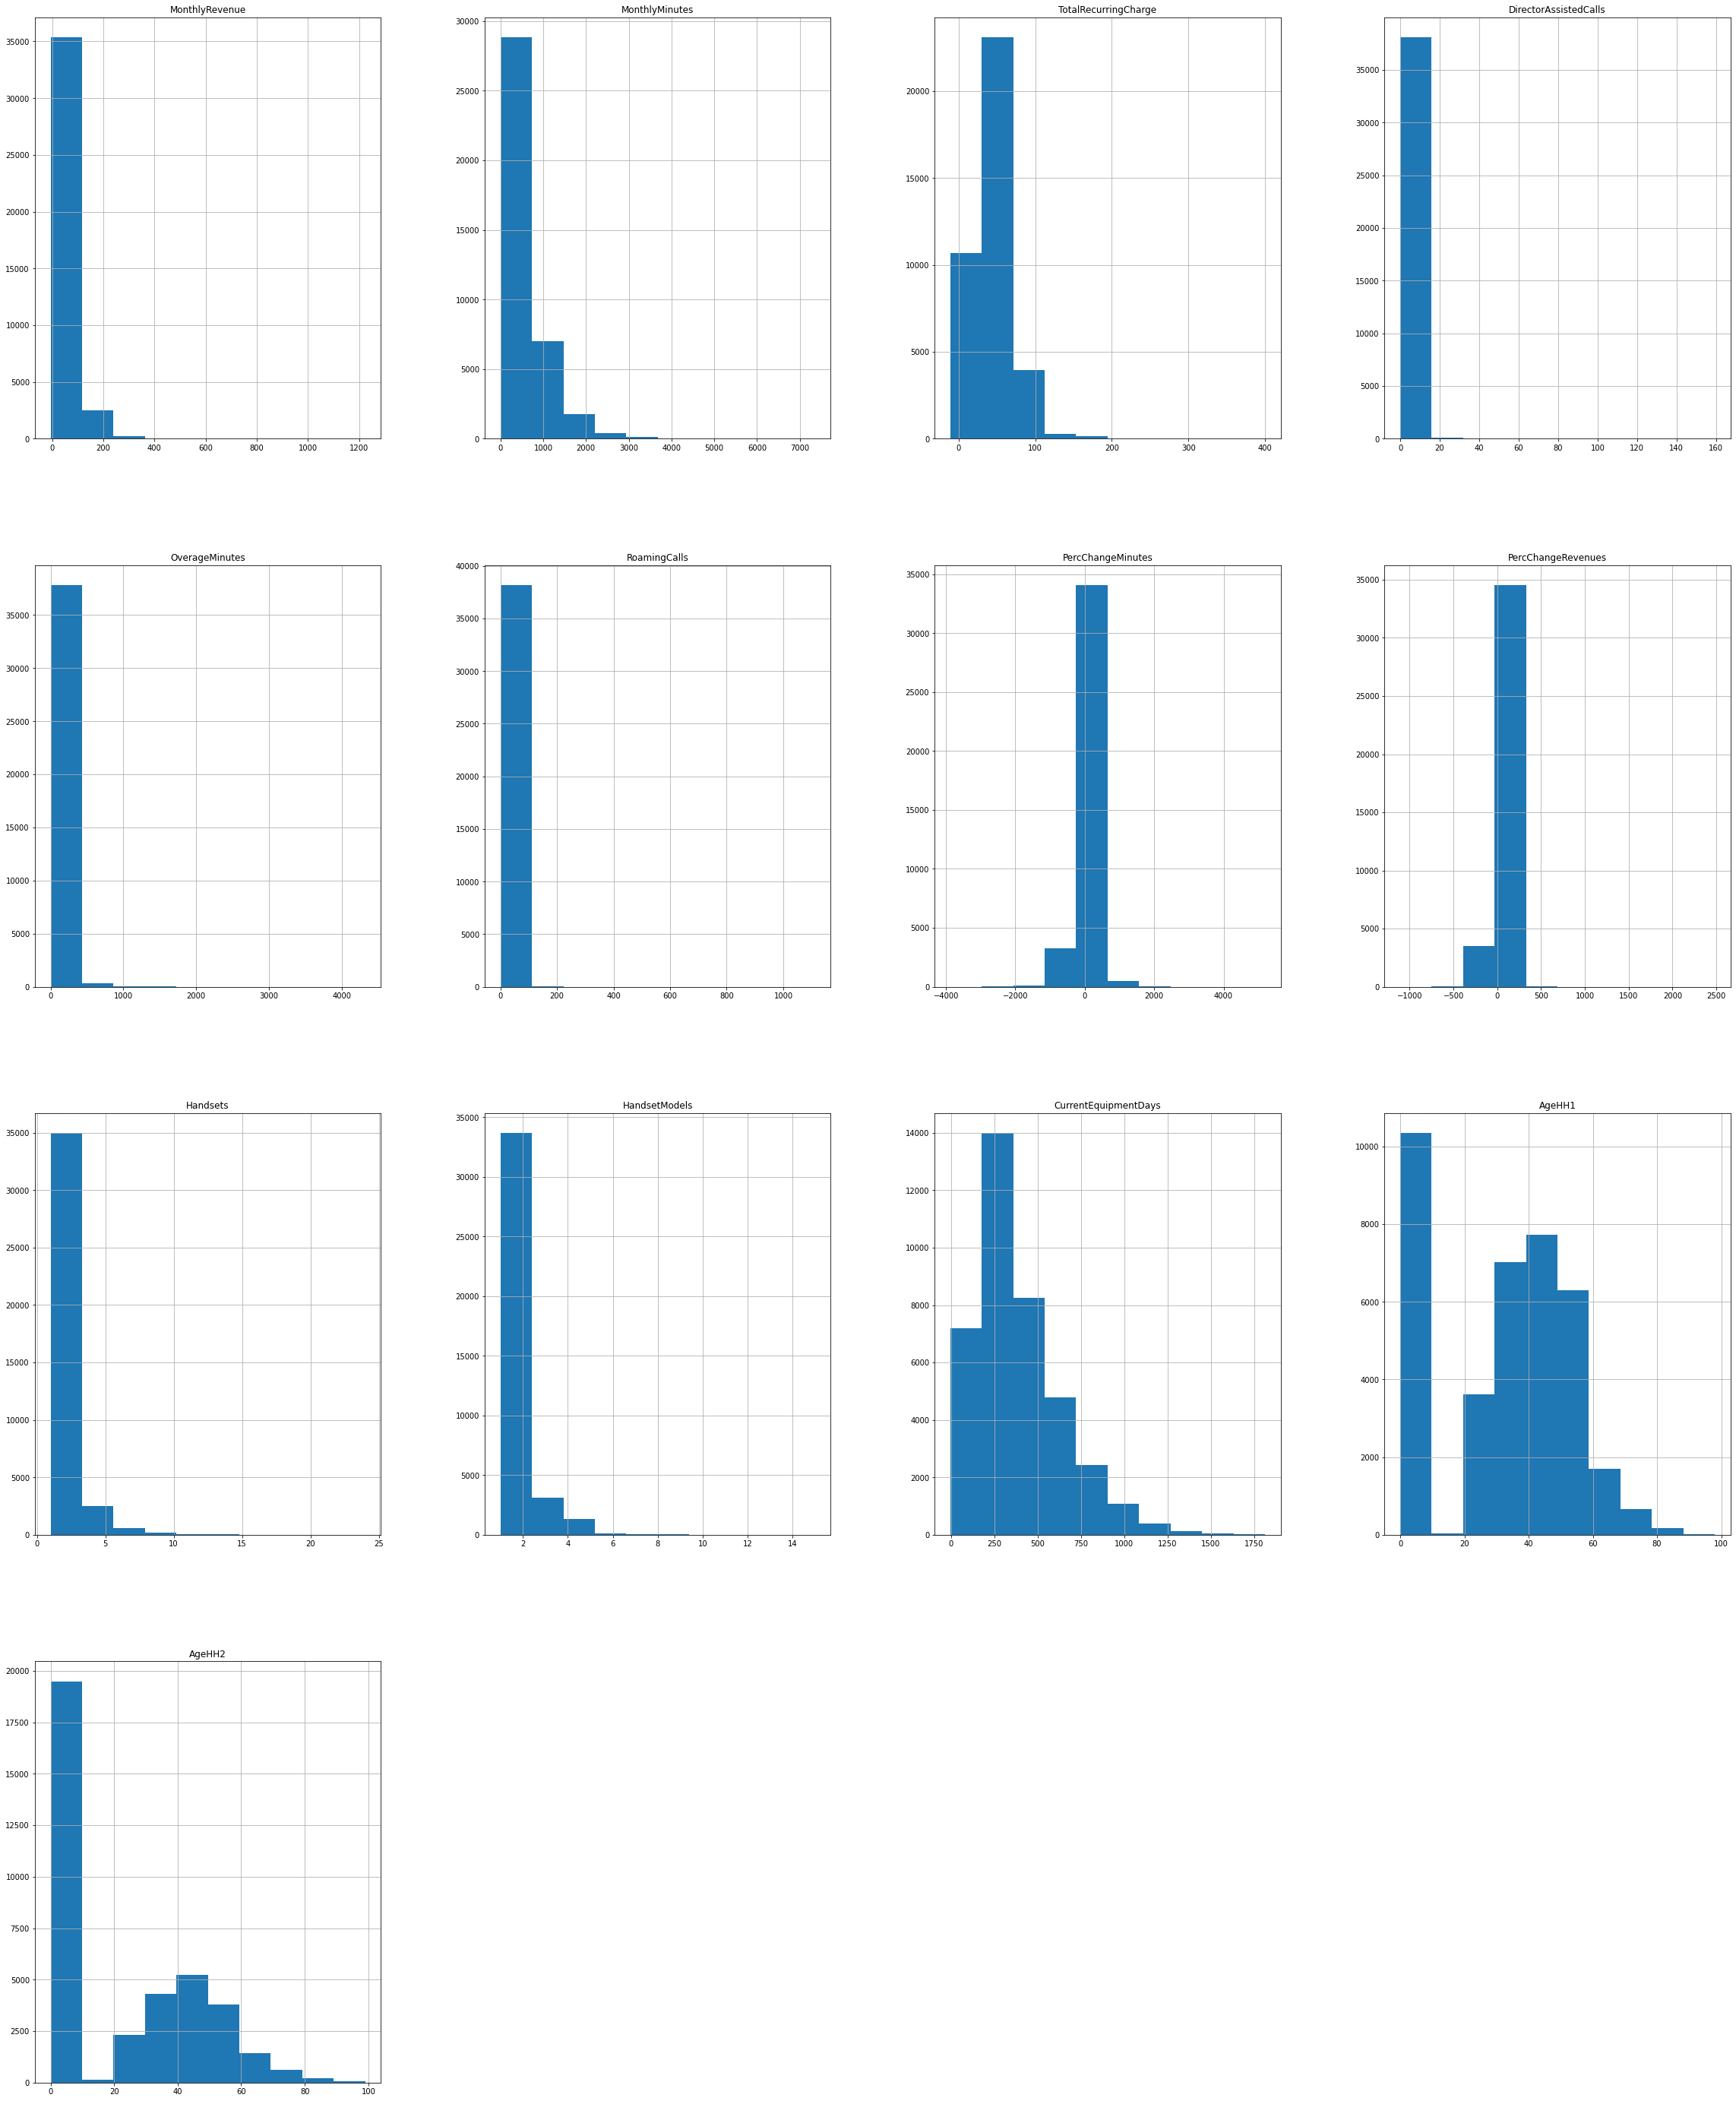

In [ ]:
# Generate histograms for all the numerical variables that have null values.
num_col_nulls.hist(figsize=[40, 50])
plt.show()

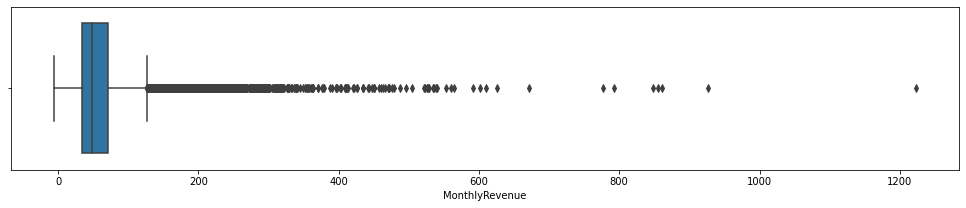

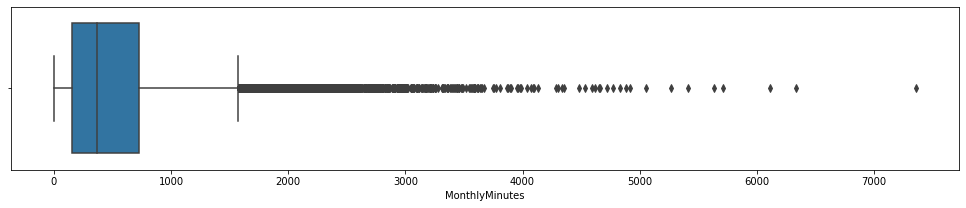

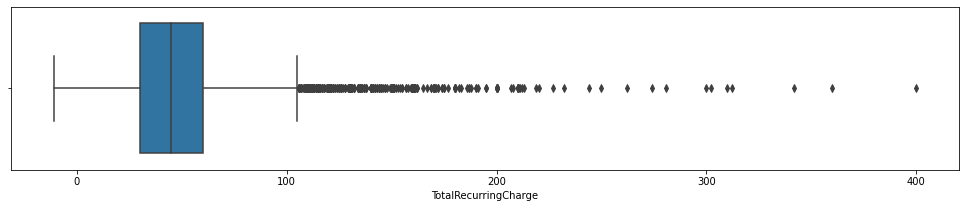

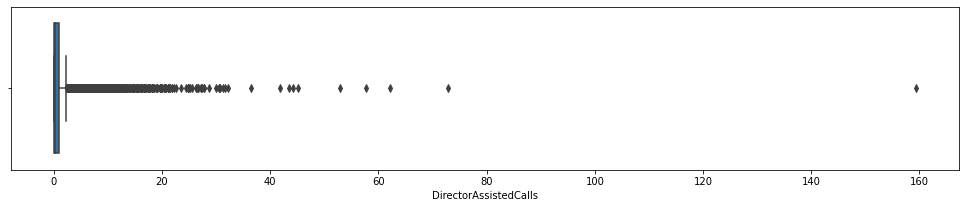

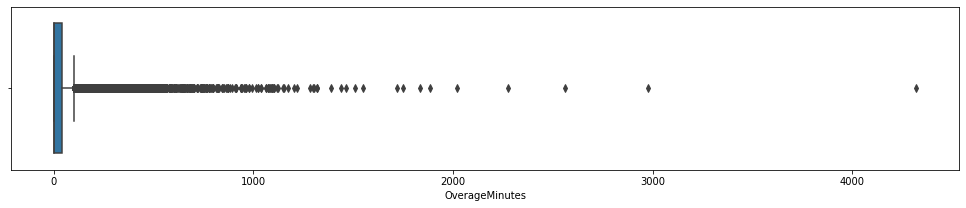

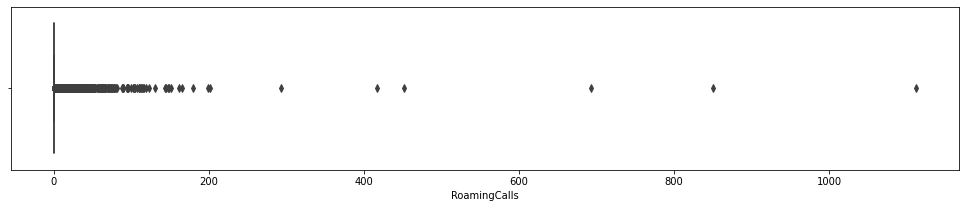

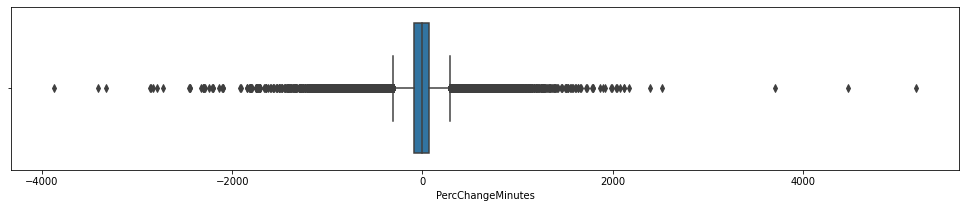

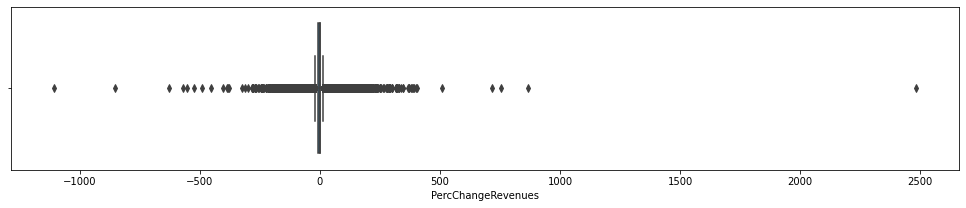

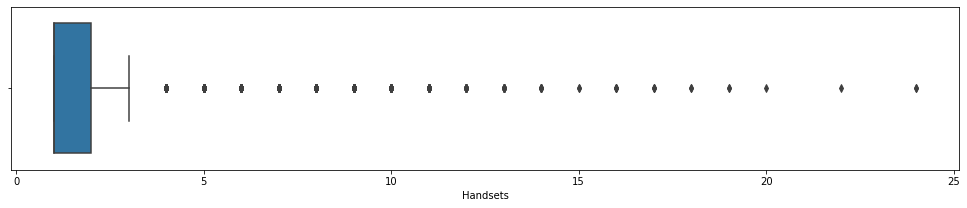

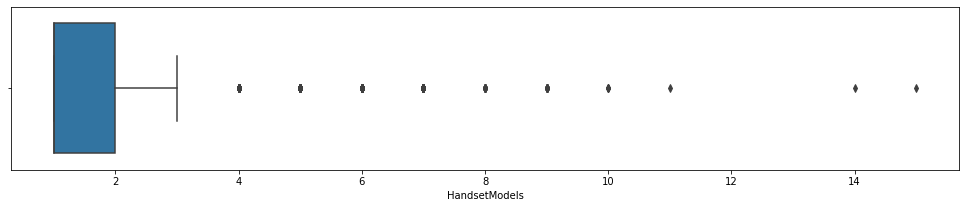

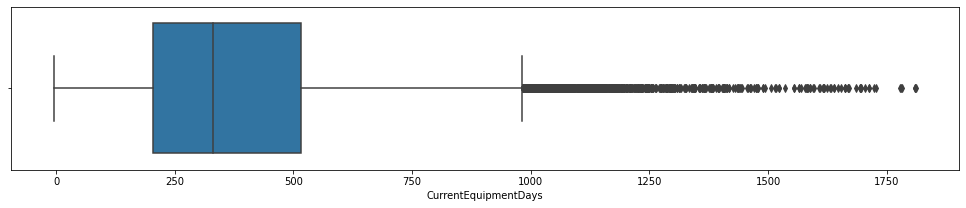

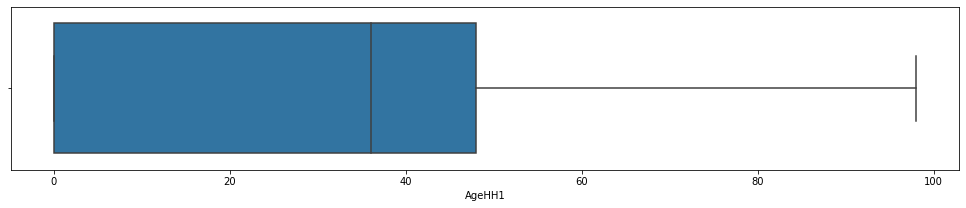

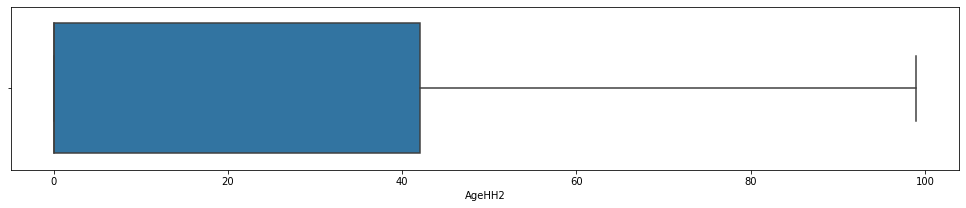

In [ ]:
# Generate boxplots for all the numerical variables that have null values.

for column in num_col_nulls:
        plt.figure(figsize=(17,3))
        sns.boxplot(data=num_col_nulls, x=column)

Since the majority of the histograms seem to show a skewed distribution and the boxplots indicate the existance of outliers, it is best to replace the null values of the numerical variables with the median.

In [ ]:
# Replace train dataset null values (for numerical data) with the median.
for column in num_col_nulls:
    churn_train[column]=churn_train[column].fillna(churn_train[column].median())

In [ ]:
# Replace test dataset null values (for numerical data) with the median.
for column in num_col_nulls:
    churn_test[column]=churn_test[column].fillna(churn_test[column].median())

After replacing the null values of the numerical variables with the median, we double check to see if there are any null values left.

In [ ]:
# Double check null values.
churn_train.isna().sum()

Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2                       0
ChildrenInHH                 0
HandsetRefurbished           0
HandsetW

In [ ]:
# We double check to see if we hace any categorical values with null values. 
# Besides double checking, this line is useful for preparing a modular code to be reused in other datasets.
col_nulls.select_dtypes(include=['object'])

""
0
1
2
3
4
...
38280
38281
38282
38283


In [ ]:
churn_train_numeric=churn_train.select_dtypes(include=np.number)

In [ ]:
churn_train_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38285 entries, 0 to 38284
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MonthlyRevenue             38285 non-null  float64
 1   MonthlyMinutes             38285 non-null  float64
 2   TotalRecurringCharge       38285 non-null  float64
 3   DirectorAssistedCalls      38285 non-null  float64
 4   OverageMinutes             38285 non-null  float64
 5   RoamingCalls               38285 non-null  float64
 6   PercChangeMinutes          38285 non-null  float64
 7   PercChangeRevenues         38285 non-null  float64
 8   DroppedCalls               38285 non-null  float64
 9   BlockedCalls               38285 non-null  float64
 10  UnansweredCalls            38285 non-null  float64
 11  CustomerCareCalls          38285 non-null  float64
 12  ThreewayCalls              38285 non-null  float64
 13  ReceivedCalls              38285 non-null  flo

# **Diagnostic plots**

In [ ]:
# We define a function generating a set of charts (Histogram, Probability Plot, Boxplot) and apply it to the numeric variables in the dataset.
def diagnostic_plots(df, variable):
    plt.figure(figsize=(16,4))

    #Histogram
    plt.subplot(1,3,1)
    sns.histplot(df[variable], bins=30)
    plt.title("Histogram")

    #Q-Q plot
    plt.subplot(1,3,2)
    stats.probplot(df[variable],dist="norm",plot=plt)
    plt.ylabel('RM quantiles')

    #boxplot
    plt.subplot(1,3,3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

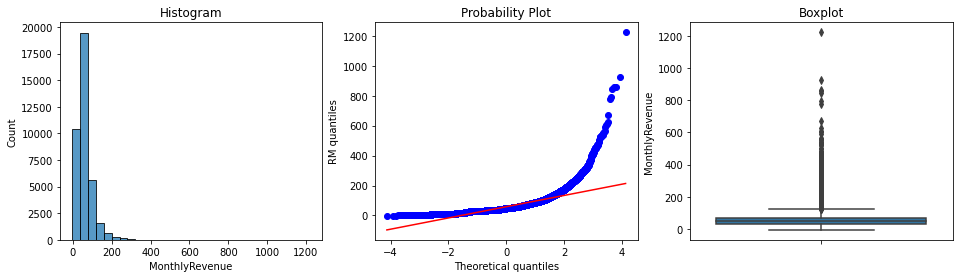

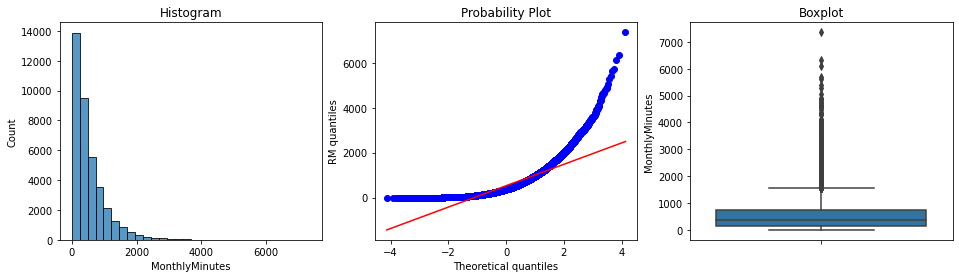

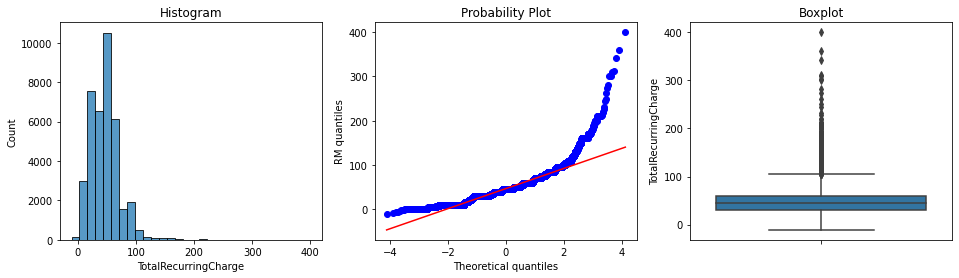

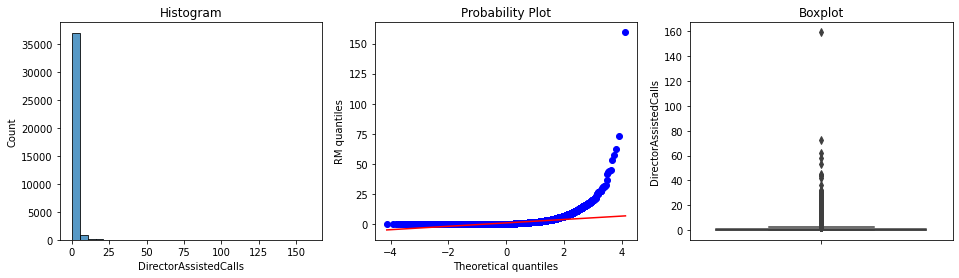

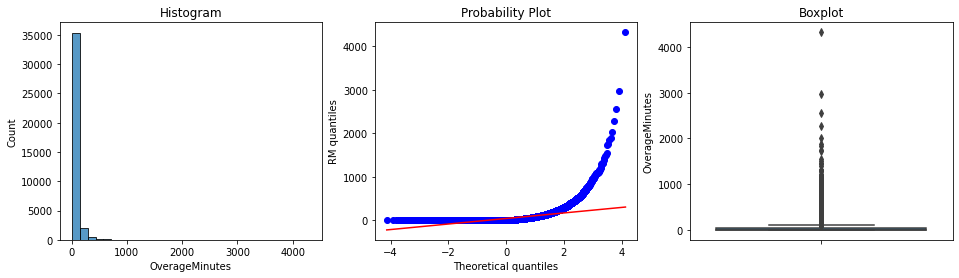

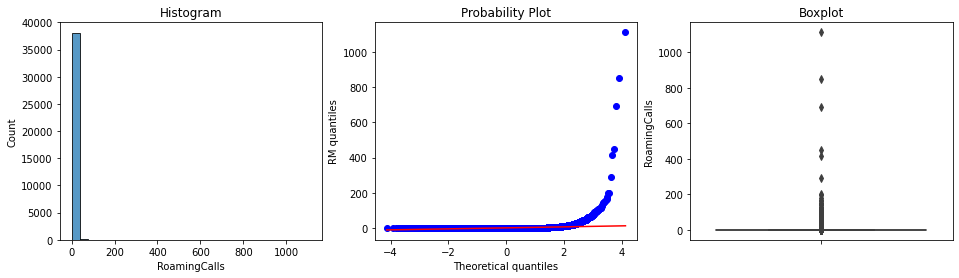

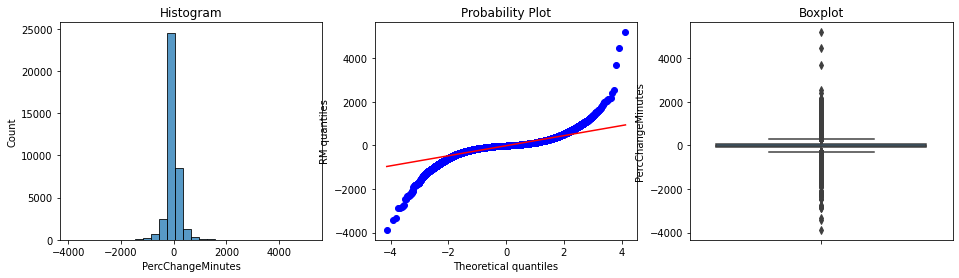

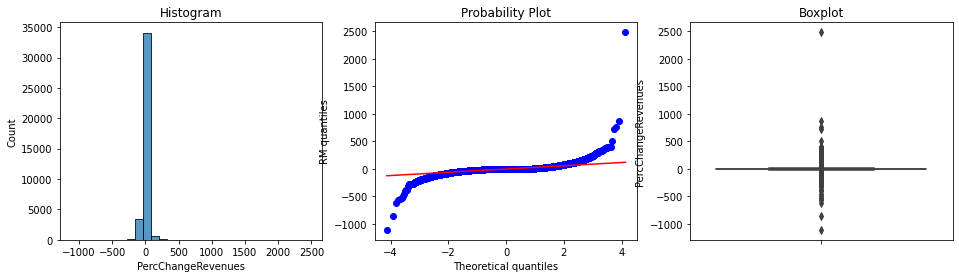

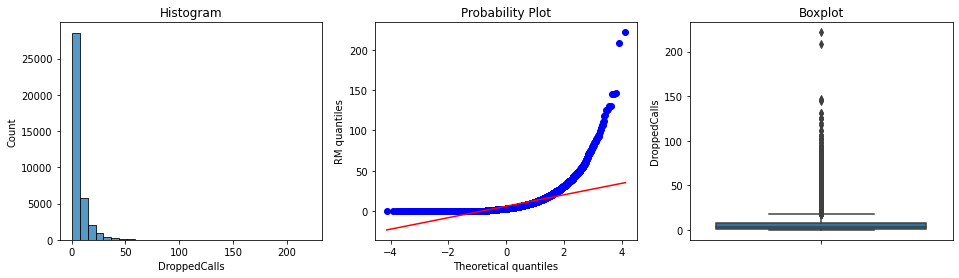

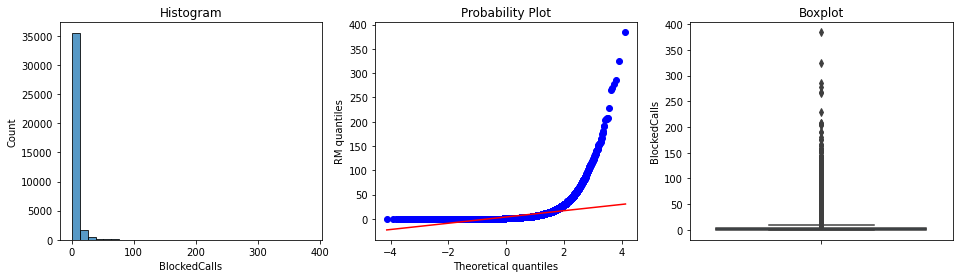

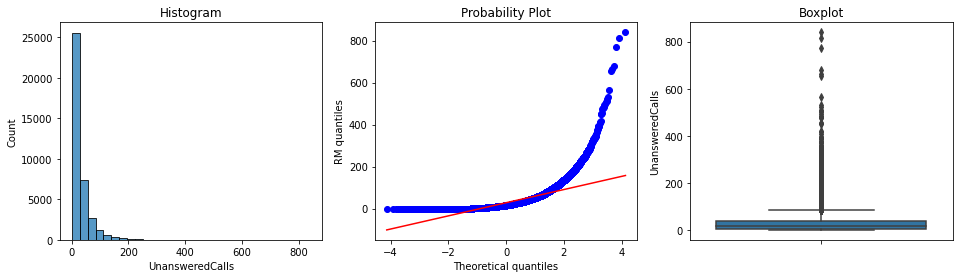

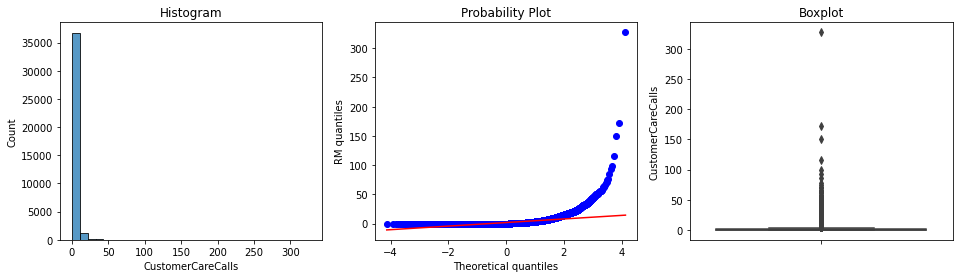

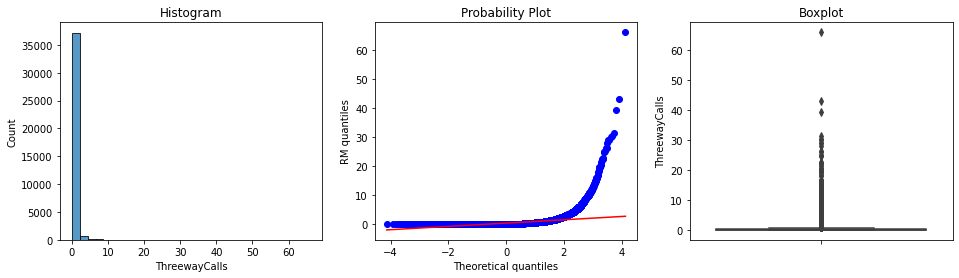

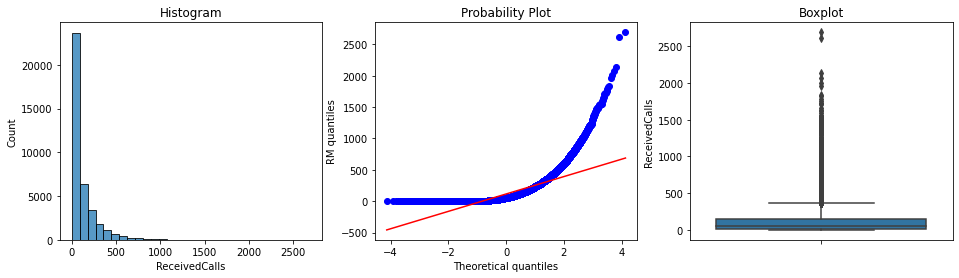

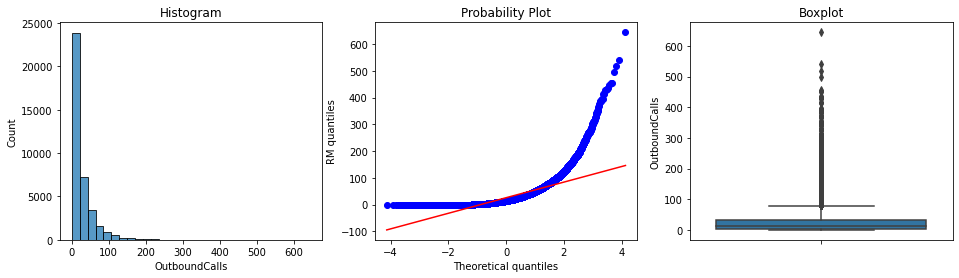

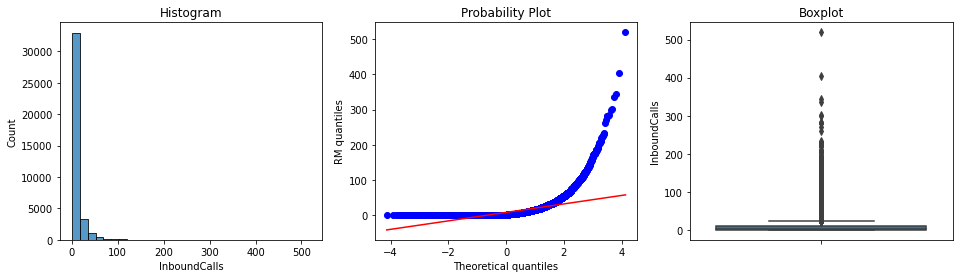

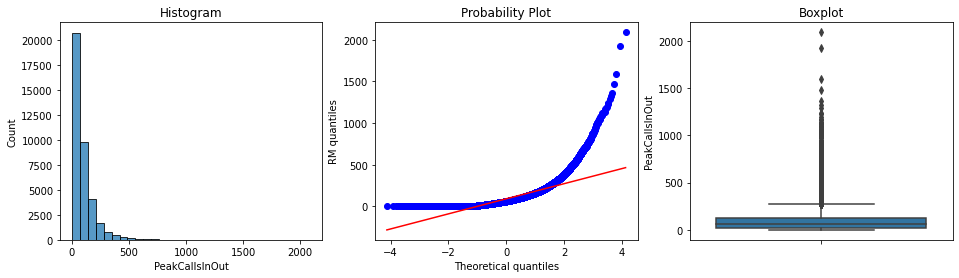

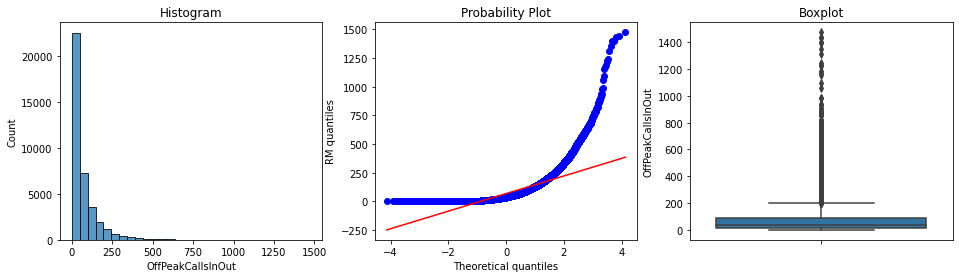

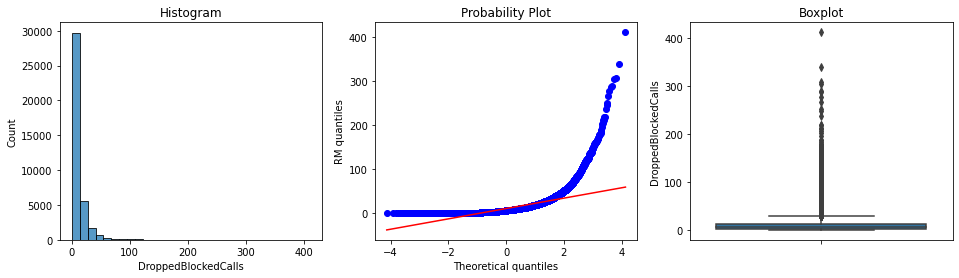

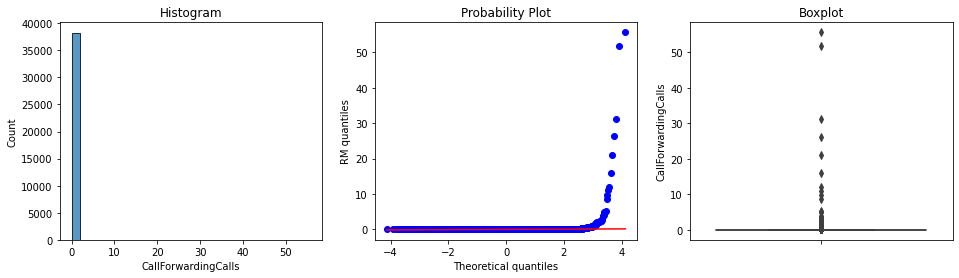

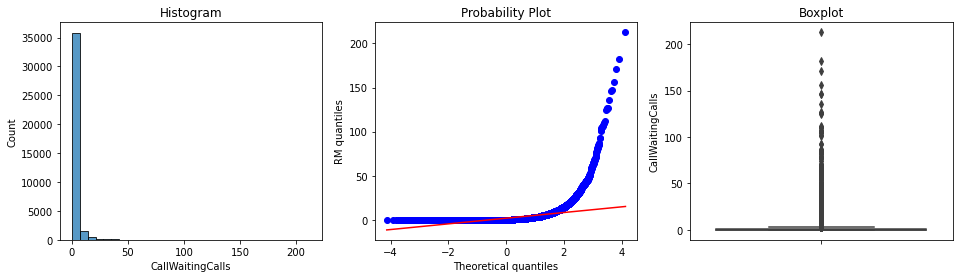

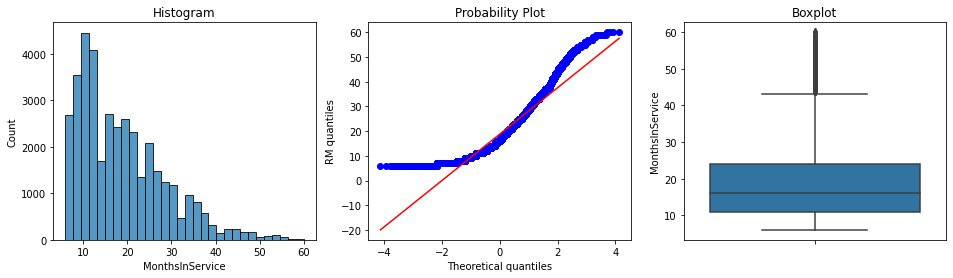

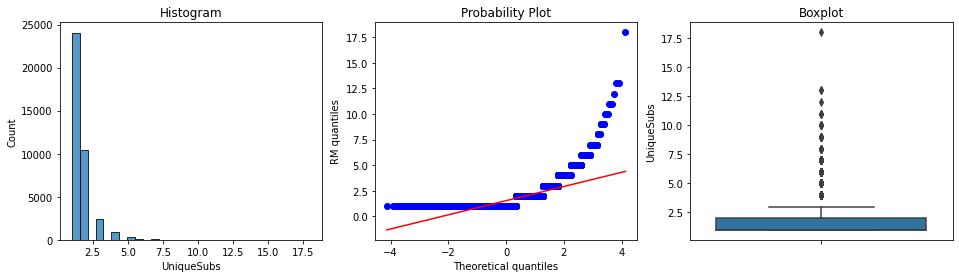

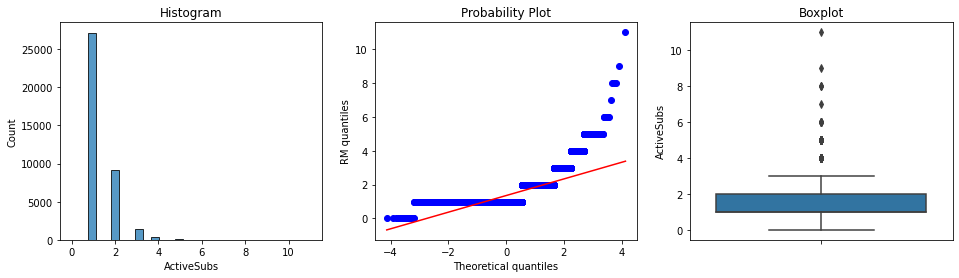

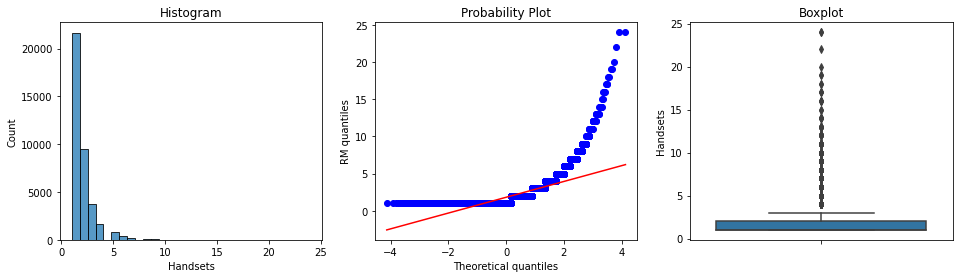

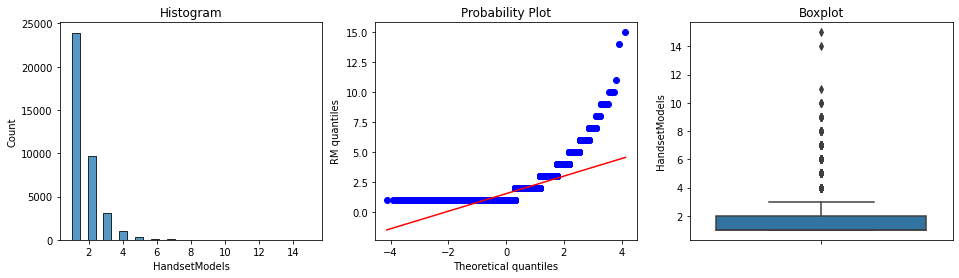

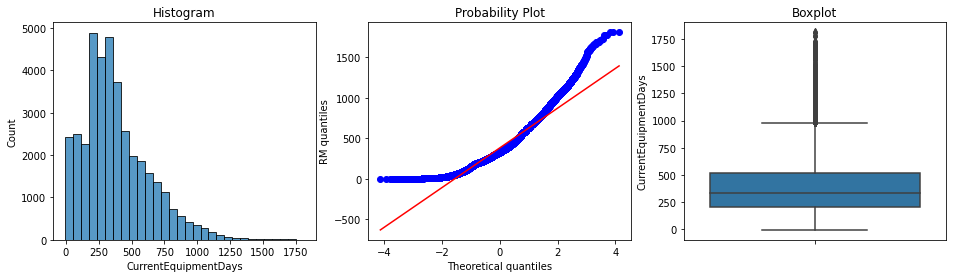

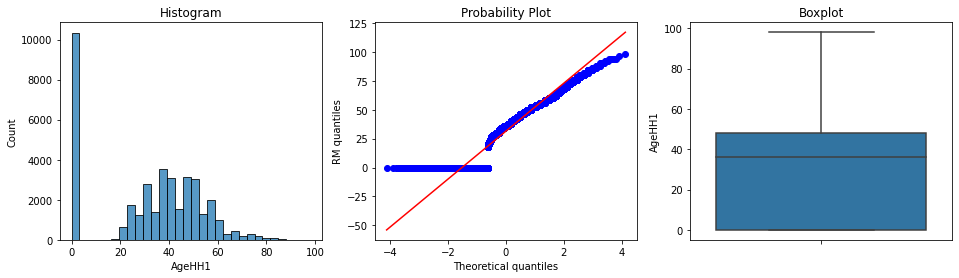

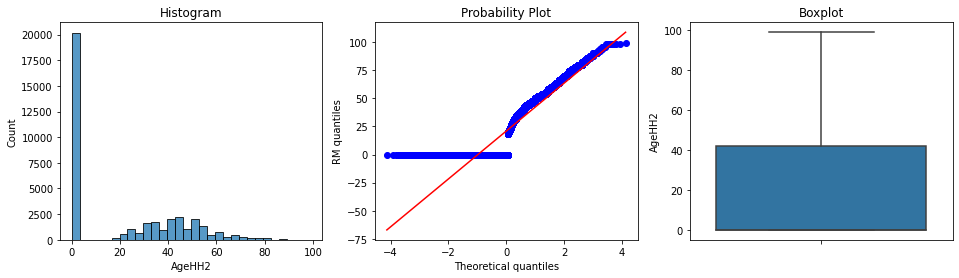

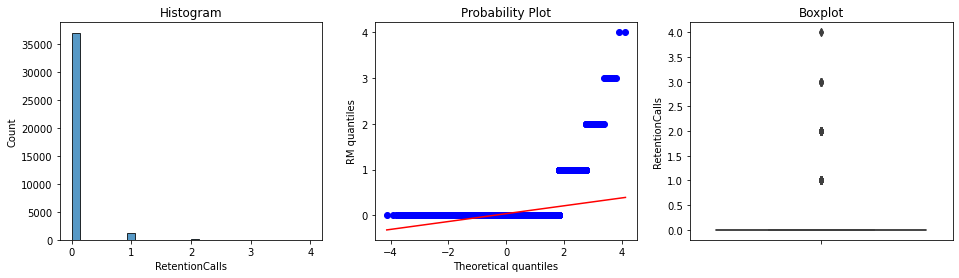

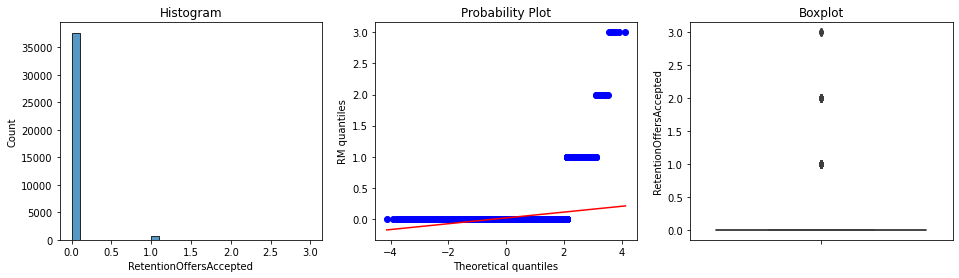

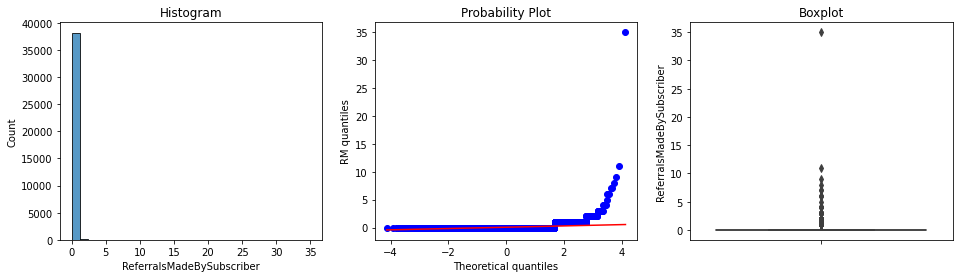

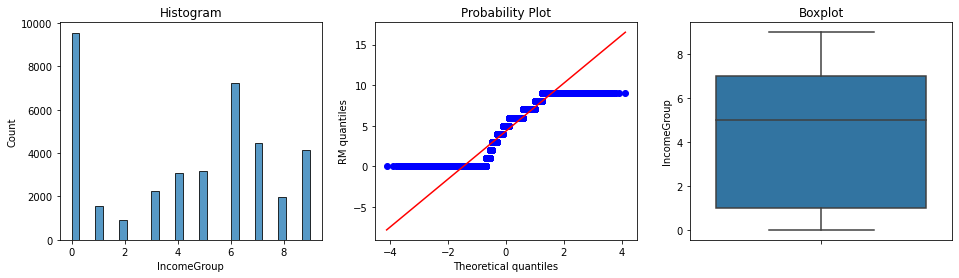

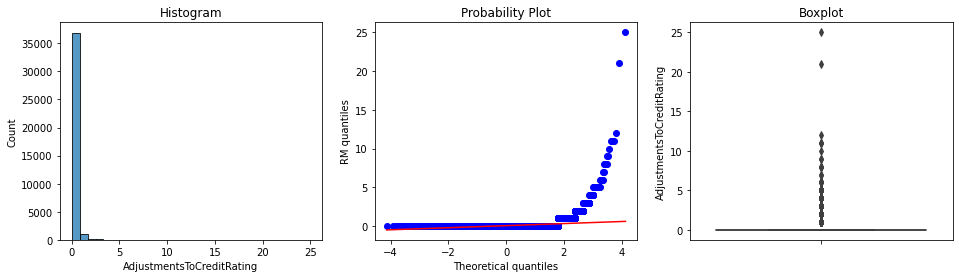

In [ ]:
for column in churn_train_numeric:
    diagnostic_plots(churn_train_numeric, column)

# **Identifying and removing outliers**

In [ ]:
# We will define a function to isolate the outliers based on z-scores and a threshold.

def get_outlier_counts(df, threshold):
    df=df.copy()

    # Get the Z-Score for specific threshold.
    threshold_z_score=stats.norm.ppf(threshold)

    # Get the Z-scores for each value in the dataframe.
    z_score_df=pd.DataFrame(np.abs(stats.zscore(df)), columns = df.columns)

    # Compare the Z-scores with the threshold and output the count of outliers in each column.
    return (z_score_df > threshold_z_score).sum(axis=0)

In [ ]:
pd.set_option('display.max_rows', 75)

In [ ]:
# Display the number of outliers per numeric variable at a certain threshold.

get_outlier_counts(churn_train_numeric, 0.9999999999999999)


MonthlyRevenue                48
MonthlyMinutes                 9
TotalRecurringCharge          12
DirectorAssistedCalls         54
OverageMinutes                71
RoamingCalls                  44
PercChangeMinutes             30
PercChangeRevenues            39
DroppedCalls                  52
BlockedCalls                 102
UnansweredCalls               38
CustomerCareCalls             58
ThreewayCalls                 88
ReceivedCalls                 28
OutboundCalls                 41
InboundCalls                  70
PeakCallsInOut                37
OffPeakCallsInOut             29
DroppedBlockedCalls           65
CallForwardingCalls           14
CallWaitingCalls              78
MonthsInService                0
UniqueSubs                    21
ActiveSubs                     6
Handsets                      36
HandsetModels                  7
CurrentEquipmentDays           0
AgeHH1                         0
AgeHH2                         0
RetentionCalls               107
RetentionO

In [ ]:
#Define a function which will retrieve the index for each row containing outliers at a given threshold.

def return_index(df, threshold):
    df=df.copy()

    # Get the Z-Score for specific threshold.
    threshold_z_score=stats.norm.ppf(threshold)

    # Get the Z-scores for each value in the dataframe. 
    z_score_df=pd.DataFrame(np.abs(stats.zscore(df)), columns = df.columns)
    z_score_df=z_score_df > threshold_z_score

    # Get the indices of the outliers.
    outliers=z_score_df.sum(axis=1)
    outliers=outliers>0
    outlier_indices=df.index[outliers]

    return print (outlier_indices)

In [ ]:
# Define a function which will remove the rows from the dataset given the indexes identified above.

def remove_outliers(df, df2, threshold):
    df=df.copy()

    # Get the Z-Score for specific threshold.
    threshold_z_score=stats.norm.ppf(threshold)

    # Get the Z-scores for each value in the dataframe. 
    z_score_df=pd.DataFrame(np.abs(stats.zscore(df)), columns = df.columns)
    z_score_df=z_score_df > threshold_z_score

    # Get the indices of the outliers.
    outliers=z_score_df.sum(axis=1)
    outliers=outliers>0
    outlier_indices=df.index[outliers]

    # Drop outlier examples
    df2 = df2.drop(outlier_indices, axis=0).reset_index(drop=True)

    return df2

In [ ]:
# Apply the outlier removal function to our train dataset.

churn_train=remove_outliers(churn_train_numeric,churn_train, 0.9999999999999999)

In [ ]:
churn_train.shape

(37418, 56)

In [ ]:
churn_train.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,Yes,29.99,0.0,40.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,1,1,2.0,1.0,334.0,36.0,34.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,Yes,0,6,No,0,130,No,1-Highest,Other,Professional,No
1,No,38.91,514.0,45.0,0.00,1.0,3.7,0.0,-3.9,1.7,2.0,37.0,0.0,0.0,123.5,28.0,5.0,65.3,95.3,3.7,0.0,1.7,10,1,1,1.0,1.0,287.0,30.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,No,No,0,0,Yes,No,0,6,No,0,Unknown,No,2-High,Other,Other,No
2,Yes,72.05,399.0,51.0,0.99,26.0,8.5,-204.0,-16.2,5.7,12.0,17.3,0.0,0.3,103.7,38.0,0.7,74.3,81.0,17.7,0.0,0.7,16,1,1,1.0,1.0,464.0,0.0,0.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,0,No,0,Unknown,No,3-Good,Rural,Other,Unknown
3,No,29.79,58.0,20.0,0.00,24.0,0.0,48.0,16.6,1.7,5.7,3.0,0.0,0.3,1.8,3.3,0.0,15.0,9.0,7.3,0.0,0.0,26,1,1,1.0,1.0,776.0,42.0,0.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,7,No,0,Unknown,No,1-Highest,Suburban,Other,Unknown
4,No,35.25,302.0,30.0,0.00,15.0,0.0,59.0,0.4,1.0,2.0,14.3,0.0,0.0,55.5,5.0,0.0,64.0,16.3,3.0,0.0,0.7,21,1,1,1.0,1.0,645.0,0.0,0.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,Yes,0,0,No,No,0,6,No,0,Unknown,No,3-Good,Other,Other,No


# **Detecting and eliminating Multicollinearity**

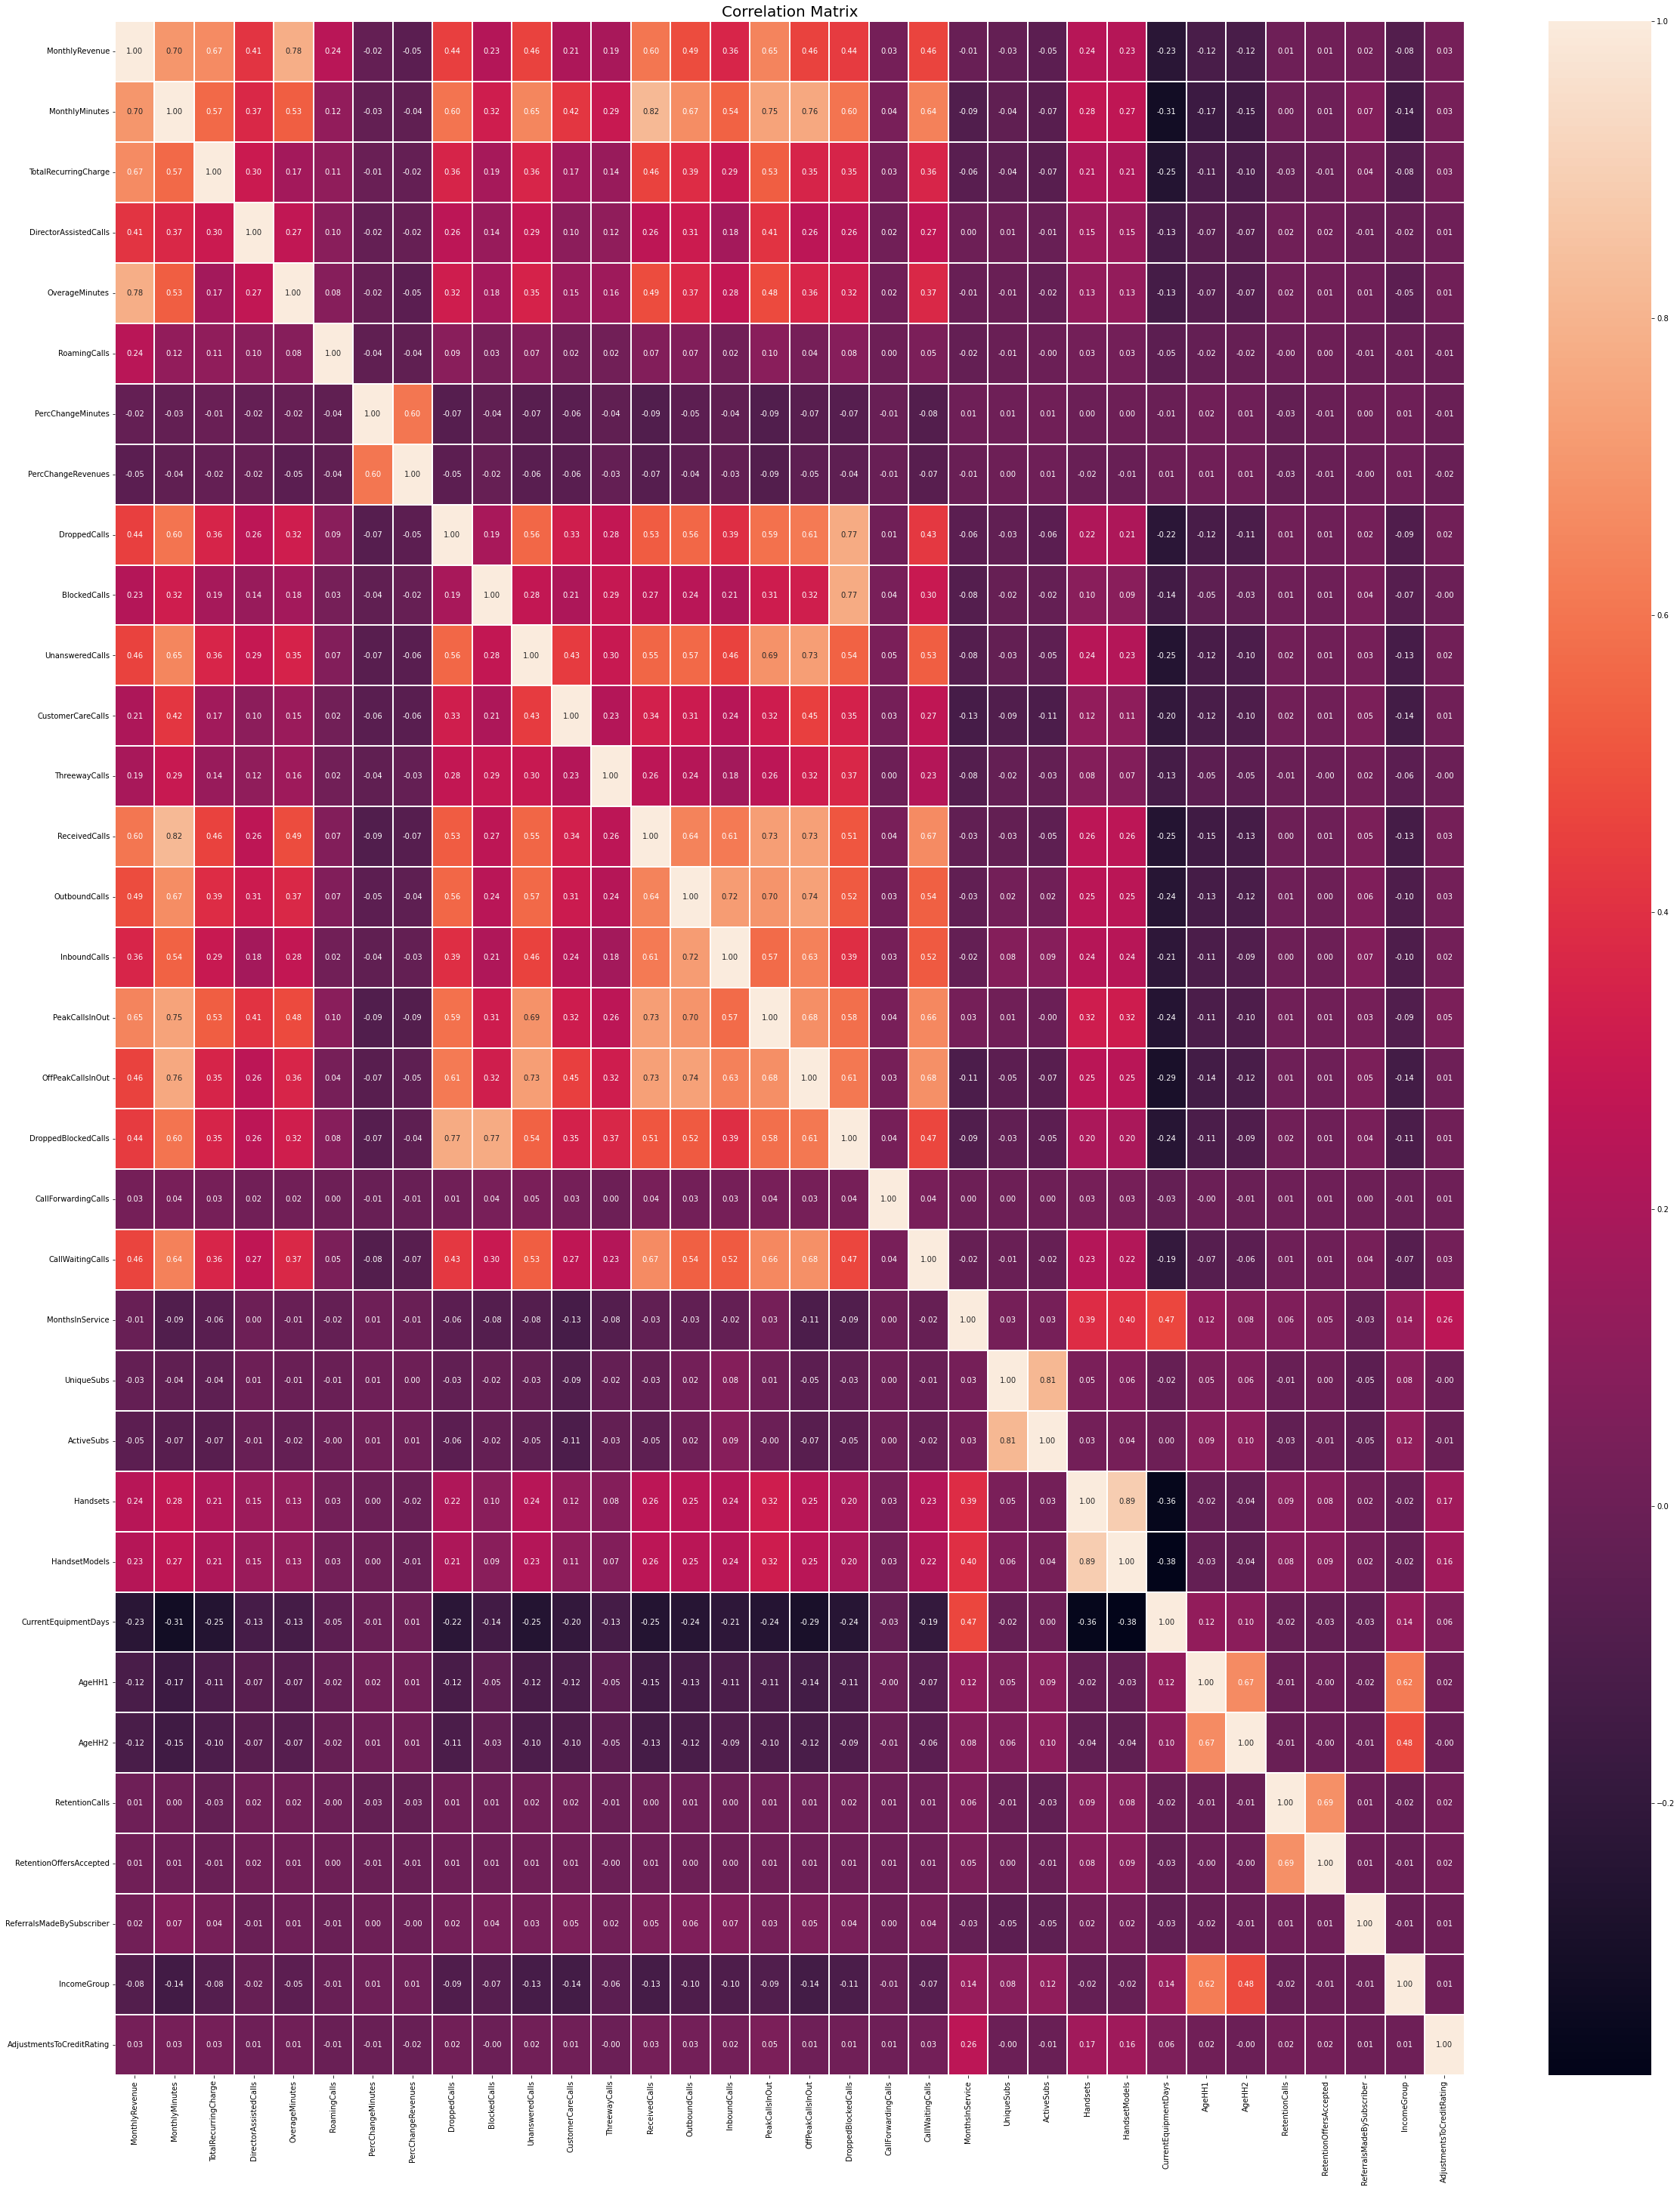

In [ ]:
# Genereate a correlation heatmap for the numerical variables.
corr_matrix = churn_train.corr()
plt.figure(figsize = (40, 50))
cm = sns.heatmap(corr_matrix,
               linewidths = 1,
               annot = True, 
               fmt = ".2f")
plt.title("Correlation Matrix", fontsize = 20)
plt.show()

In [ ]:
# Define a correlation threshold function:
def correlation (df, threshold):
    correlated_cols=set()
    corr_matrix=df.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
          if abs(corr_matrix.iloc[i,j])>threshold:
            colname=corr_matrix.columns[i]
            correlated_cols.add(colname)
    return correlated_cols

In [ ]:
# Rerun numeric columns identification after outlier removal.
churn_train_numeric=churn_train.select_dtypes(include=np.number)

In [ ]:
# Eliminate all columns with correlation over 0.7 (including).
corr_threshold=correlation(churn_train_numeric,0.69)

In [ ]:
# Return the columns with correlation over the threshold level.
print(corr_threshold)

{'MonthlyMinutes', 'OverageMinutes', 'HandsetModels', 'DroppedBlockedCalls', 'ActiveSubs', 'PeakCallsInOut', 'ReceivedCalls', 'InboundCalls', 'OffPeakCallsInOut'}


In [ ]:
# Remove the columns with correlation over the threshold level from the training dataset.
churn_train=churn_train.drop(corr_threshold, axis=1)


In [ ]:
# Remove the columns with correlation over the threshold level from the test dataset.
churn_test=churn_test.drop(corr_threshold, axis=1)

In [ ]:
# Check new training dataset shape.

churn_train.shape

(37418, 47)

In [ ]:
# Check new test dataset shape.

churn_test.shape

(12762, 47)

# **Dealing with Categorical Variables**

We need to also check if there are any categorical values miss-labeled as categorical instead of numerical. 
In order to do this, we will define two custom functions.


In [ ]:
# First, we define a function which will return a list of distinct values for each column.

def get_uniques(df, columns):
    return {column: list(df[column].unique()) for column in columns}

In [ ]:
# Secondly, we will define a function to retrieve only the variables marked as categorical.

def get_categorical_columns(df):
    return [column for column in df.columns if df.dtypes[column]=='object']

In [ ]:
# Get the distinct values for the variables marked as categorical.

get_uniques(churn_train, get_categorical_columns(churn_train))

{'BuysViaMailOrder': ['Yes', 'No'],
 'ChildrenInHH': ['No', 'Yes'],
 'Churn': ['Yes', 'No'],
 'CreditRating': ['1-Highest',
  '2-High',
  '3-Good',
  '4-Medium',
  '5-Low',
  '6-VeryLow',
  '7-Lowest'],
 'HandsetPrice': ['130',
  'Unknown',
  '200',
  '30',
  '10',
  '60',
  '150',
  '80',
  '100',
  '40',
  '400',
  '250',
  '240',
  '500',
  '300',
  '180'],
 'HandsetRefurbished': ['No', 'Yes'],
 'HandsetWebCapable': ['Yes', 'No'],
 'HasCreditCard': ['Yes', 'No'],
 'Homeownership': ['Known', 'Unknown'],
 'MadeCallToRetentionTeam': ['No', 'Yes'],
 'MaritalStatus': ['No', 'Unknown', 'Yes'],
 'NewCellphoneUser': ['No', 'Yes'],
 'NonUSTravel': ['No', 'Yes'],
 'NotNewCellphoneUser': ['Yes', 'No'],
 'Occupation': ['Professional',
  'Other',
  'Crafts',
  'Retired',
  'Homemaker',
  'Self',
  'Clerical',
  'Student'],
 'OptOutMailings': ['No', 'Yes'],
 'OwnsComputer': ['No', 'Yes'],
 'OwnsMotorcycle': ['No', 'Yes'],
 'PrizmCode': ['Other', 'Rural', 'Suburban', 'Town'],
 'RVOwner': ['No', 'Y

After running the distinct function for the categorical values, we notice the following:

*   CreditRating can be used as an ordinal variable.
*   HandsetPrice is set as categorical, even though it should instead be a numerical one. **However**, we notice that we have an "Unknown" category.  We need to check how many datapoints have an unknown price rather than an actual price and then decide what if we can transform it into a numerical value and replace unknown values with mean/mediar OR if we will transform it into a proper categorical variable by assigning prices to price ranges.
*   We have some columns with "Other" or "Unknown" values, such as HandsetPrice, MaritalStatus, Occupation and PrizmCode.

In [ ]:
# Show percentage split of distinct values per each categorical column.

for column in get_categorical_columns(churn_train):
    print(((churn_train[column].value_counts())/(churn_train.shape[0]))*100)

No     71.179646
Yes    28.820354
Name: Churn, dtype: float64
No     75.613341
Yes    24.386659
Name: ChildrenInHH, dtype: float64
No     86.279331
Yes    13.720669
Name: HandsetRefurbished, dtype: float64
Yes    90.141109
No      9.858891
Name: HandsetWebCapable, dtype: float64
No     81.249666
Yes    18.750334
Name: TruckOwner, dtype: float64
No     91.843498
Yes     8.156502
Name: RVOwner, dtype: float64
Known      67.069325
Unknown    32.930675
Name: Homeownership, dtype: float64
No     63.651184
Yes    36.348816
Name: BuysViaMailOrder, dtype: float64
No     62.167941
Yes    37.832059
Name: RespondsToMailOffers, dtype: float64
No     98.514084
Yes     1.485916
Name: OptOutMailings, dtype: float64
No     94.259447
Yes     5.740553
Name: NonUSTravel, dtype: float64
No     81.206906
Yes    18.793094
Name: OwnsComputer, dtype: float64
Yes    68.087551
No     31.912449
Name: HasCreditCard, dtype: float64
No     80.824737
Yes    19.175263
Name: NewCellphoneUser, dtype: float64
No     86.

We notice the following:

There are some variables with high percentage of values in an Unknown/Other category. The value added of the features will be later determined by feature importance computations.

*   While HandsetPrice should be a numerical variable, more than 50% of values are actually unknown. Since we can't properly transform it to a numerical variable with so many missing data, we will transform it into a proper categorical one by grouping price into intervals using Pandas' cut-function.  
*   PrizmCode has about half of values in an "Other" category.
*   Occupation has more than 70% of values marked as "Other"
*   About 40% of MaritalStatus is unclear ("Unknown").

Also, two related variables have conflicting information:

*   NewCellphoneUser ("known to be a new mobile handset user") and NotNewCellphoneUser ("known not to be a new mobile handset user") should have symmetrical information. But instead, the information reflected by analyzing them seems to indicate they were probably manually filled in during surveys and not in a consistent manner.
*   For example, NewCellphoneUser has a "Yes" percentage of 13.8% and a "No" percentage of 86.2%, while NotNewCellphoneUser has a "Yes" percentage of 1.3% and a "No" percetange of 98.7%.
*   Out of the two, the NewCellphoneUser variable is the more straightforward one, so we will keep this one and pass it through the encoding process, while dropping the initial NotNewCellphoneUser variable.

First, we will drop the 'NotNewCellphoneUser', since out of the two, 'NewCellphoneUser' is more straighforward and leaves less space for interpretation.

In [ ]:
# Drop the 'NotNewCellphoneUser' variable from the train dataset.
churn_train.drop(['NotNewCellphoneUser'], axis=1, inplace=True)

In [ ]:
# Drop the 'NotNewCellphoneUser' variable from the test dataset.
churn_test.drop(['NotNewCellphoneUser'], axis=1, inplace=True)

In [ ]:
# Check column number after dropping one column.
churn_train.shape[1]

46

In [ ]:
# Check column number after dropping one column.
churn_test.shape[1]

46

Secondly, we will handle the HandsetPrice variable. Since more than 50% of our prices are missing, we cannot replace the unknown values with mean or median. Our strategy will be to bundle the individual price values into price ranges. We will do this using Pandas' integrated cut-function.

Steps:

*   In order to automatically bundle the prices, we need to convert the variable from a categorical variable to a numerical one.
*   To convert to a numerical value, we will  need to temporarily replace the "Unknown" category to null values.
*   Now we will be able to use the to_numeric function.
*   We will next create a new variable, "HandsetPriceRange", to the dataset and apply Pandas' cut-function to split the prices into price ranges.
*   Next, we will add another category to the new variable and, anfter replacing the null values back to "Unknown",  which we will populate it with the "Unknown" values.
*   At the end, after checking that the new variable is correctly constructed, we will drop the initial "HandsetPrice" variable.




In [ ]:
# Temporarily replace "Unknown" values with null values for the train dataset.
churn_train['HandsetPrice'] = churn_train['HandsetPrice'].replace(['Unknown'],np.nan)

In [ ]:
# Temporarily replace "Unknown" values with null values for the test dataset.
churn_test['HandsetPrice'] = churn_test['HandsetPrice'].replace(['Unknown'],np.nan)

In [ ]:
# Check to see if the "Unknown" values have been properly replaced with nulls.
churn_train.isnull().sum()

Churn                            0
MonthlyRevenue                   0
TotalRecurringCharge             0
DirectorAssistedCalls            0
RoamingCalls                     0
PercChangeMinutes                0
PercChangeRevenues               0
DroppedCalls                     0
BlockedCalls                     0
UnansweredCalls                  0
CustomerCareCalls                0
ThreewayCalls                    0
OutboundCalls                    0
CallForwardingCalls              0
CallWaitingCalls                 0
MonthsInService                  0
UniqueSubs                       0
Handsets                         0
CurrentEquipmentDays             0
AgeHH1                           0
AgeHH2                           0
ChildrenInHH                     0
HandsetRefurbished               0
HandsetWebCapable                0
TruckOwner                       0
RVOwner                          0
Homeownership                    0
BuysViaMailOrder                 0
RespondsToMailOffers

In [ ]:
# Convert "HandsetPrice" from a categorical variable to a numerical one in the train dataset.
churn_train['HandsetPrice'] = churn_train['HandsetPrice'].apply(pd.to_numeric)

In [ ]:
# Convert "HandsetPrice" from a categorical variable to a numerical one in the test dataset.
churn_test['HandsetPrice'] = churn_test['HandsetPrice'].apply(pd.to_numeric)

In [ ]:
# Create a new variable and use Pandas' cut-function to bundle the prices into price ranges in the train dataset.
churn_train['HandsetPriceRange']=pd.cut(x=churn_train['HandsetPrice'], 
                                     bins=[0,100,200, np.inf], 
                                     labels=["0 to 100", "101 to 200", "Above 201"])

In [ ]:
# Create a new variable and use Pandas' cut-function to bundle the prices into price ranges in the test dataset.
churn_test['HandsetPriceRange']=pd.cut(x=churn_test['HandsetPrice'], 
                                     bins=[0,100,200, np.inf], 
                                     labels=["0 to 100", "101 to 200", "Above 201"])

In [ ]:
# Check the new variable's distinct variables.
churn_train['HandsetPriceRange'].value_counts()

0 to 100      10501
101 to 200     5330
Above 201        54
Name: HandsetPriceRange, dtype: int64

In [ ]:
# Transform the new variable back to a categorical one in the train dataset.
churn_train['HandsetPriceRange'] = churn_train.HandsetPriceRange.astype('category')


In [ ]:
# Transform the new variable back to a categorical one in the test dataset.
churn_test['HandsetPriceRange'] = churn_test.HandsetPriceRange.astype('category')

In [ ]:
churn_train['HandsetPriceRange'].value_counts()

0 to 100      10501
101 to 200     5330
Above 201        54
Name: HandsetPriceRange, dtype: int64

In [ ]:
churn_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37418 entries, 0 to 37417
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Churn                      37418 non-null  object  
 1   MonthlyRevenue             37418 non-null  float64 
 2   TotalRecurringCharge       37418 non-null  float64 
 3   DirectorAssistedCalls      37418 non-null  float64 
 4   RoamingCalls               37418 non-null  float64 
 5   PercChangeMinutes          37418 non-null  float64 
 6   PercChangeRevenues         37418 non-null  float64 
 7   DroppedCalls               37418 non-null  float64 
 8   BlockedCalls               37418 non-null  float64 
 9   UnansweredCalls            37418 non-null  float64 
 10  CustomerCareCalls          37418 non-null  float64 
 11  ThreewayCalls              37418 non-null  float64 
 12  OutboundCalls              37418 non-null  float64 
 13  CallForwardingCalls        3741

In [ ]:
# Add another category to the new variable and replace back the null values with the "Unknown" label in the train dataset.
churn_train['HandsetPriceRange']=(churn_train['HandsetPriceRange'].cat
                                                            .add_categories('Unknown')
                                                            .fillna('Unknown'))

In [ ]:
# Add another category to the new variable and replace back the null values with the "Unknown" label in the test dataset.
churn_test['HandsetPriceRange']=(churn_test['HandsetPriceRange'].cat
                                                            .add_categories('Unknown')
                                                            .fillna('Unknown'))

In [ ]:
# Check that the new variable has all the correct values.
len(churn_train['HandsetPriceRange'])

37418

In [ ]:
# Drop the initial "HandsetPrice" variable from the train dataset.
churn_train.drop(['HandsetPrice'], axis=1, inplace=True)


In [ ]:
# Drop the initial "HandsetPrice" variable from the test dataset.
churn_test.drop(['HandsetPrice'], axis=1, inplace=True)

In [ ]:
# Check that the train dataframe has the correct number of columns after adding the new one and deleting the old one.
churn_train.shape[1]

46

In [ ]:
# Check that the test dataframe has the correct number of columns after adding the new one and deleting the old one.
churn_train.shape[1]

46

# **Data visualisation**

# **Before going forward with the categorical data encoding, lets explore some visualisations.**

# **To go straigth to the encoding of the categorical variables, scroll past the graphs.**

In [ ]:
rcParams['figure.figsize'] = 25,15

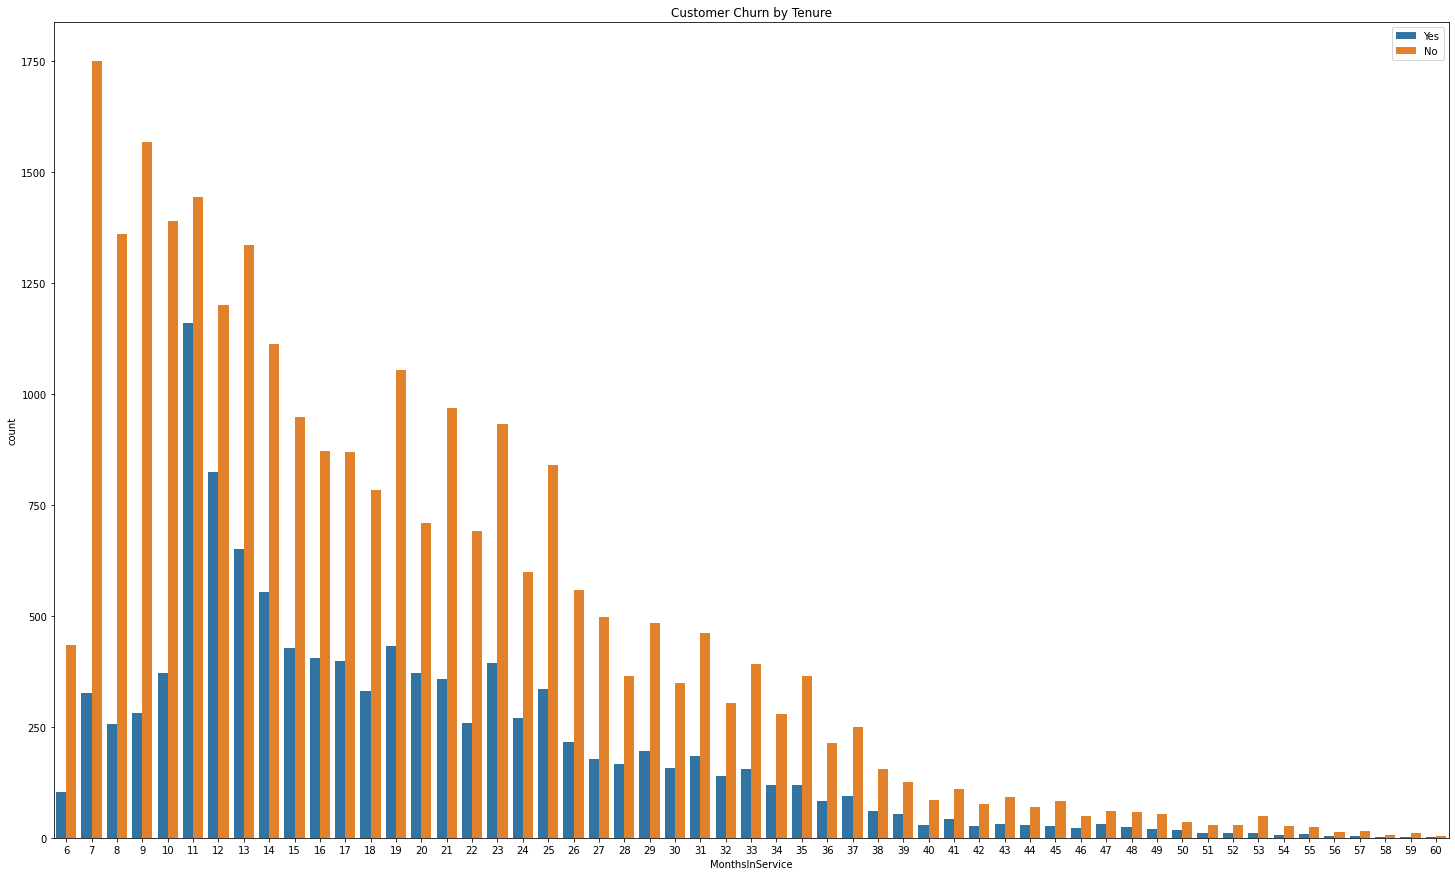

In [ ]:
sns.countplot(x='MonthsInService', hue='Churn',data=churn_train ).set(title='Customer Churn by Tenure')
plt.legend()
plt.show()

No handles with labels found to put in legend.


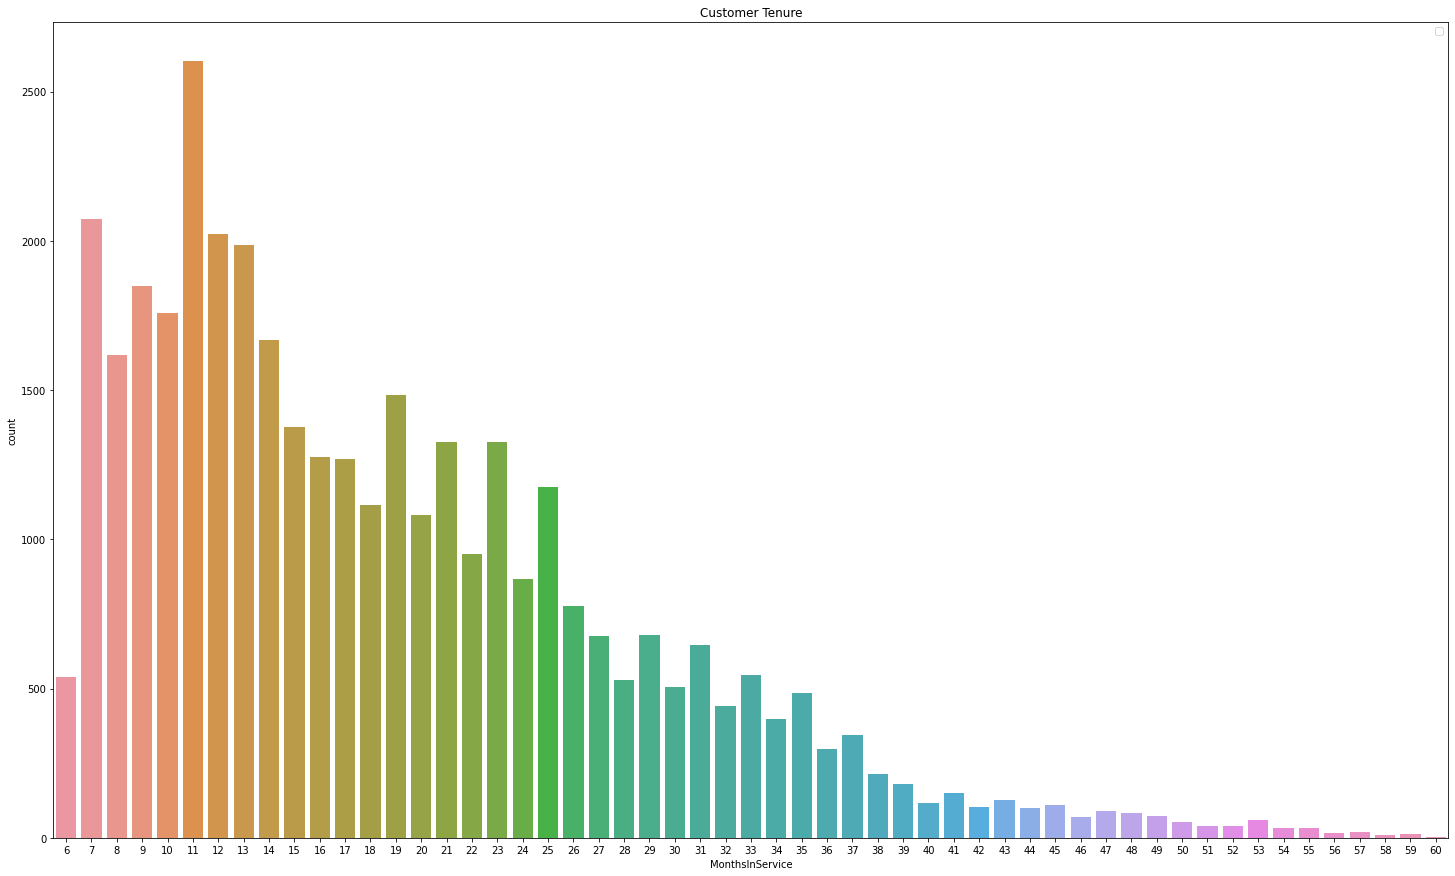

In [ ]:
sns.countplot(x='MonthsInService',data=churn_train ).set(title='Customer Tenure')
rcParams['figure.figsize'] = 25,15
plt.legend()
plt.show()

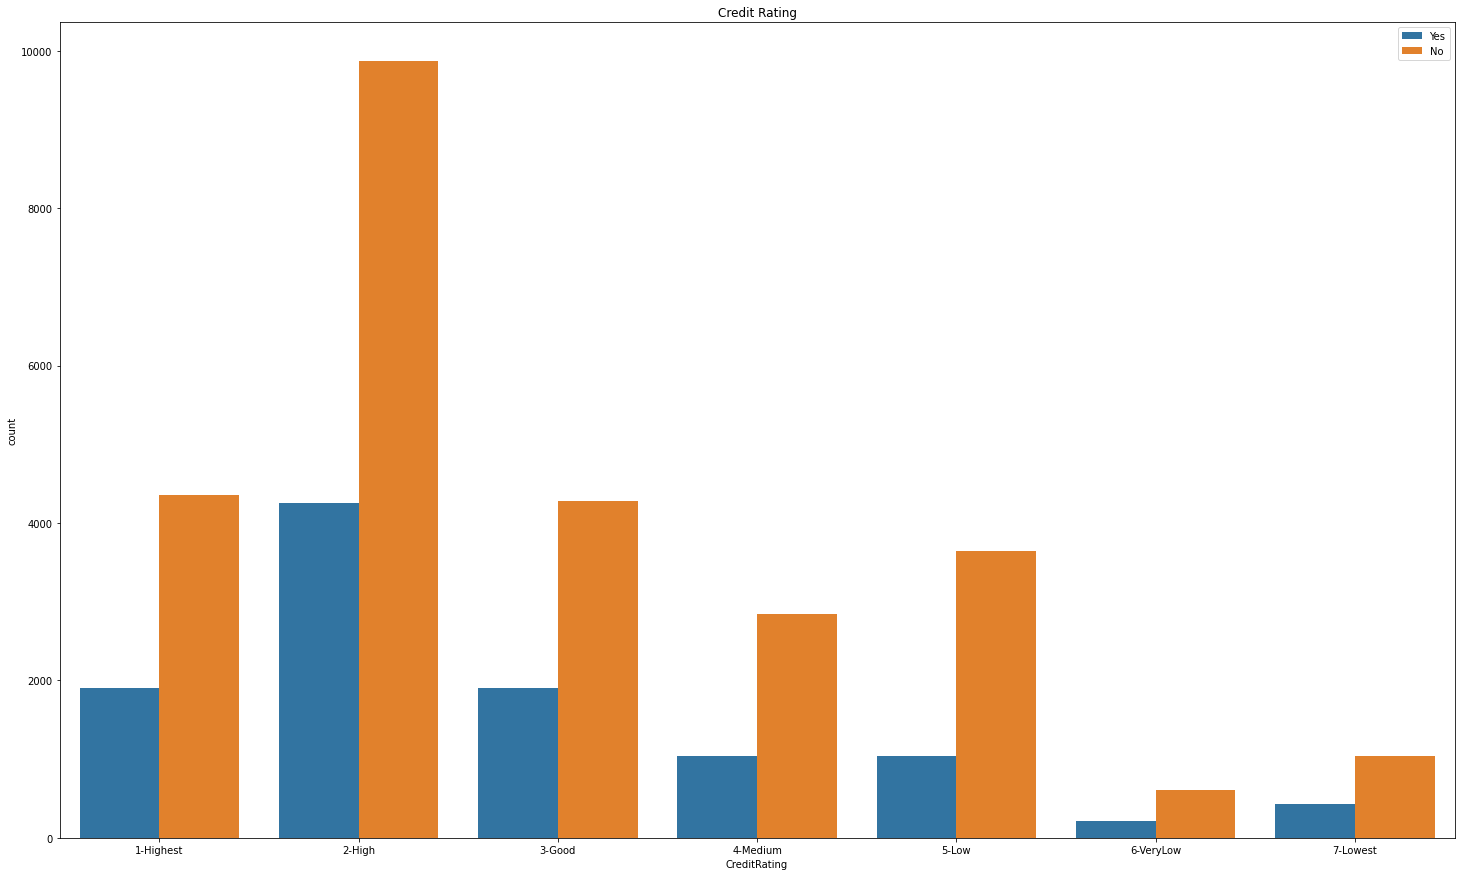

In [ ]:
sns.countplot(x='CreditRating', hue='Churn',data=churn_train ).set(title='Credit Rating')
plt.legend()
plt.show()

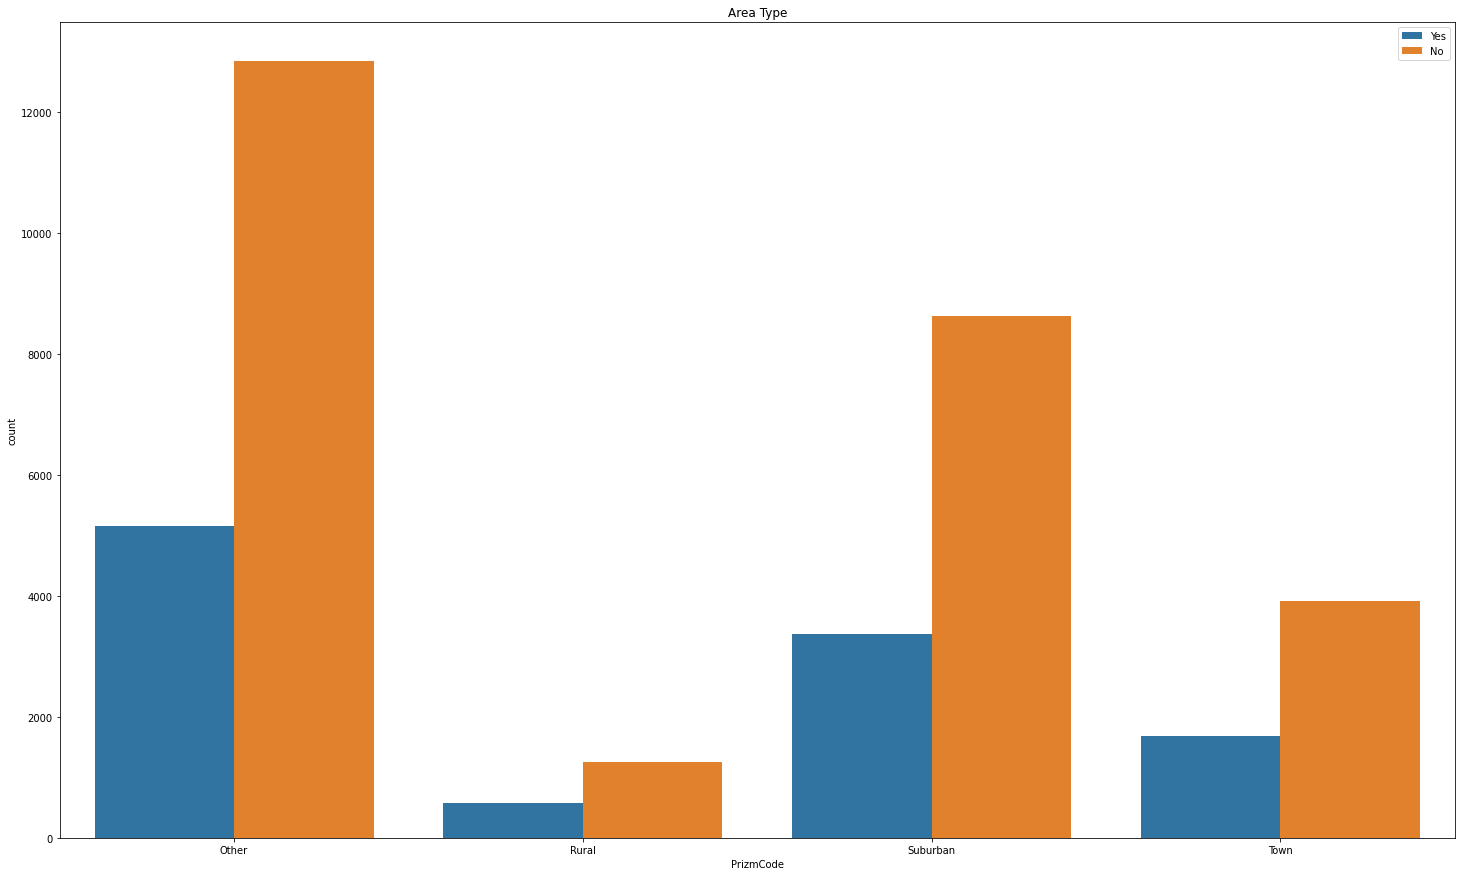

In [ ]:
sns.countplot(x='PrizmCode', hue='Churn',data=churn_train ).set(title='Area Type')
plt.legend()
plt.legend()
plt.show()

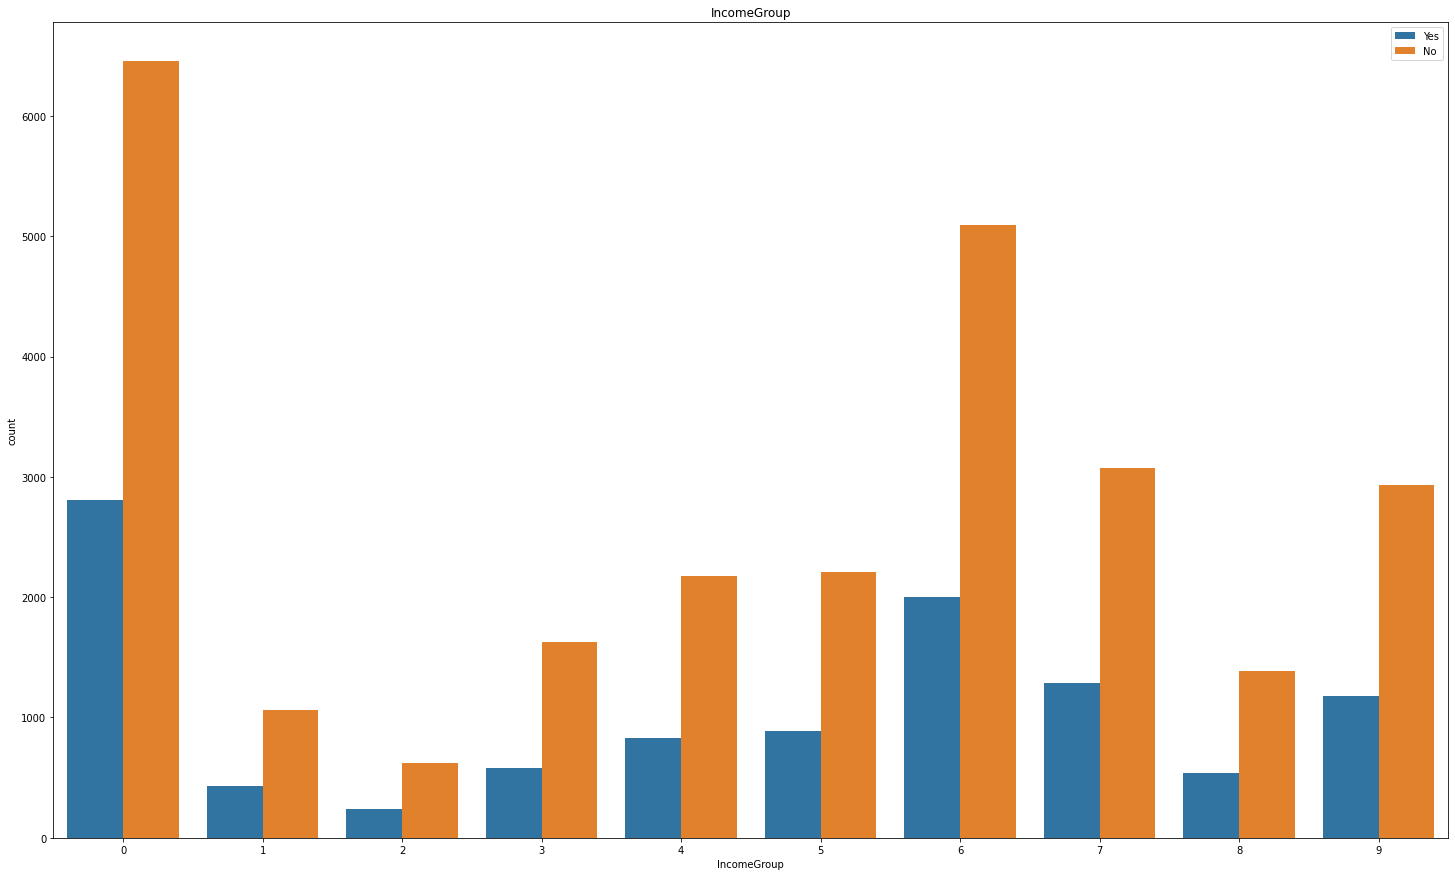

In [ ]:
sns.countplot(x='IncomeGroup', hue='Churn',data=churn_train ).set(title='IncomeGroup')
plt.legend()
plt.show()

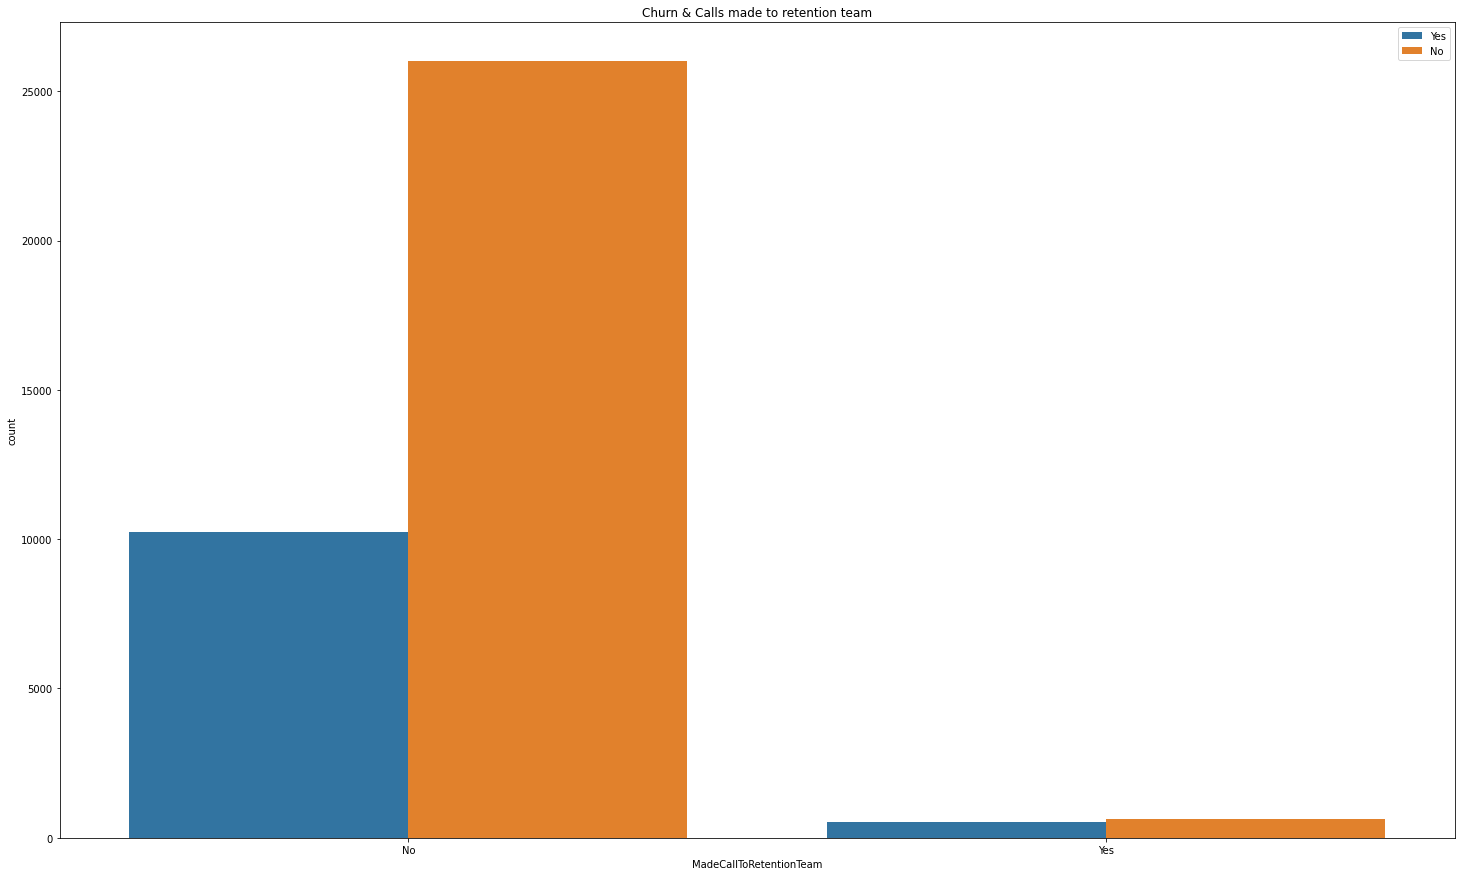

In [ ]:
sns.countplot(x='MadeCallToRetentionTeam', hue='Churn',data=churn_train )
rcParams['figure.figsize'] = 25,15
plt.title('Churn & Calls made to retention team')
plt.legend()
plt.show()

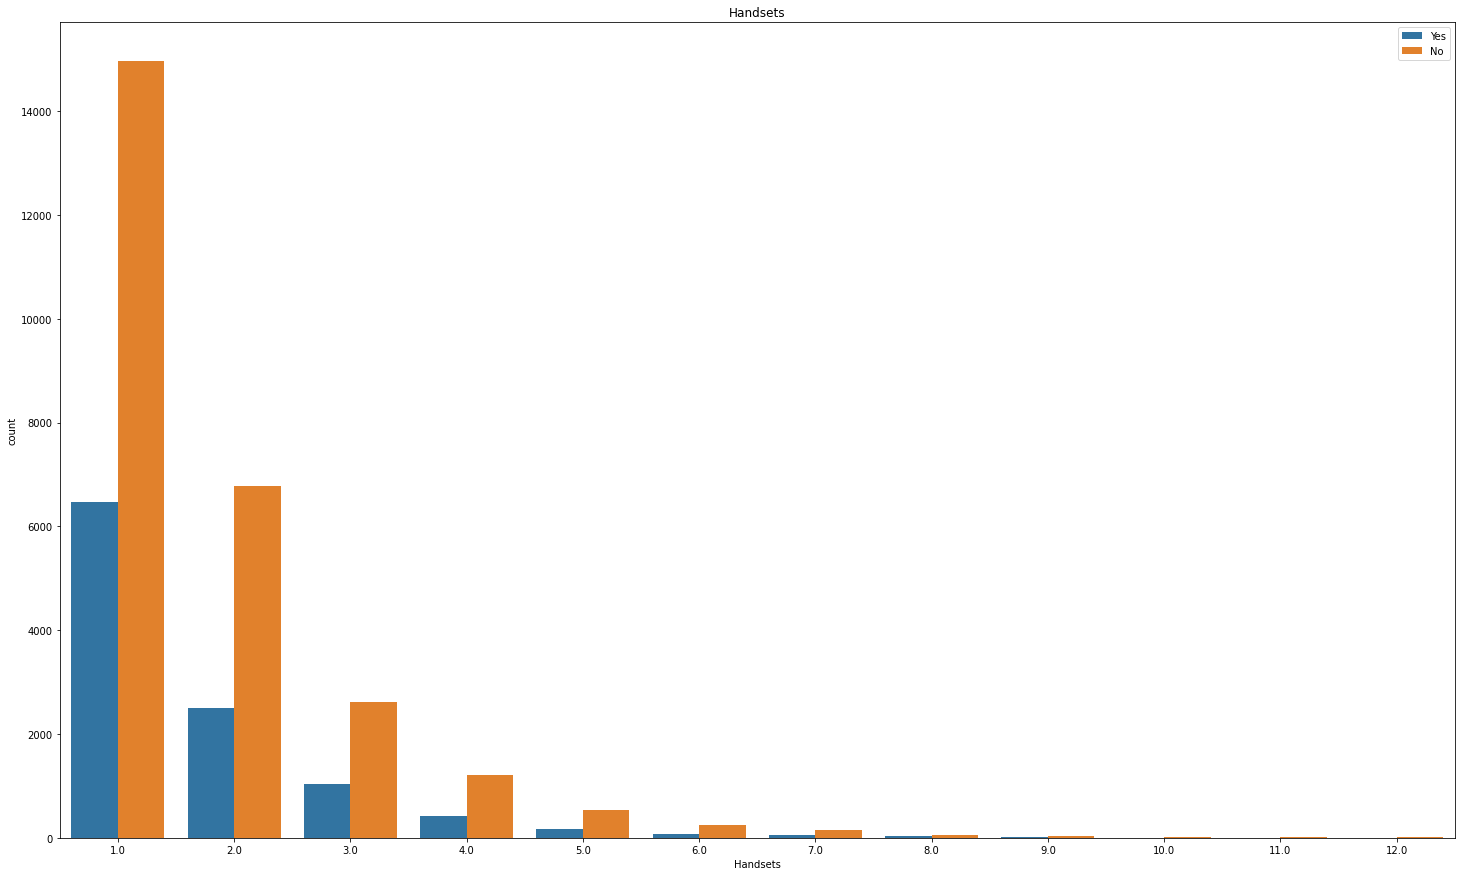

In [ ]:
sns.countplot(x='Handsets', hue='Churn',data=churn_train ).set(title='Handsets')
rcParams['figure.figsize'] = 25,15
plt.legend()
plt.show()

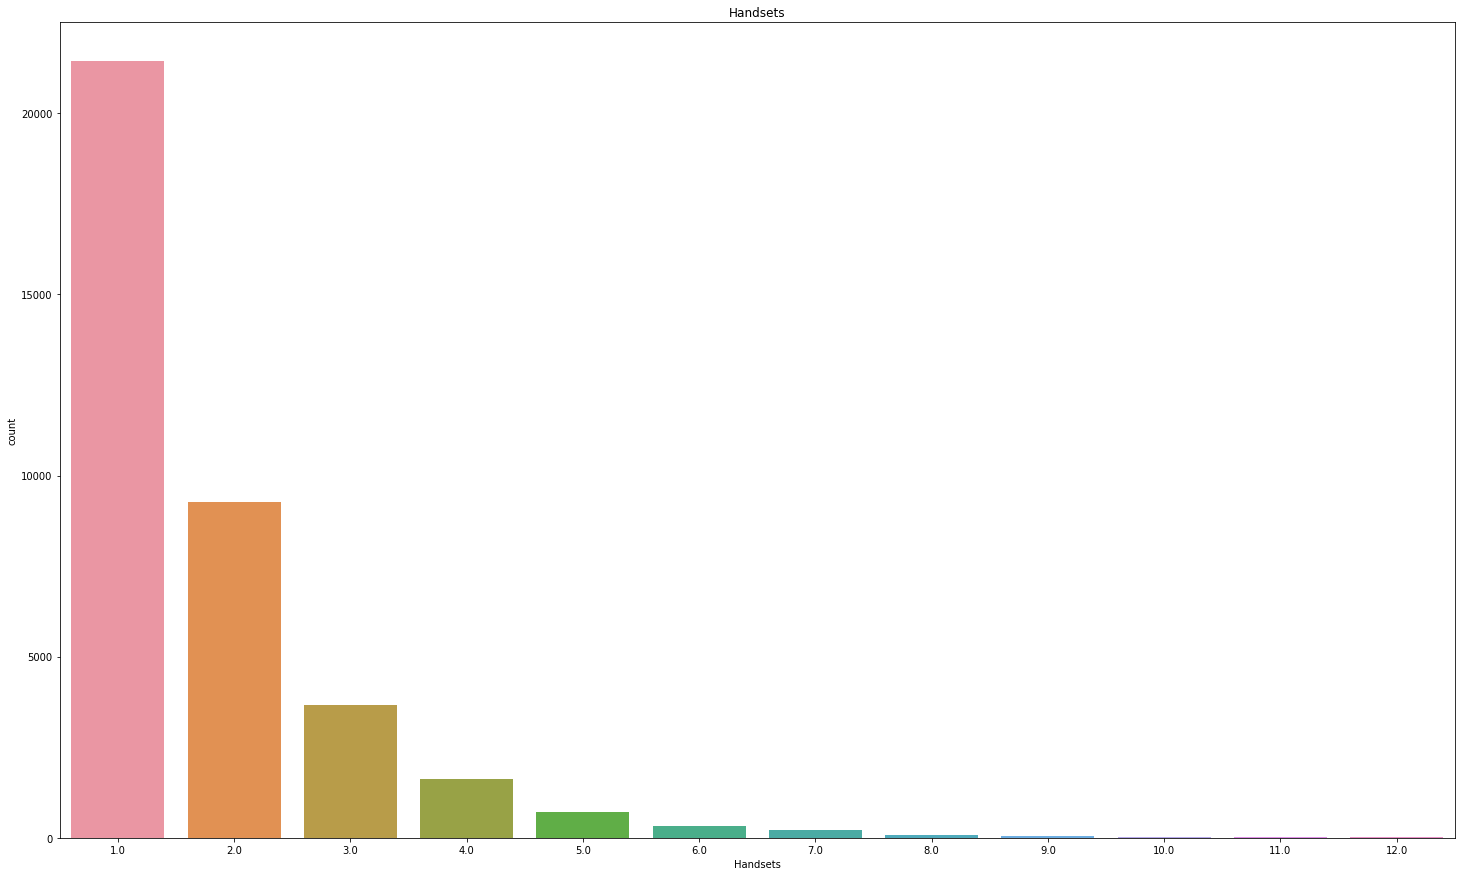

In [ ]:
sns.countplot(x='Handsets', data=churn_train ).set(title='Handsets')
plt.show()

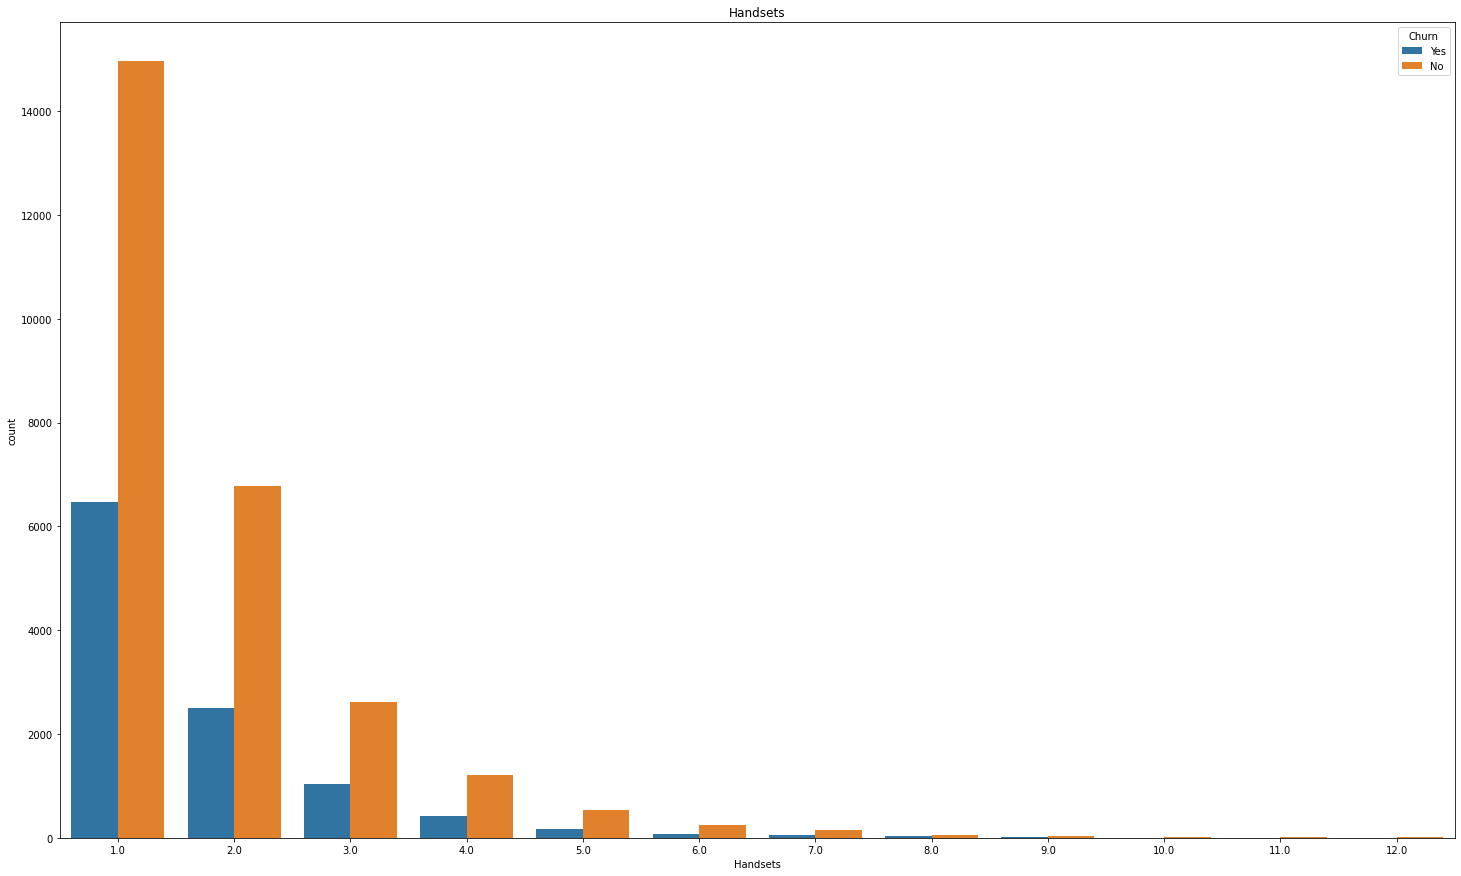

In [ ]:
sns.countplot(x='Handsets',hue='Churn', data=churn_train ).set(title='Handsets')
plt.show()

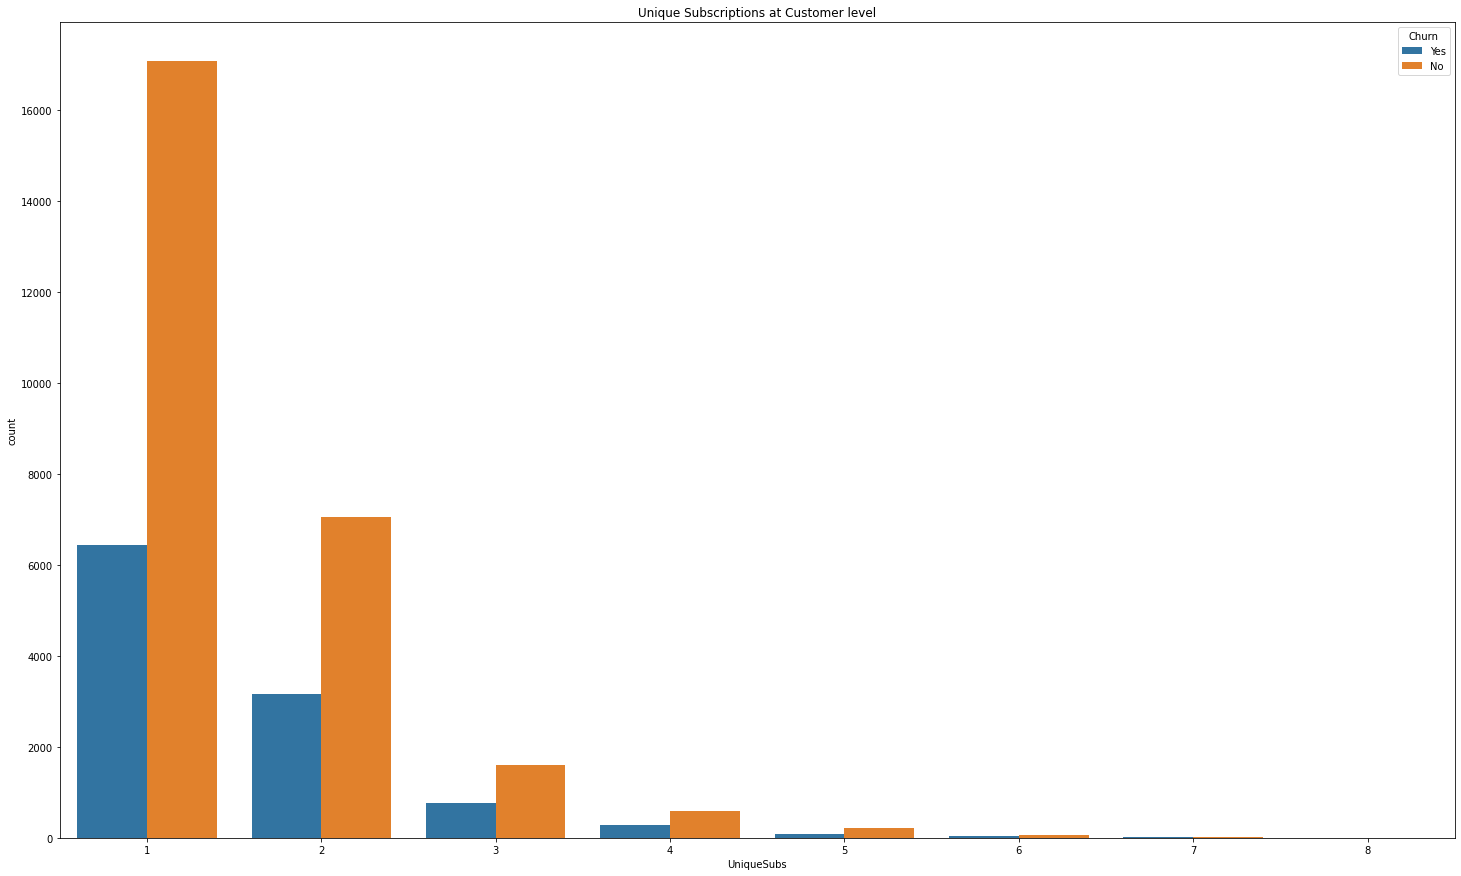

In [ ]:
sns.countplot(x='UniqueSubs',hue='Churn', data=churn_train ).set(title='Unique Subscriptions at Customer level')
plt.show()

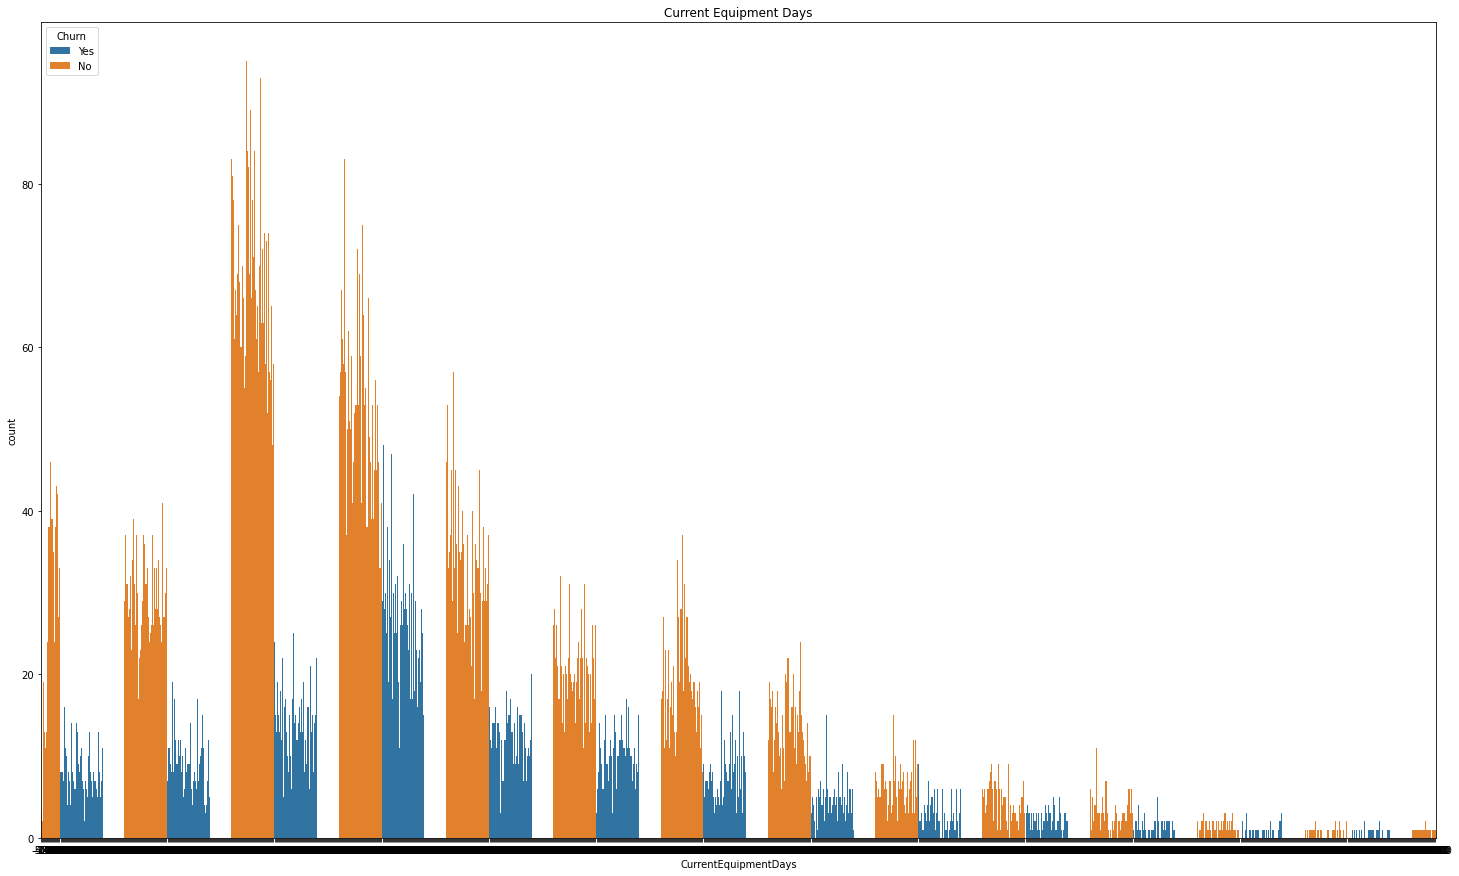

In [ ]:
sns.countplot(x='CurrentEquipmentDays',hue='Churn', data=churn_train ).set(title='Current Equipment Days')
plt.show()

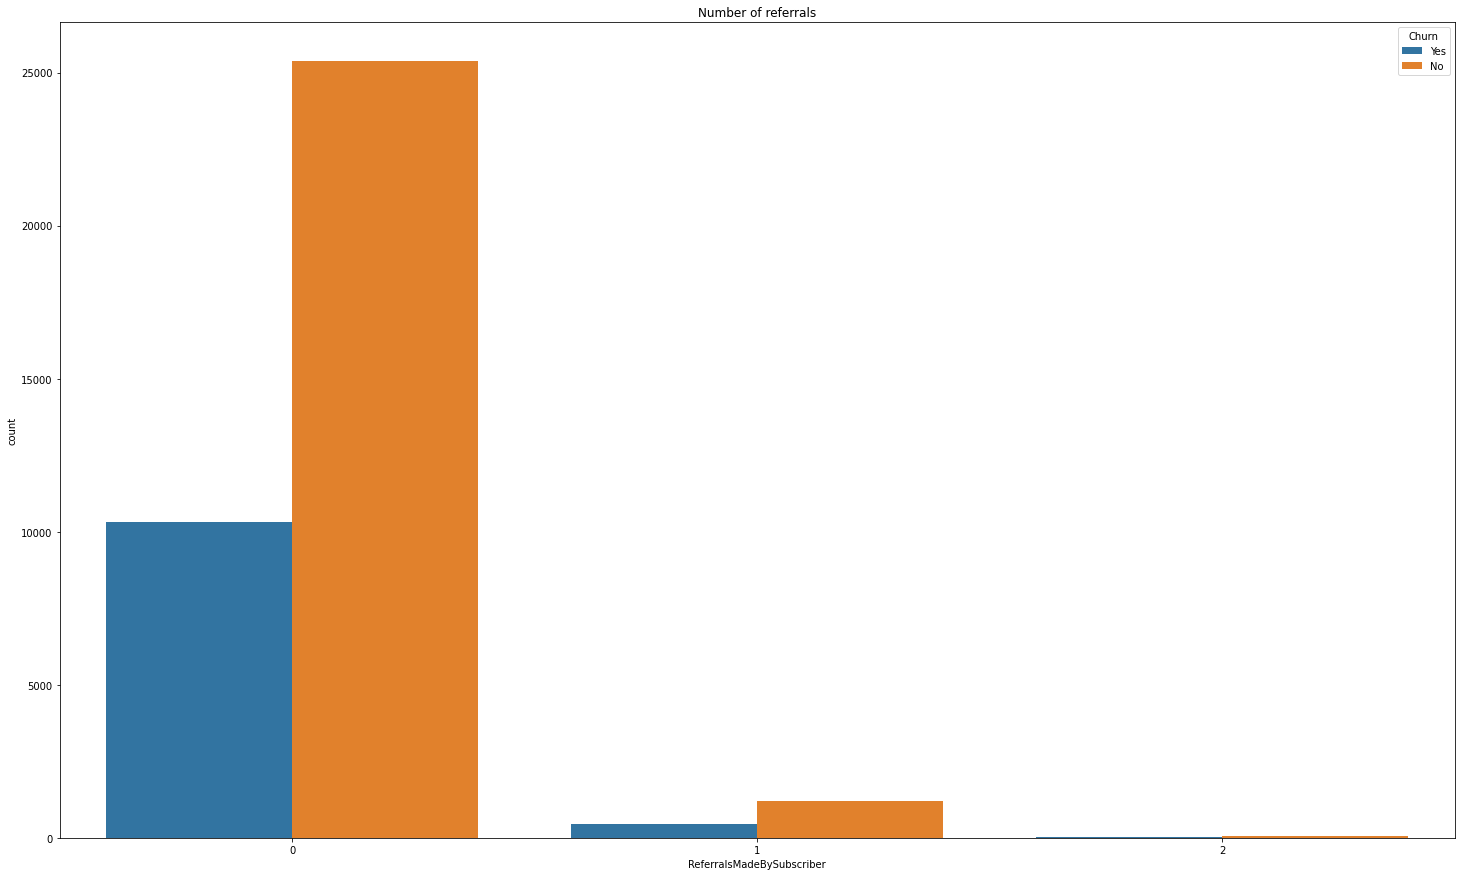

In [ ]:
sns.countplot(x='ReferralsMadeBySubscriber',hue='Churn', data=churn_train ).set(title='Number of referrals')
plt.show()

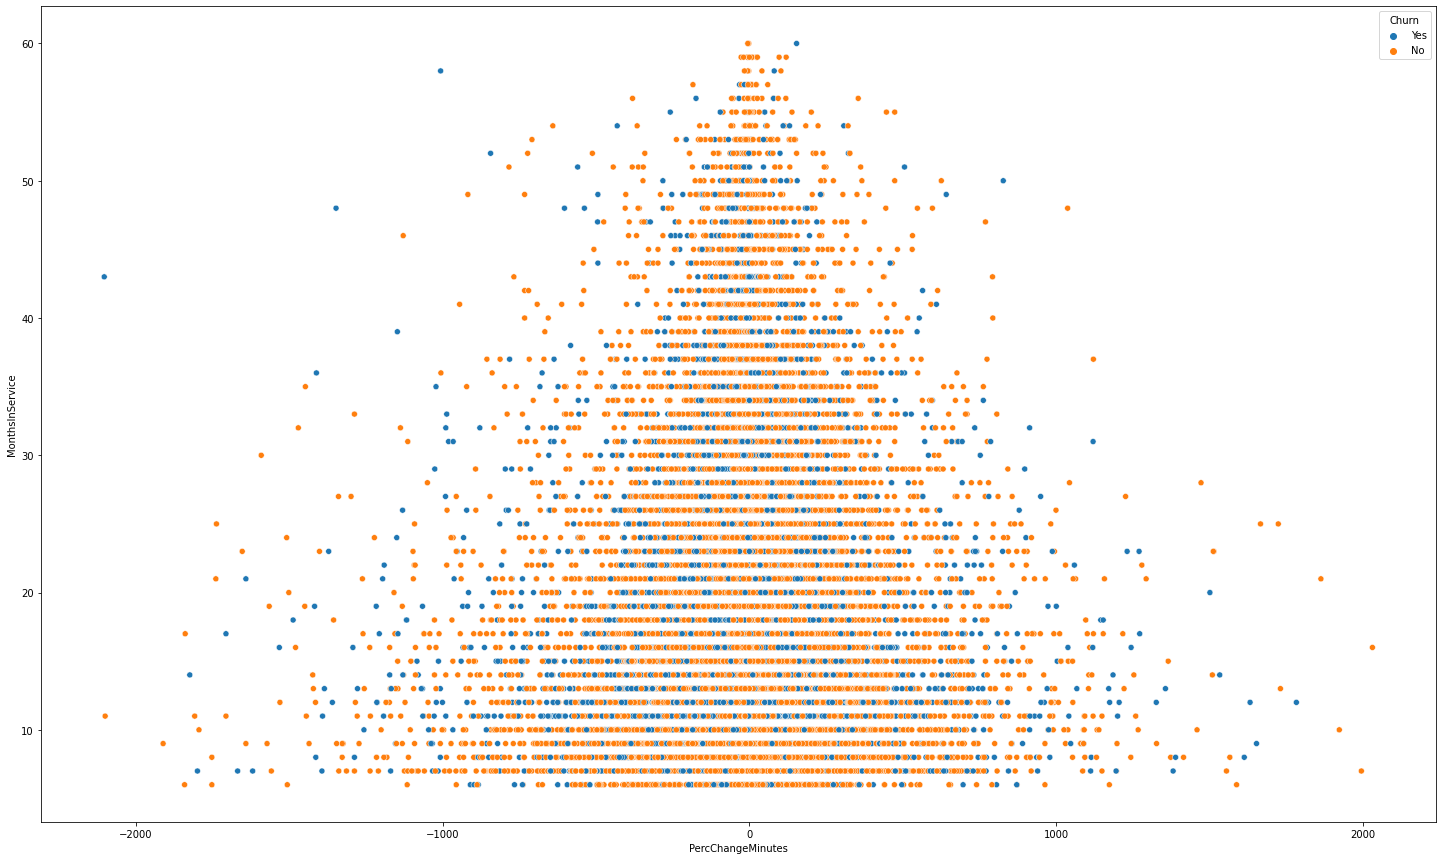

In [ ]:
sns.scatterplot(data=churn_train, x="PercChangeMinutes", y="MonthsInService", hue='Churn')

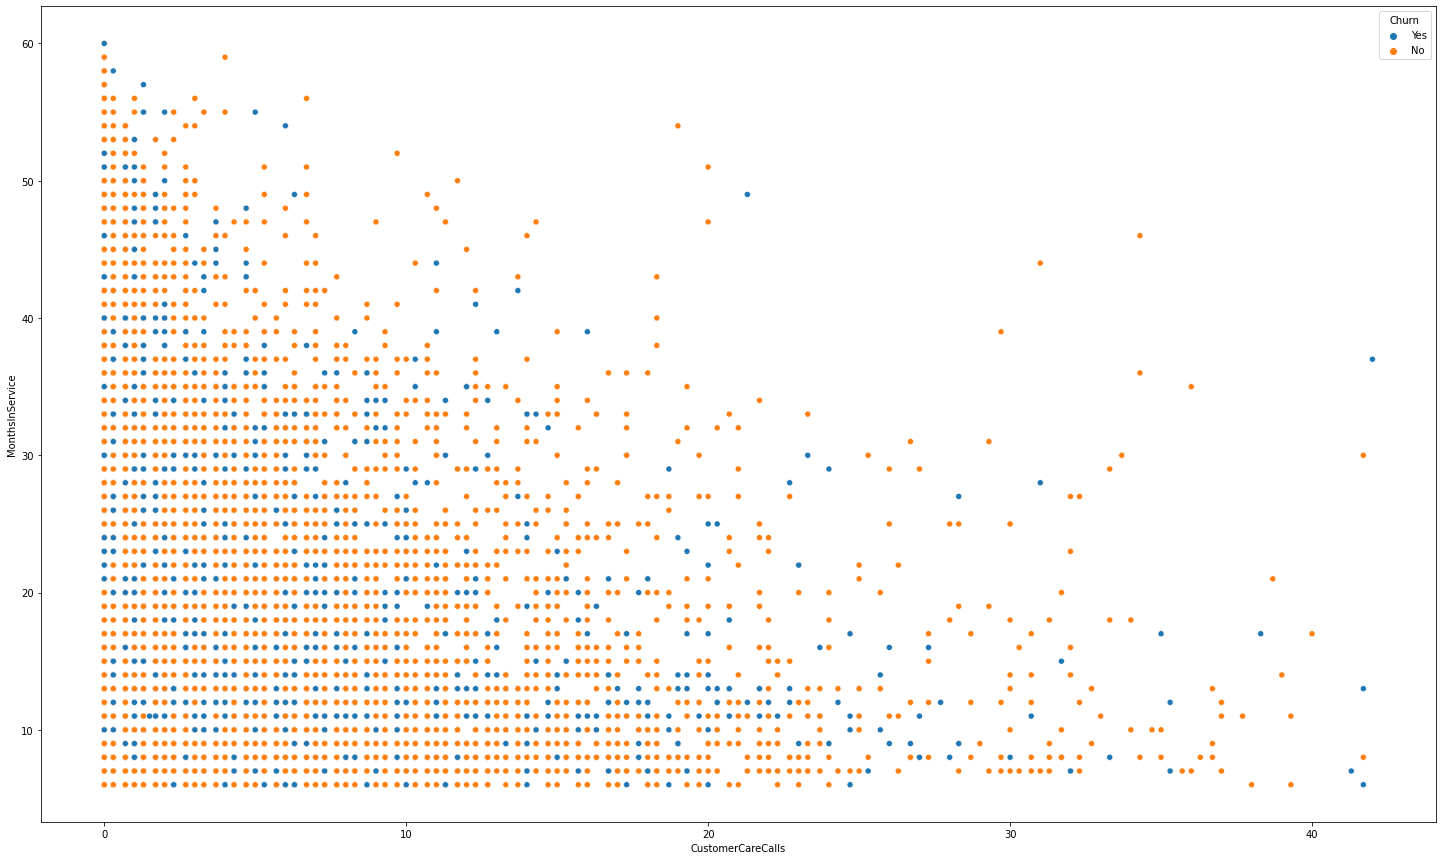

In [ ]:
sns.scatterplot(data=churn_train, x="CustomerCareCalls", y="MonthsInService", hue='Churn')

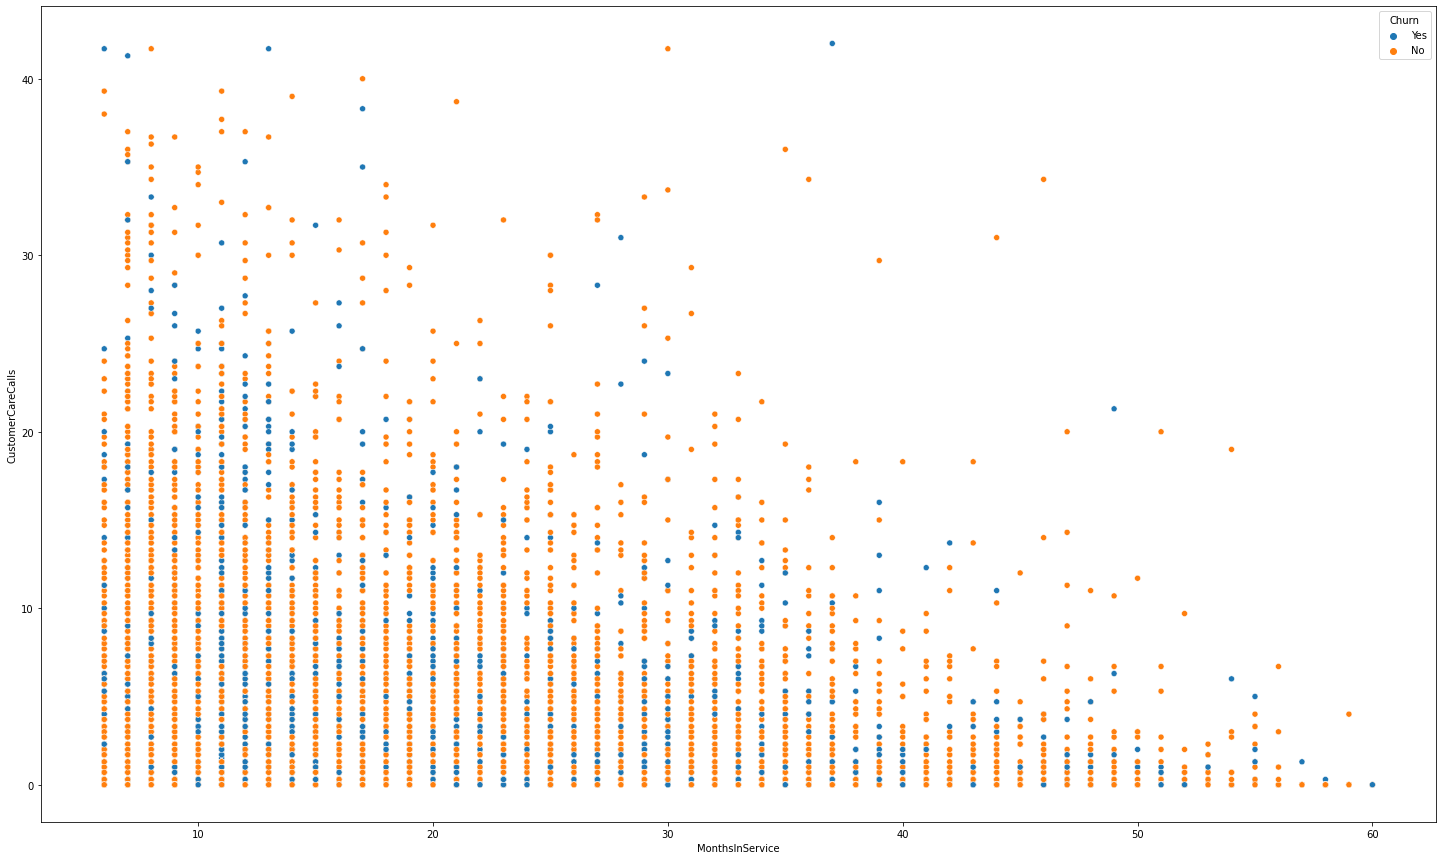

In [ ]:
sns.scatterplot(data=churn_train, x="MonthsInService", y="CustomerCareCalls", hue='Churn')

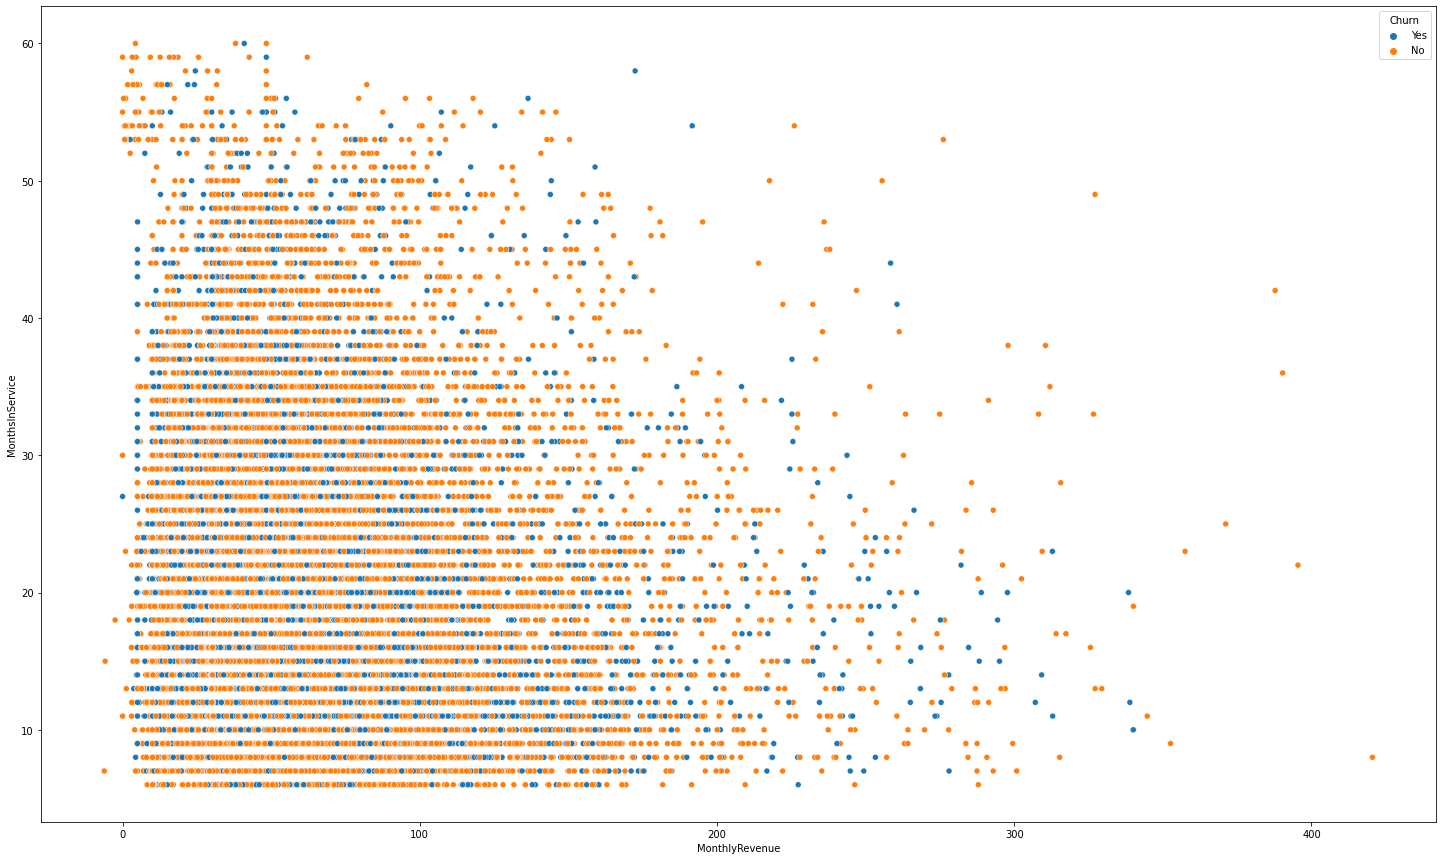

In [ ]:
sns.scatterplot(data=churn_train, x="MonthlyRevenue", y="MonthsInService", hue='Churn')



## **Encoding**



In [ ]:
# Define the Binary encoding function.

def binary_encode(df, column, positive_value):
    df[column]=df[column].apply(lambda x : 1 if x == positive_value else 0)
    return df

In [ ]:
# Define the Ordinal encoding function.

def ordinal_encode(df, column,  ordering):
    df[column]=df[column].apply(lambda x: ordering.index(x))
    return df

In [ ]:
# Define the One hot encoding function.

def onehot_encode (df, column):
    dummies=pd.get_dummies(df[column])
    df=pd.concat([df, dummies], axis=1)
    df=df.drop(column, axis=1)
    return df

In [ ]:
# We retrieve again the remaining categorical values.

get_uniques(churn_train, get_categorical_columns(churn_train))

{'BuysViaMailOrder': ['Yes', 'No'],
 'ChildrenInHH': ['No', 'Yes'],
 'Churn': ['Yes', 'No'],
 'CreditRating': ['1-Highest',
  '2-High',
  '3-Good',
  '4-Medium',
  '5-Low',
  '6-VeryLow',
  '7-Lowest'],
 'HandsetRefurbished': ['No', 'Yes'],
 'HandsetWebCapable': ['Yes', 'No'],
 'HasCreditCard': ['Yes', 'No'],
 'Homeownership': ['Known', 'Unknown'],
 'MadeCallToRetentionTeam': ['No', 'Yes'],
 'MaritalStatus': ['No', 'Unknown', 'Yes'],
 'NewCellphoneUser': ['No', 'Yes'],
 'NonUSTravel': ['No', 'Yes'],
 'Occupation': ['Professional',
  'Other',
  'Crafts',
  'Retired',
  'Homemaker',
  'Self',
  'Clerical',
  'Student'],
 'OptOutMailings': ['No', 'Yes'],
 'OwnsComputer': ['No', 'Yes'],
 'OwnsMotorcycle': ['No', 'Yes'],
 'PrizmCode': ['Other', 'Rural', 'Suburban', 'Town'],
 'RVOwner': ['No', 'Yes'],
 'RespondsToMailOffers': ['Yes', 'No'],
 'TruckOwner': ['No', 'Yes']}

We split the categorical variables from above into binary, ordinal and nominal, plus we isolate the target variable.






In [ ]:
binary_variables=['BuysViaMailOrder', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'HasCreditCard', 'MadeCallToRetentionTeam', 'NewCellphoneUser', 'NonUSTravel', 'OptOutMailings', 'OwnsComputer', 'OwnsMotorcycle', 'RVOwner', 'RespondsToMailOffers', 'TruckOwner']
binary_set_manual=['Homeownership']
ordinal_variables=['CreditRating']
nominal_variables=['MaritalStatus', 'Occupation', 'PrizmCode', 'HandsetPriceRange']

target_variable=['Churn']

'PrizmCode' has the potential of being Ordinal (rural -> suburban - > town), but with 48% of the values being in the 'Other' category, it is better suited as a nominal one.


'MaritalStatus' would normally have been a binary variable, but there are about 38% of values marked as 'Unknown'.

We start with the Binary and Ordinal encoding so that, at the end, we can just pass all the remaining categorical variables through the One hot encoding function.


**Binary encoding**



In [ ]:
# Run the binary encoding function for the variables with Yes/No values for the train dataset.
for column in binary_variables:
    churn_train=binary_encode (churn_train, column, 'Yes' )

In [ ]:
# Run the binary encoding function for the variables with Yes/No values for the test dataset.
for column in binary_variables:
    churn_test=binary_encode (churn_test, column, 'Yes' )

In [ ]:
# Run the binary encoding function for the variables with other values than Yes/No, specificing which is the positive value - for the train dataset.
for column in binary_set_manual:
    churn_train=binary_encode (churn_train, column, 'Known' )

In [ ]:
# Run the binary encoding function for the variables with other vaalues then Yes/No, specificing which is the positive value - for the test dataset.
for column in binary_set_manual:
    churn_test=binary_encode (churn_test, column, 'Known' )

In [ ]:
# Encode the target variable for the train dataset.
churn_train=binary_encode(churn_train, 'Churn', 'Yes')

In [ ]:
# Encode the target variable for the test dataset.
churn_test=binary_encode(churn_test, 'Churn', 'Yes')

In [ ]:
get_uniques(churn_train, binary_variables)

{'BuysViaMailOrder': [1, 0],
 'ChildrenInHH': [0, 1],
 'HandsetRefurbished': [0, 1],
 'HandsetWebCapable': [1, 0],
 'HasCreditCard': [1, 0],
 'MadeCallToRetentionTeam': [0, 1],
 'NewCellphoneUser': [0, 1],
 'NonUSTravel': [0, 1],
 'OptOutMailings': [0, 1],
 'OwnsComputer': [0, 1],
 'OwnsMotorcycle': [0, 1],
 'RVOwner': [0, 1],
 'RespondsToMailOffers': [1, 0],
 'TruckOwner': [0, 1]}

**Ordinal encoding**

In [ ]:
# We set the order for the ordinal variable 'CreditRating'. We will leave the order as indicated by the labels.
credit_order=['1-Highest', '2-High', '3-Good', '4-Medium', '5-Low', '6-VeryLow', '7-Lowest']

In [ ]:
# We run the ordinal encoding function on the ordinal variable in the train dataset.
churn_train=ordinal_encode(churn_train, 'CreditRating', credit_order)

In [ ]:
# We run the ordinal encoding function on the ordinal variable in the test dataset.
churn_test=ordinal_encode(churn_test, 'CreditRating', credit_order)

**Nominal encoding**

In [ ]:
# Perform one hot encoding for the nominal variables from the train dataset.
churn_train= onehot_encode(churn_train, nominal_variables)

In [ ]:
# Perform one hot encoding for the nominal variables from the test dataset.
churn_test= onehot_encode(churn_test, nominal_variables)

In [ ]:
churn_train.head()

,Churn,MonthlyRevenue,TotalRecurringCharge,DirectorAssistedCalls,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,OutboundCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,Handsets,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,MaritalStatus_No,MaritalStatus_Unknown,MaritalStatus_Yes,Occupation_Clerical,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,PrizmCode_Other,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,HandsetPriceRange_0 to 100,HandsetPriceRange_101 to 200,HandsetPriceRange_Above 201,HandsetPriceRange_Unknown
0,1,29.99,40.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,1,2.0,334.0,36.0,34.0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,0,6,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
1,0,38.91,45.0,0.00,3.7,0.0,-3.9,1.7,2.0,37.0,0.0,0.0,28.0,0.0,1.7,10,1,1.0,287.0,30.0,0.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,6,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
2,1,72.05,51.0,0.99,8.5,-204.0,-16.2,5.7,12.0,17.3,0.0,0.3,38.0,0.0,0.7,16,1,1.0,464.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
3,0,29.79,20.0,0.00,0.0,48.0,16.6,1.7,5.7,3.0,0.0,0.3,3.3,0.0,0.0,26,1,1.0,776.0,42.0,0.0,1,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,7,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
4,0,35.25,30.0,0.00,0.0,59.0,0.4,1.0,2.0,14.3,0.0,0.0,5.0,0.0,0.7,21,1,1.0,645.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,6,0,0,0,2,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
churn_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37418 entries, 0 to 37417
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Churn                         37418 non-null  int64  
 1   MonthlyRevenue                37418 non-null  float64
 2   TotalRecurringCharge          37418 non-null  float64
 3   DirectorAssistedCalls         37418 non-null  float64
 4   RoamingCalls                  37418 non-null  float64
 5   PercChangeMinutes             37418 non-null  float64
 6   PercChangeRevenues            37418 non-null  float64
 7   DroppedCalls                  37418 non-null  float64
 8   BlockedCalls                  37418 non-null  float64
 9   UnansweredCalls               37418 non-null  float64
 10  CustomerCareCalls             37418 non-null  float64
 11  ThreewayCalls                 37418 non-null  float64
 12  OutboundCalls                 37418 non-null  float64
 13  C

In [ ]:
churn_train.isna().sum()

Churn                           0
MonthlyRevenue                  0
TotalRecurringCharge            0
DirectorAssistedCalls           0
RoamingCalls                    0
PercChangeMinutes               0
PercChangeRevenues              0
DroppedCalls                    0
BlockedCalls                    0
UnansweredCalls                 0
CustomerCareCalls               0
ThreewayCalls                   0
OutboundCalls                   0
CallForwardingCalls             0
CallWaitingCalls                0
MonthsInService                 0
UniqueSubs                      0
Handsets                        0
CurrentEquipmentDays            0
AgeHH1                          0
AgeHH2                          0
ChildrenInHH                    0
HandsetRefurbished              0
HandsetWebCapable               0
TruckOwner                      0
RVOwner                         0
Homeownership                   0
BuysViaMailOrder                0
RespondsToMailOffers            0
OptOutMailings

# **Check if data is balanced or unbalanced**

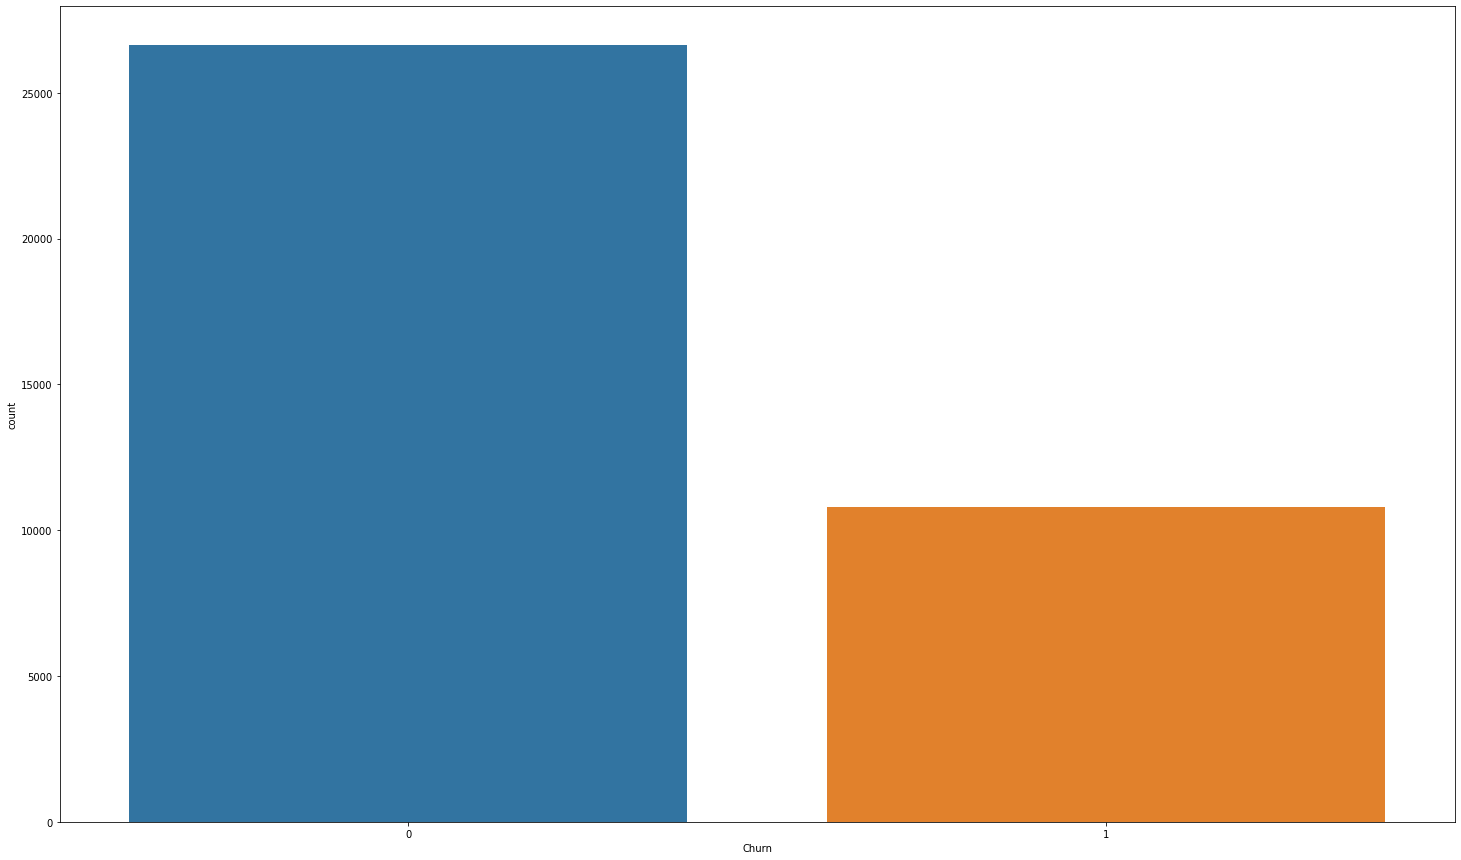

In [ ]:
# Churn chart using countplot
sns.countplot(x=churn_train.Churn)


In [ ]:
# Check dataset percentages for churn data.
((churn_train['Churn'].value_counts())/(churn_train.shape[0]))*100

0    71.179646
1    28.820354
Name: Churn, dtype: float64

Out data is unbalanced so we will use upsampling to balance the dataset.
First, we split the train and test data into features and samples.

# **Dataset split into features and target.**

In [ ]:
y_train=churn_train['Churn']
y_test=churn_test['Churn']

In [ ]:
X_train=churn_train.drop('Churn',axis=1 )
X_test=churn_test.drop('Churn',axis=1 )

# **Dataset rebalancing using SMOTE.**

In [ ]:
print('Before upsampling count of label 0 {}'.format(sum(y_train==0)))
print('Before upsampling count of label 1 {}'.format(sum(y_train==1)))

# Minority Over Sampling Technique
sm = SMOTE(sampling_strategy = 1, random_state=1)   
X_train, y_train = sm.fit_resample(X_train, y_train)
                                         
print('After upsampling count of label 0 {}'.format(sum(y_train==0)))
print('After upsampling count of label 1 {}'.format(sum(y_train==1)))

Before upsampling count of label 0 26634
Before upsampling count of label 1 10784
After upsampling count of label 0 26634
After upsampling count of label 1 26634


In [ ]:
y_train

0        1
1        0
2        1
3        0
4        0
        ..
53263    1
53264    1
53265    1
53266    1
53267    1
Name: Churn, Length: 53268, dtype: int64

## **Data scaling** / **Data transformation**

We will fit and transform the train dataset.

We will only use transform() on the test dataset ( we will 
use the scaling paramaters learned on the train data to scale the test data).

In [ ]:
scaler=MinMaxScaler()

# Fit and transform the train dataset.

#scaler.fit(X_train)
X_train=pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index,columns=X_train.columns)

# Transform the test dataset.
X_test=pd.DataFrame(scaler.transform(X_test), index=X_test.index,columns=X_test.columns)


In [ ]:
# Check variation after applying fit & transform.
X_train.var()

MonthlyRevenue                  0.007265
TotalRecurringCharge            0.008046
DirectorAssistedCalls           0.006940
RoamingCalls                    0.002485
PercChangeMinutes               0.003214
PercChangeRevenues              0.002782
DroppedCalls                    0.008324
BlockedCalls                    0.005939
UnansweredCalls                 0.008572
CustomerCareCalls               0.006977
ThreewayCalls                   0.004347
OutboundCalls                   0.009096
CallForwardingCalls             0.000229
CallWaitingCalls                0.005307
MonthsInService                 0.029680
UniqueSubs                      0.012590
Handsets                        0.011100
CurrentEquipmentDays            0.019747
AgeHH1                          0.047756
AgeHH2                          0.055830
ChildrenInHH                    0.162046
HandsetRefurbished              0.095720
HandsetWebCapable               0.115704
TruckOwner                      0.126670
RVOwner         

In [ ]:
# Check mean after applying fit & transform.
X_train.mean(axis=0)

MonthlyRevenue                  0.145578
TotalRecurringCharge            0.232623
DirectorAssistedCalls           0.040364
RoamingCalls                    0.012213
PercChangeMinutes               0.505520
PercChangeRevenues              0.481257
DroppedCalls                    0.068220
BlockedCalls                    0.036864
UnansweredCalls                 0.074056
CustomerCareCalls               0.037461
ThreewayCalls                   0.023738
OutboundCalls                   0.072886
CallForwardingCalls             0.000703
CallWaitingCalls                0.030726
MonthsInService                 0.233037
UniqueSubs                      0.064906
Handsets                        0.066943
CurrentEquipmentDays            0.220775
AgeHH1                          0.318655
AgeHH2                          0.208838
ChildrenInHH                    0.203424
HandsetRefurbished              0.107213
HandsetWebCapable               0.866468
TruckOwner                      0.148814
RVOwner         

In [ ]:
X_train

,MonthlyRevenue,TotalRecurringCharge,DirectorAssistedCalls,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,OutboundCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,Handsets,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,MaritalStatus_No,MaritalStatus_Unknown,MaritalStatus_Yes,Occupation_Clerical,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,PrizmCode_Other,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,HandsetPriceRange_0 to 100,HandsetPriceRange_101 to 200,HandsetPriceRange_Above 201,HandsetPriceRange_Unknown
0,0.084749,0.209877,0.000000,0.000000,0.508704,0.483077,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.111111,0.000000,0.090909,0.186571,0.367347,0.343434,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.105655,0.230453,0.000000,0.045510,0.508704,0.476410,0.021330,0.021436,0.107153,0.000000,0.000000,0.088412,0.0,0.034908,0.074074,0.000000,0.000000,0.160704,0.306122,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.666667,0.0,0.0,0.0,0.166667,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.183327,0.255144,0.050639,0.104551,0.459381,0.455385,0.071518,0.128617,0.050101,0.000000,0.030928,0.119987,0.0,0.014374,0.185185,0.000000,0.000000,0.258118,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.084281,0.127572,0.000000,0.000000,0.520309,0.511453,0.021330,0.061093,0.008688,0.000000,0.030928,0.010420,0.0,0.000000,0.370370,0.000000,0.000000,0.429829,0.428571,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.777778,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.097077,0.168724,0.000000,0.000000,0.522969,0.483761,0.012547,0.021436,0.041413,0.000000,0.000000,0.015788,0.0,0.014374,0.277778,0.000000,0.000000,0.357733,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.0,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53263,0.058355,0.119885,0.034201,0.000000,0.507303,0.469639,0.004248,0.078510,0.019993,0.027967,0.093151,0.019497,0.0,0.000000,0.092593,0.142857,0.099676,0.089317,0.534548,0.529149,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.166667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
53264,0.181844,0.226405,0.022649,0.003448,0.540490,0.554821,0.105211,0.021436,0.085941,0.009973,0.061687,0.019000,0.0,0.002474,0.185185,0.000000,0.000000,0.267569,0.469388,0.440470,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.444444,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
53265,0.125230,0.212256,0.006830,0.028078,0.328210,0.389989,0.145465,0.113892,0.206745,0.020482,0.096054,0.072678,0.0,0.015726,0.037037,0.000000,0.042351,0.122341,0.387755,0.275932,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.555556,0.0,0.0,0.0,1.000000,0.0,0

In [ ]:
X_test

,MonthlyRevenue,TotalRecurringCharge,DirectorAssistedCalls,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,OutboundCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,Handsets,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,MaritalStatus_No,MaritalStatus_Unknown,MaritalStatus_Yes,Occupation_Clerical,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,PrizmCode_Other,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,HandsetPriceRange_0 to 100,HandsetPriceRange_101 to 200,HandsetPriceRange_Above 201,HandsetPriceRange_Unknown
0,0.088874,0.209877,0.000000,0.00123,0.506770,0.480000,0.003764,0.046088,0.023168,0.000000,0.072165,0.029365,0.0,0.000000,0.166667,0.285714,0.000000,0.233352,0.387755,0.404040,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.555556,0.0,0.0,0.0,0.166667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.544121,0.246914,0.303836,0.00000,0.530948,0.618803,0.392723,0.042872,0.344628,0.030952,0.072165,0.437954,0.0,0.390144,0.092593,0.428571,0.090909,0.023115,0.224490,0.000000,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.098413,0.086420,0.291049,0.00000,0.552224,0.522564,0.184442,0.007503,0.204749,0.000000,0.000000,0.332491,0.0,0.000000,0.351852,0.142857,0.000000,0.408916,0.469388,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.167530,0.292181,0.000000,0.00000,0.606867,0.541197,0.012547,0.142551,0.055893,0.016667,0.000000,0.070414,0.0,0.041068,0.129630,0.000000,0.090909,0.164007,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.500000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.224529,0.246914,0.139130,0.00123,0.568182,0.520342,0.104141,0.050375,0.163047,0.054762,0.134021,0.199874,0.0,0.199179,0.222222,0.000000,0.000000,0.288387,0.530612,0.363636,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.222222,0.0,0.0,0.0,0.166667,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12757,0.204350,0.378601,0.050639,0.00000,0.479691,0.448205,0.096612,0.539121,0.054156,0.000000,0.175258,0.195769,0.0,0.149897,0.129630,0.000000,0.090909,0.036874,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.000000,0.0,0.0,0.0,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12758,0.227904,0.292181,0.101279,0.00000,0.572050,0.565641,0.573400,0.035370,0.170866,0.261905,0.340206,0.461951,0.0,0.014374,0.037037,0.000000,0.000000,0.135388,0.448980,0.424242,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.666667,0.0,0.0,0.0,0.666667,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12759,0.335388,0.543210,0.265985,0.00000,0.470261,0.459145,0.405270,0.018221,0.364900,0.095238,0.175258,0.227344,0.0,0.020534,0.259259,0.000000,0.000000,0.321409,0.551020,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.0,0.0,0.166667,1.0,0.0,0.0,0

# **Feature selection**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

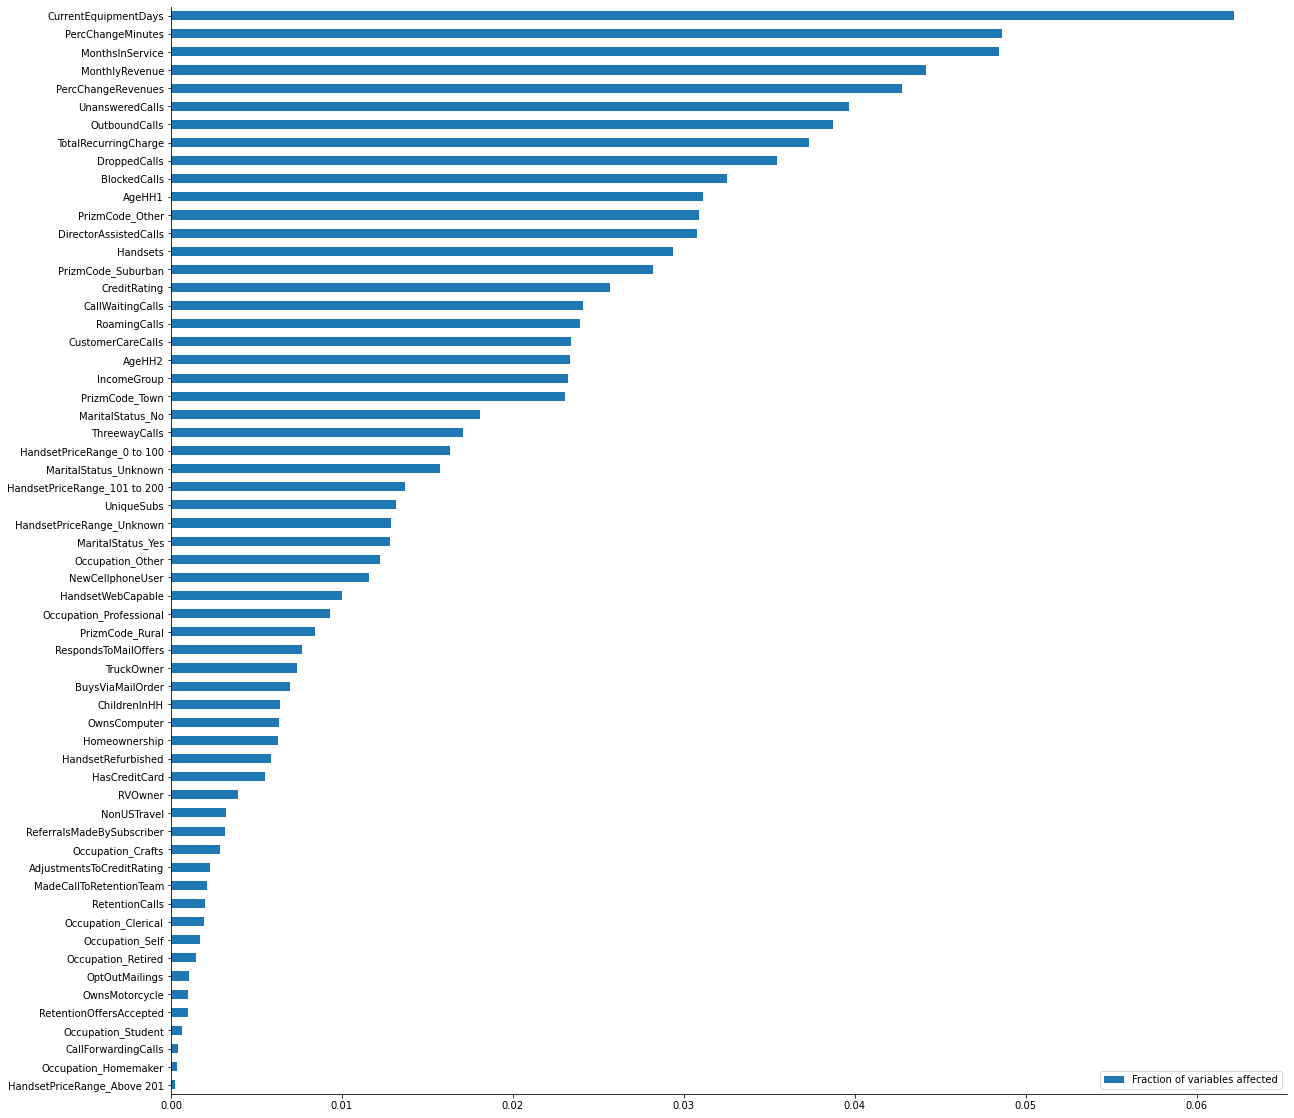

In [ ]:
feat_scores= pd.DataFrame({"Fraction of variables affected" : rf.feature_importances_},index = X_train.columns)
feat_scores= feat_scores.sort_values(by = "Fraction of variables affected")
feat_scores.plot(kind = "barh", figsize = (20, 20))
sns.despine()

In [ ]:
# Assign the top 25 variables from the feature selection step to a new  train dataframe. We will run the next steps only on this new dataframe containing the variable selection.
X_test_FT = X_test[['CurrentEquipmentDays', 'PercChangeMinutes', 'MonthlyRevenue', 'PercChangeRevenues', 'MonthsInService', 'UnansweredCalls', 'OutboundCalls', 'DroppedCalls', 'TotalRecurringCharge', 'BlockedCalls', 'AgeHH1','DirectorAssistedCalls','IncomeGroup','AgeHH2','CallWaitingCalls','CustomerCareCalls','RoamingCalls','CreditRating','UniqueSubs','ThreewayCalls','Handsets', 'PrizmCode_Other','PrizmCode_Suburban','PrizmCode_Town', 'PrizmCode_Rural' ]].copy()

In [ ]:
# Assign the top 25 variables from the feature selection step to a new test dataframe.
X_train_FT = X_train[['CurrentEquipmentDays', 'PercChangeMinutes', 'MonthlyRevenue', 'PercChangeRevenues', 'MonthsInService', 'UnansweredCalls', 'OutboundCalls', 'DroppedCalls', 'TotalRecurringCharge', 'BlockedCalls', 'AgeHH1','DirectorAssistedCalls','IncomeGroup','AgeHH2','CallWaitingCalls','CustomerCareCalls','RoamingCalls','CreditRating','UniqueSubs','ThreewayCalls','Handsets', 'PrizmCode_Other','PrizmCode_Suburban','PrizmCode_Town', 'PrizmCode_Rural' ]].copy()

We check the shapes of the old and new train and test datasets, to make sure we have the same number of columns.

In [ ]:
X_train.shape

(53268, 60)

In [ ]:
X_train_FT.shape

(53268, 25)

In [ ]:
X_test.shape

(12762, 60)

In [ ]:
X_test_FT.shape

(12762, 25)

# **Training**

# **XGB Classifier**

In [ ]:
#model params
n_estimators=200
early_stopping_rounds=20
max_depth=3
subsample=1
colsample_bytree=1
min_chil_weight=1
random_state=2
learning_rate=0.1
scale_pos_weight=1
subsample=1

params={
    'n_estimators': n_estimators,
    'objective': 'binary:logistic',
    'booster': 'gbtree',
    'learning_rate': learning_rate,
    'subsample': subsample,
    'max_depth': max_depth,
    'subsample': subsample,
    'colsample_bytree': colsample_bytree,
    'scale_pos_weight': scale_pos_weight,
    'min_child_weight': min_child_weight,
    'missing': float(-999),
    'silent': 1,
    'seed': 1000
}



In [ ]:
model_xgc=XGBClassifier()

In [ ]:
model_xgc.fit(X_train_FT, y_train)

XGBClassifier()

In [ ]:
y_predict = model_xgc.predict(X_test_FT)

In [ ]:
model_xgc.score(X_test_FT, y_test)

0.7093715718539414

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.73      0.95      0.82      9084
           1       0.48      0.11      0.18      3678

    accuracy                           0.71     12762
   macro avg       0.60      0.53      0.50     12762
weighted avg       0.65      0.71      0.64     12762



# **Logistic Regression Model**

In [ ]:
model_lr = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)
        
model_lr.fit(X_train_FT, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000)

In [ ]:
y_predict = model_lr.predict(X_test_FT)

In [ ]:
model_lr.score(X_test_FT, y_test)

0.6895470929321423

In [ ]:
print(classification_report(y_test, y_predict))
# Precision is the ratio of TP/(TP+FP)
# Recall is the ratio of TP/(TP+FN)
# F-beta score can be interpreted as a weighted harmonic mean of the precision and recall with  F-beta score having the best value at 1 and the worst  at 0. 


              precision    recall  f1-score   support

           0       0.72      0.91      0.81      9084
           1       0.39      0.14      0.20      3678

    accuracy                           0.69     12762
   macro avg       0.56      0.53      0.51     12762
weighted avg       0.63      0.69      0.63     12762



In [ ]:
print(confusion_matrix(y_test, y_predict))

[[8290  794]
 [3168  510]]


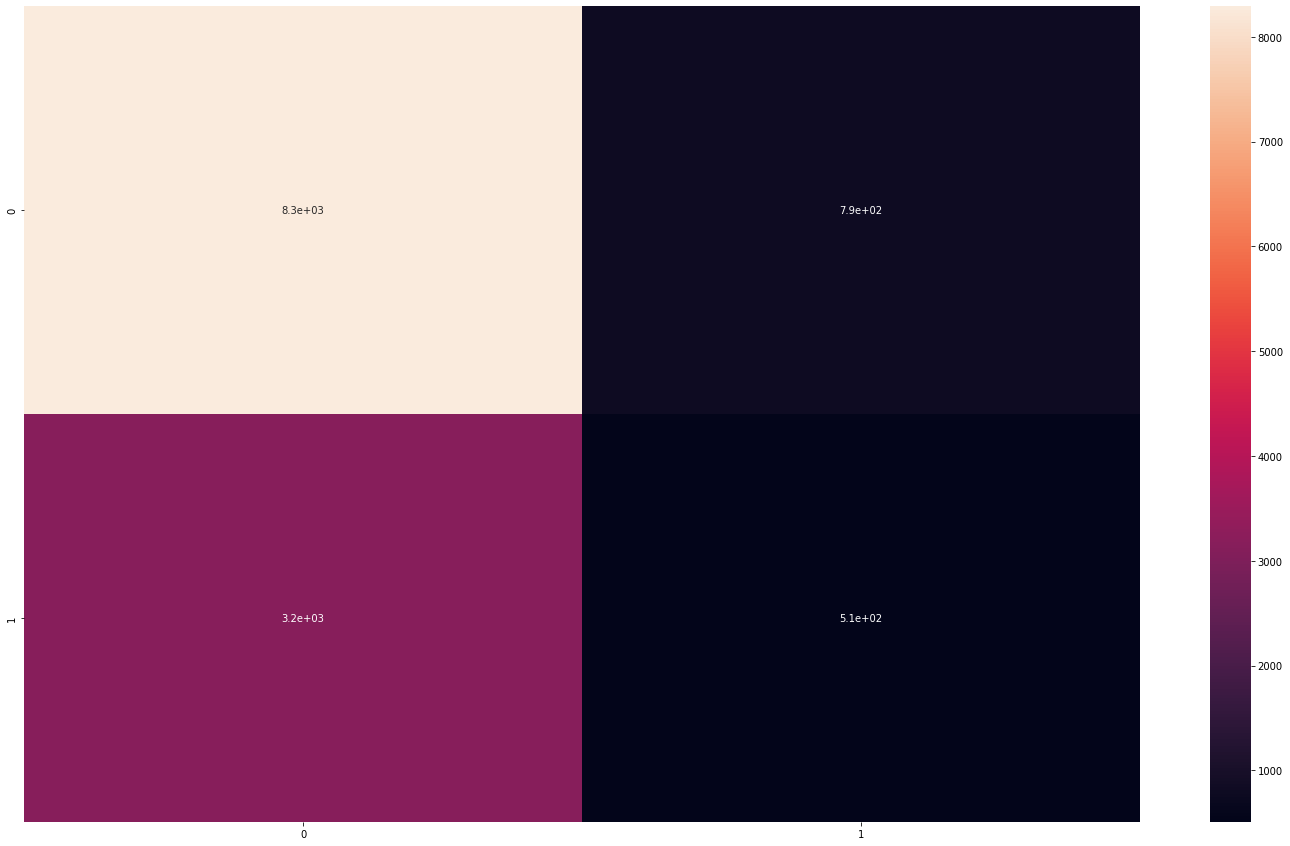

In [ ]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

# **SUPPORT VECTOR MACHINE CLASSIFIER**

In [ ]:
model_svc = LinearSVC(max_iter=100000)
model_svm = CalibratedClassifierCV(model_svc) 
model_svm.fit(X_train_FT, y_train)

CalibratedClassifierCV(base_estimator=LinearSVC(max_iter=100000))

In [ ]:
y_predict = model_svm.predict(X_test_FT)

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.72      0.92      0.81      9084
           1       0.39      0.13      0.19      3678

    accuracy                           0.69     12762
   macro avg       0.55      0.52      0.50     12762
weighted avg       0.63      0.69      0.63     12762



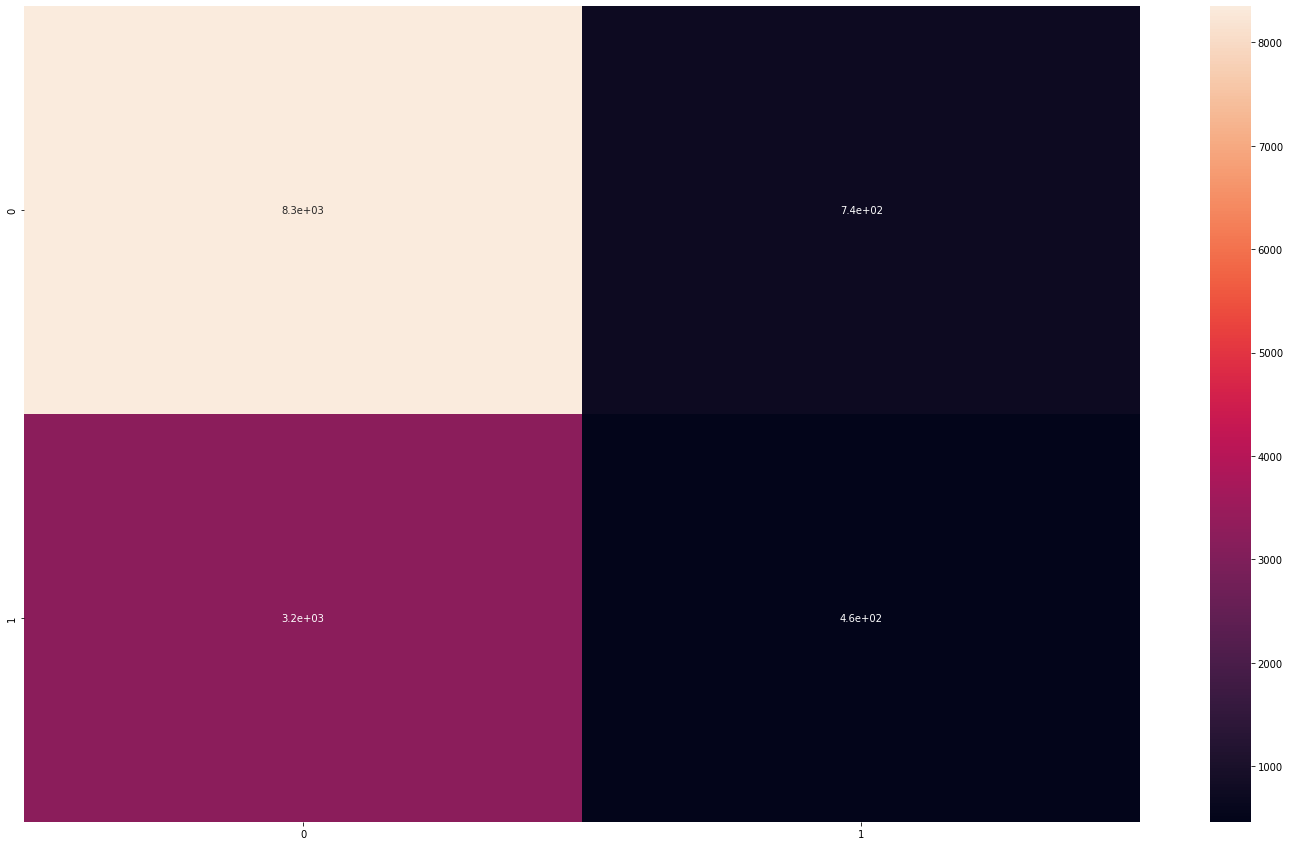

In [ ]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

# **RANDOM FOREST CLASSIFIER**

In [ ]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train_FT, y_train)

RandomForestClassifier()

In [ ]:
y_predict = model_rf.predict(X_test_FT)

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.73      0.93      0.82      9084
           1       0.45      0.15      0.22      3678

    accuracy                           0.70     12762
   macro avg       0.59      0.54      0.52     12762
weighted avg       0.65      0.70      0.64     12762



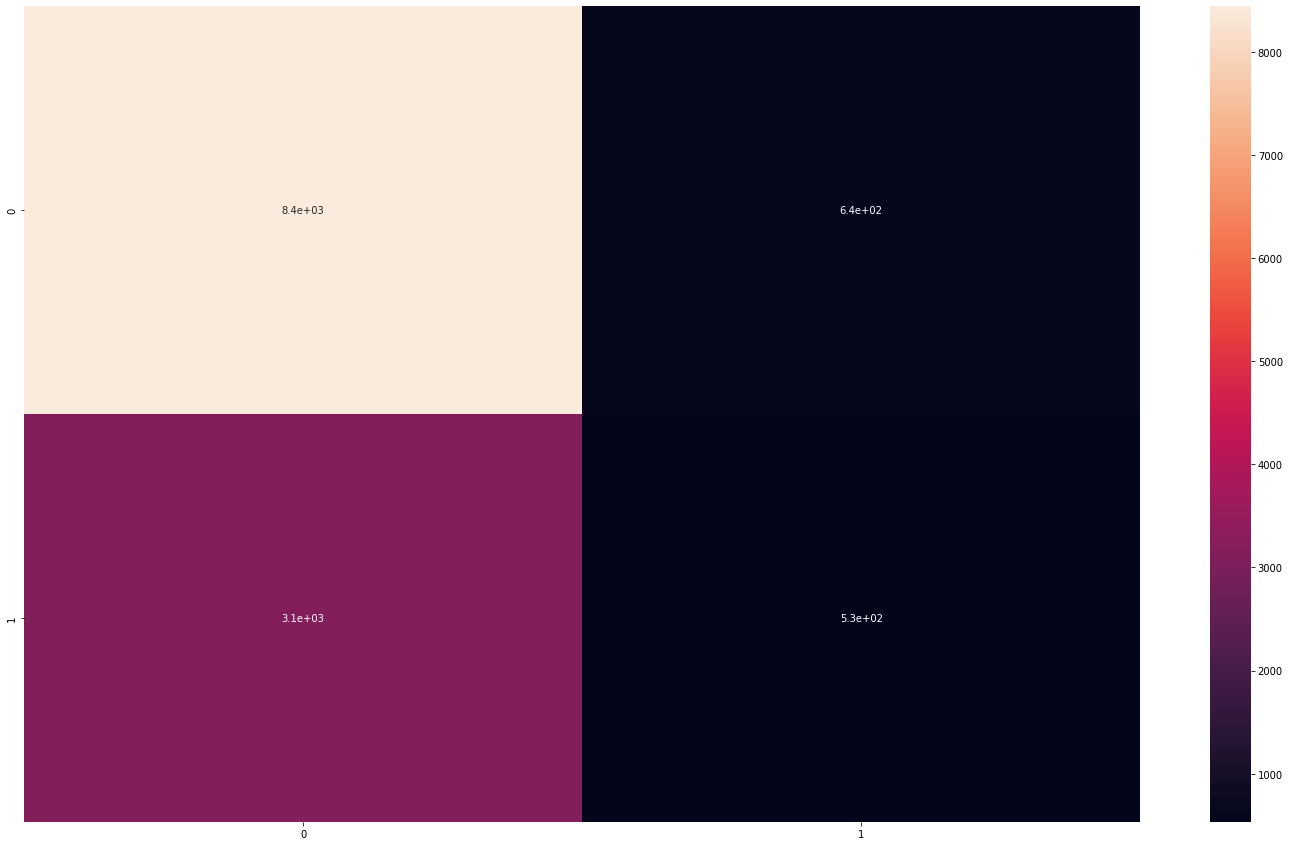

In [ ]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

# **K-NEAREST NEIGHBOUR (KNN)**

In [ ]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_FT, y_train)

KNeighborsClassifier()

In [ ]:
y_predict = model_knn.predict(X_test_FT) 

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.73      0.74      0.74      9084
           1       0.33      0.32      0.32      3678

    accuracy                           0.62     12762
   macro avg       0.53      0.53      0.53     12762
weighted avg       0.61      0.62      0.62     12762



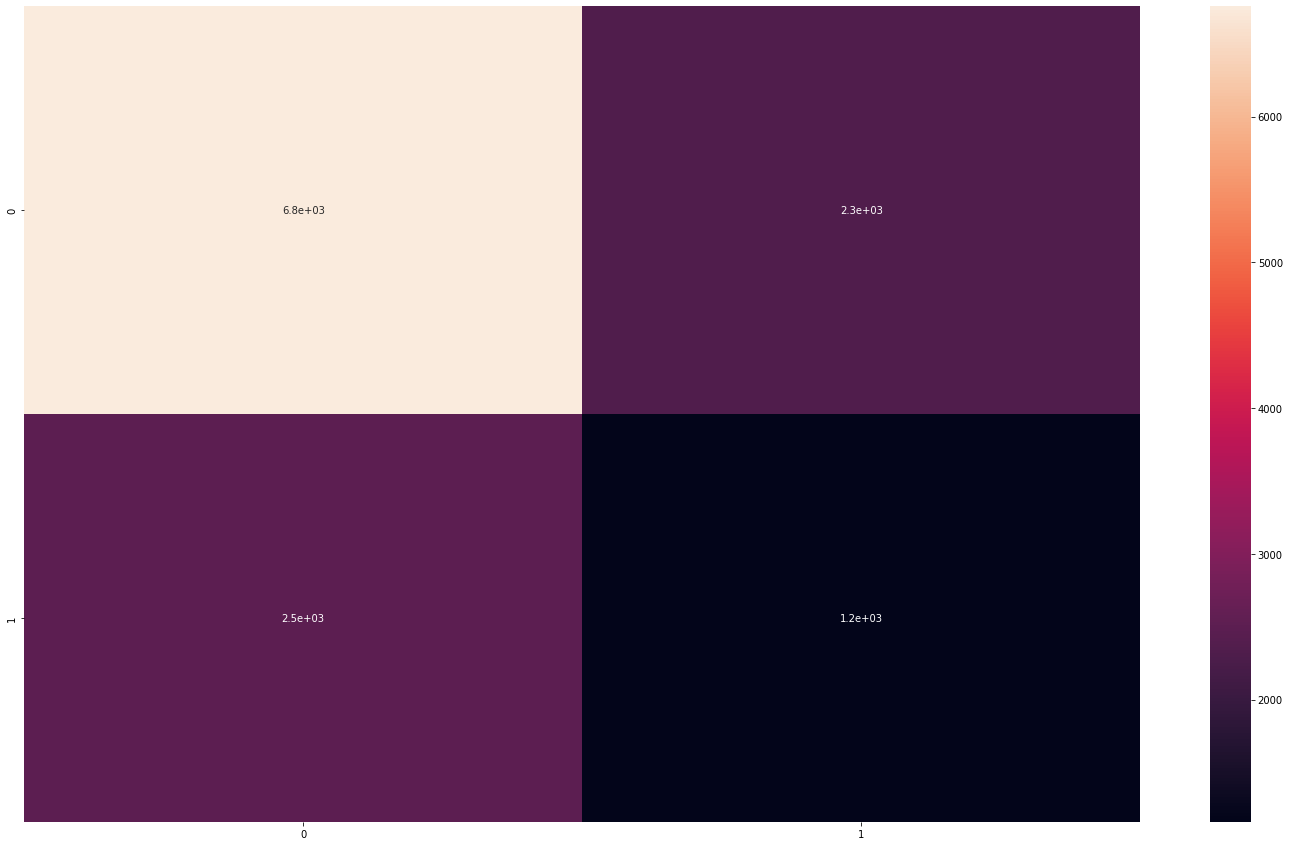

In [ ]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

# **NAIVE BAYES CLASSIFIER**

In [ ]:
model_gnb = GaussianNB()
model_gnb.fit(X_train_FT, y_train)

GaussianNB()

In [ ]:
y_predict = model_gnb.predict(X_test_FT)

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.73      0.39      0.51      9084
           1       0.30      0.65      0.41      3678

    accuracy                           0.46     12762
   macro avg       0.52      0.52      0.46     12762
weighted avg       0.61      0.46      0.48     12762



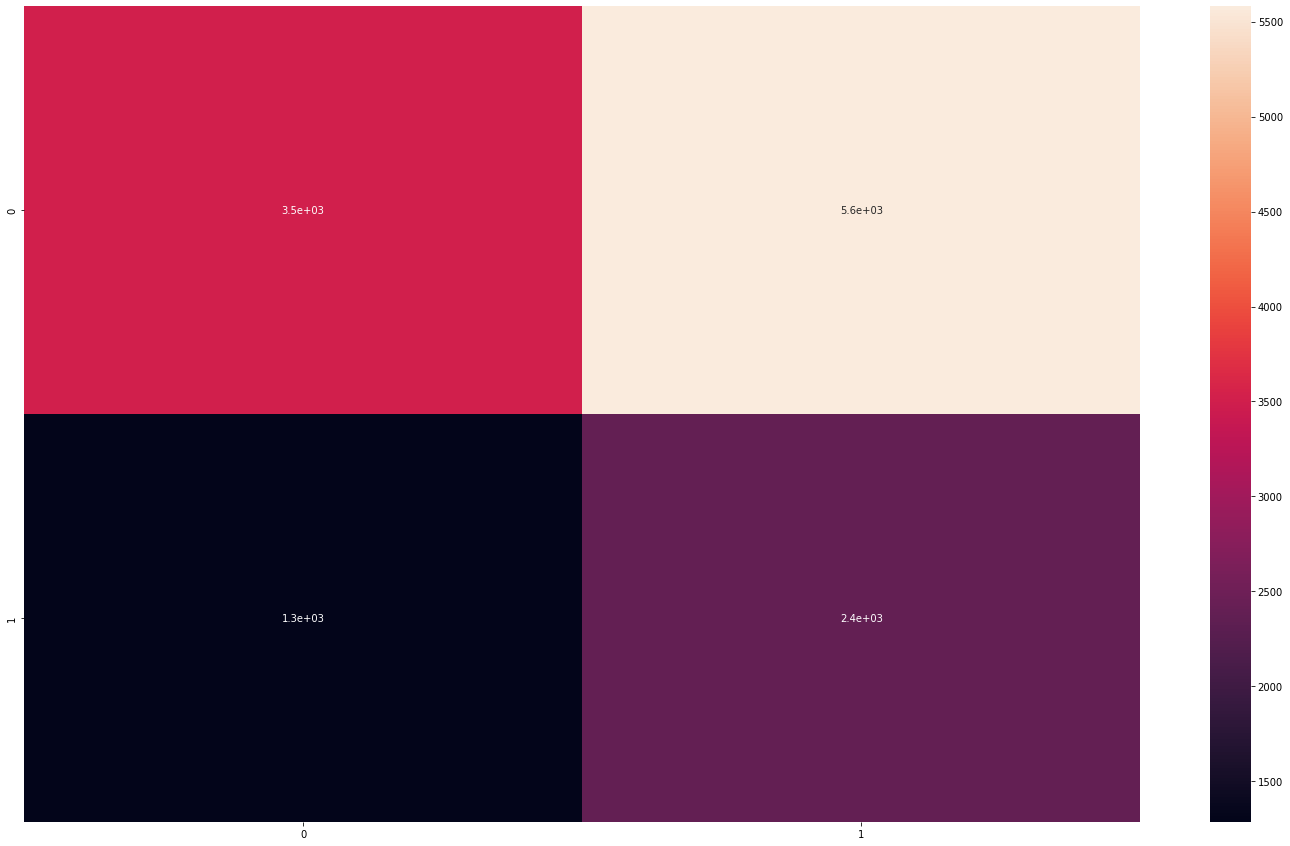

In [ ]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

# **PLOT ROC CURVES FOR THE 5 MODELS AND FIND AUC SCORES**

In [ ]:
model_lr.predict_proba(X_test_FT)

array([[0.67295638, 0.32704362],
       [0.54777436, 0.45222564],
       [0.52798122, 0.47201878],
       ...,
       [0.69503109, 0.30496891],
       [0.80398628, 0.19601372],
       [0.64741271, 0.35258729]])

In [ ]:
model_lr.predict_proba(X_test_FT)[:, 1]

array([0.32704362, 0.45222564, 0.47201878, ..., 0.30496891, 0.19601372,
       0.35258729])

In [ ]:
fpr1, tpr1, thresh1 = roc_curve(y_test, model_lr.predict_proba(X_test_FT)[:, 1], pos_label= 1)

In [ ]:
fpr1

array([0.00000000e+00, 0.00000000e+00, 1.10083664e-04, ...,
       9.99229414e-01, 1.00000000e+00, 1.00000000e+00])

In [ ]:
tpr1

array([0.00000000e+00, 2.71886895e-04, 2.71886895e-04, ...,
       9.99728113e-01, 9.99728113e-01, 1.00000000e+00])

In [ ]:
thresh1

array([1.99956261e+00, 9.99562605e-01, 9.90171140e-01, ...,
       6.80268058e-02, 1.26130503e-03, 6.06362983e-08])

In [ ]:
# ROC curve

fpr1, tpr1, thresh1 = roc_curve(y_test, model_lr.predict_proba(X_test_FT)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_svm.predict_proba(X_test_FT)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_rf.predict_proba(X_test_FT)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_knn.predict_proba(X_test_FT)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, model_gnb.predict_proba(X_test_FT)[:, 1], pos_label = 1)


In [ ]:
# AUC score

from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(y_test, model_lr.predict_proba(X_test_FT)[:, 1])
auc_score2 = roc_auc_score(y_test, model_svm.predict_proba(X_test_FT)[:, 1])
auc_score3 = roc_auc_score(y_test, model_rf.predict_proba(X_test_FT)[:, 1])
auc_score4 = roc_auc_score(y_test, model_knn.predict_proba(X_test_FT)[:, 1])
auc_score5 = roc_auc_score(y_test, model_gnb.predict_proba(X_test_FT)[:, 1])


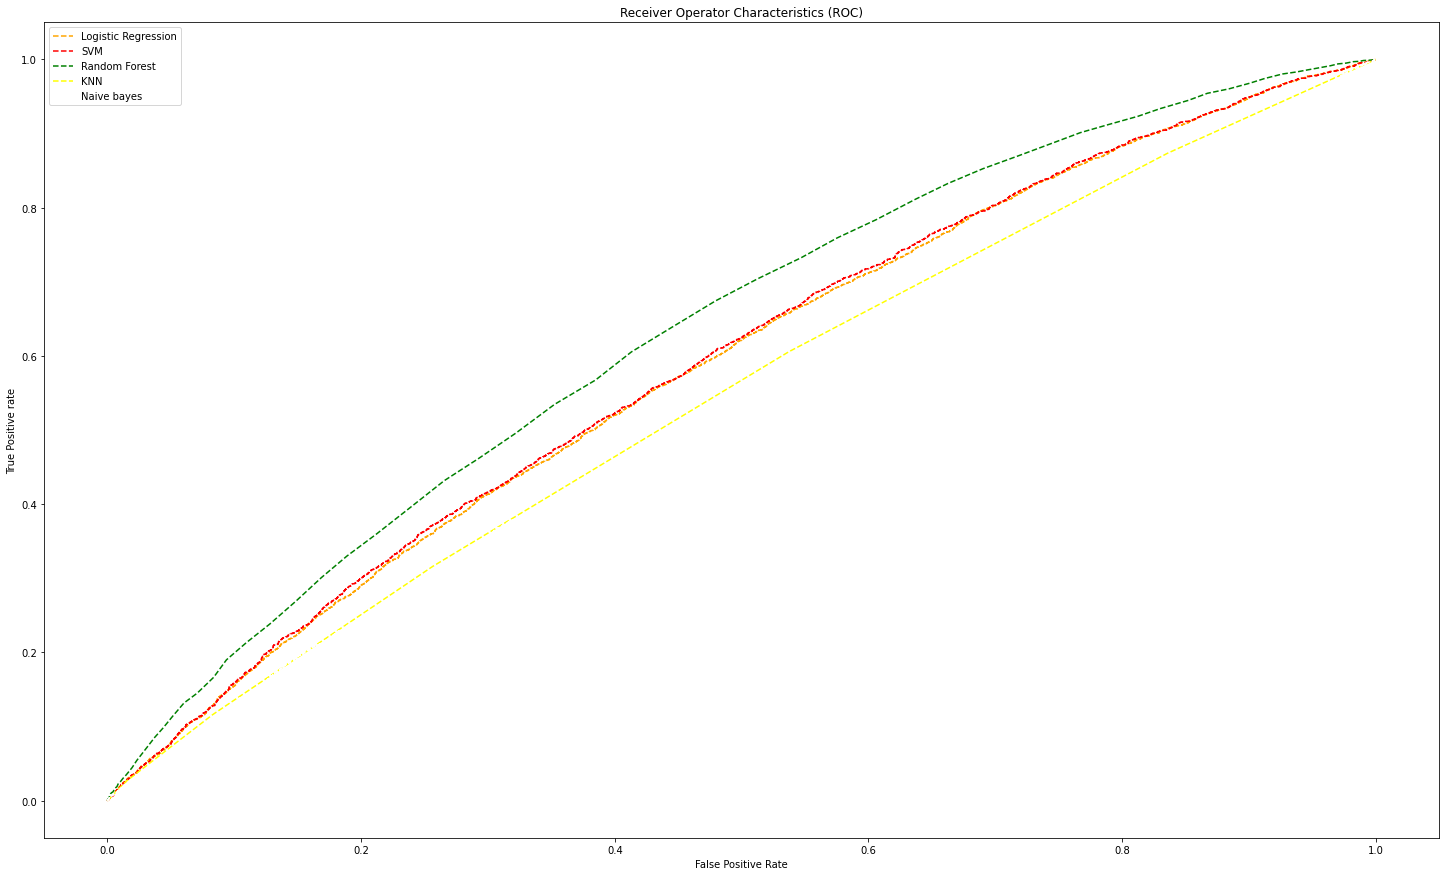

In [ ]:
plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Random Forest")
plt.plot(fpr4, tpr4, linestyle = "--", color = "yellow", label = "KNN")
plt.plot(fpr5, tpr5, linestyle = "--", color = "white", label = "Naive bayes")

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()